In [2]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('./data/dates/2021-02-04.csv')
print("size of data frame: ", df.shape)
df.head()

size of data frame:  (496, 1685)


,Unnamed: 0,ticker,Open,High,Low,Close,Volume,Dividends,CDL2CROWS,CDL3BLACKCROWS,...,DPC-10,Cumulative Return-10,PriceUp-10,PriceDown-10,Close Change-10,Target-10,AD_difference-10,AD_RATIO-10,mcclellanSUM-10,mcclellanOSC-10
0,0,AAPL,134.906651,135.995396,133.214125,135.985504,84183100,0.0,0,0,...,2.353799,0.862868,1,0,0.036658,1,76,1.361905,589.132218,2.452005
1,1,MSFT,239.080790,239.652237,236.824559,238.440369,25296100,0.0,0,0,...,2.310146,-2.014551,1,0,0.002808,0,76,1.361905,589.132218,2.452005
2,2,AMZN,166.500000,167.350006,163.887497,166.550003,73414000,0.0,0,0,...,2.206770,0.447844,1,0,0.013363,0,76,1.361905,589.132218,2.452005
3,3,TSLA,285.000000,285.500000,277.806671,283.329987,47438100,0.0,0,0,...,-0.044349,1.832920,0,1,-0.006420,0,76,1.361905,589.132218,2.452005
4,4,META,267.010010,268.160004,264.000000,266.489990,16060000,0.0,0,0,...,-0.058066,-1.004622,1,0,0.020151,0,76,1.361905,589.132218,2.452005


In [4]:

# path = "c:/users/roeym/desktop/backtrade/dates/*.csv"
# dates =[]
# for fname in glob.glob(path):
#     dates.append(fname.split('/')[5].split(".")[0][6:])
# for date in dates:
#     df = pd.read_csv(f"{date}.csv")
#     df.drop(df.columns[[1,2,3,4]], axis=1)
#     print(df)
#     exit()

In [5]:
### prints all hists of columns
# cols = df.columns
# for col in cols:
#     if "CDL" not in col and "Date" not in col and "ticker" not in col:
#         print(col)
#         plt.hist(df[col], bins = 30)
#         plt.show()

In [6]:
### prints boxplot of all columns
# for col in cols:
#     if "CDL" not in col and "Date" not in col and "ticker" not in col:
#         print(col)
#         plt.boxplot(df[col])
#         plt.show()

### takes specificly needed columns

In [7]:
df = df.loc[:, 'ma50':'pvt']
df.head()

,ma50,ma200,ADX,ADXR,AROONOSC,DX,PPO,stochK,stochD,TRIX,...,rvi,ui,ad,adosc,cmf,efi,mfi,obv,pvr,pvt
0,-0.017226,-2.105675,15.534968,15.045378,28.571429,2.880994,2.769038,0.052881,-0.698962,1.428394,...,0.724167,0.177757,1.184987,-0.496641,0.597130,0.107696,54.036079,2.490441,2.0,2.238684
1,-1.962386,-1.877456,28.127839,20.890174,85.714286,46.067804,3.892739,0.835877,0.676294,1.022962,...,0.350080,-0.301036,-0.799169,-0.912449,-0.153080,1.571409,80.884312,1.075091,4.0,-0.068375
2,-0.421683,-2.316798,17.472478,15.735658,85.714286,13.980963,1.911841,0.492883,0.675667,0.531268,...,0.880481,-0.251687,0.652402,-1.414336,-0.992597,0.422515,51.532771,-0.548459,2.0,0.875792
3,0.071948,-2.008218,31.598334,36.791861,-28.571429,8.659778,4.262684,1.157536,0.750973,2.649661,...,0.615476,-1.050098,-0.264929,0.475185,1.586983,0.539030,45.486494,1.971794,4.0,1.532916
4,-0.782851,-1.677484,15.257111,18.727441,64.285714,9.268098,1.336421,-0.274049,-1.070485,-1.419734,...,-0.116001,1.421752,0.015068,-1.050551,-1.203251,-1.278296,63.948152,-1.508444,3.0,-1.354832


## prints the mean, min , max and std of data as bar graph

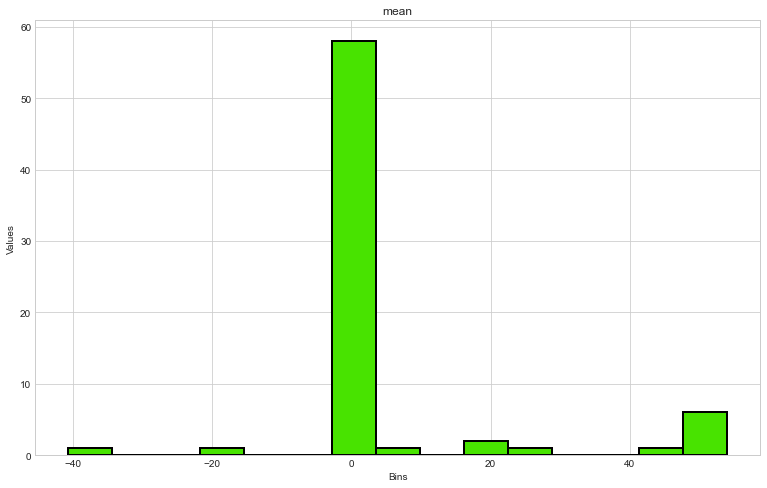

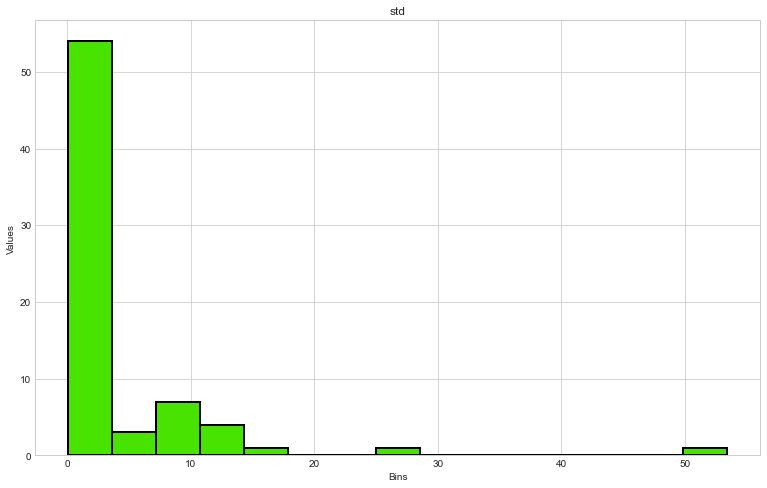

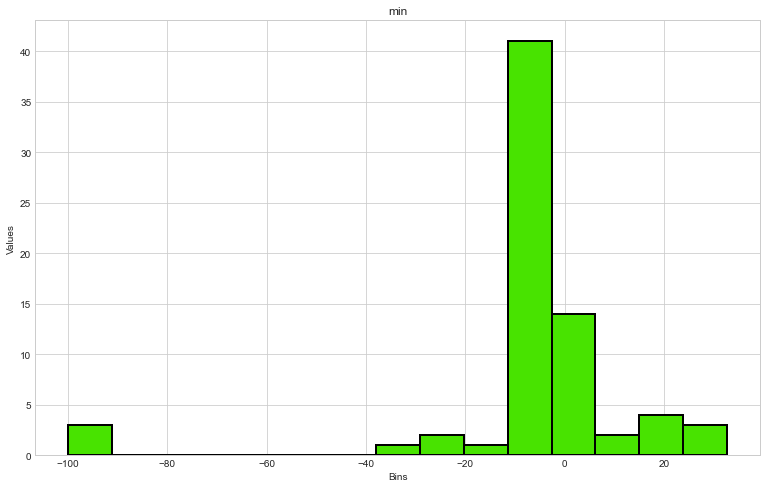

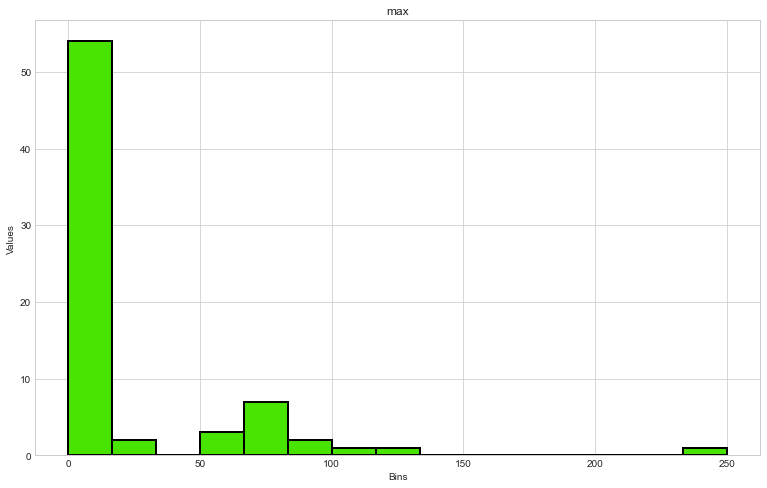

In [8]:
descdf = df.describe().T
descol = ['mean','std','min','max']
for col in descol:
    plt.figure(figsize=(13,8)) # Make it 14x7 inch
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    plt.hist(descdf[col], bins=15, facecolor = '#48e300', edgecolor='#000000', linewidth=2)
    plt.title(col) 
    plt.xlabel('Bins') 
    plt.ylabel('Values') 
    plt.show()


## creates bar graphs for each used index to show variance in the data

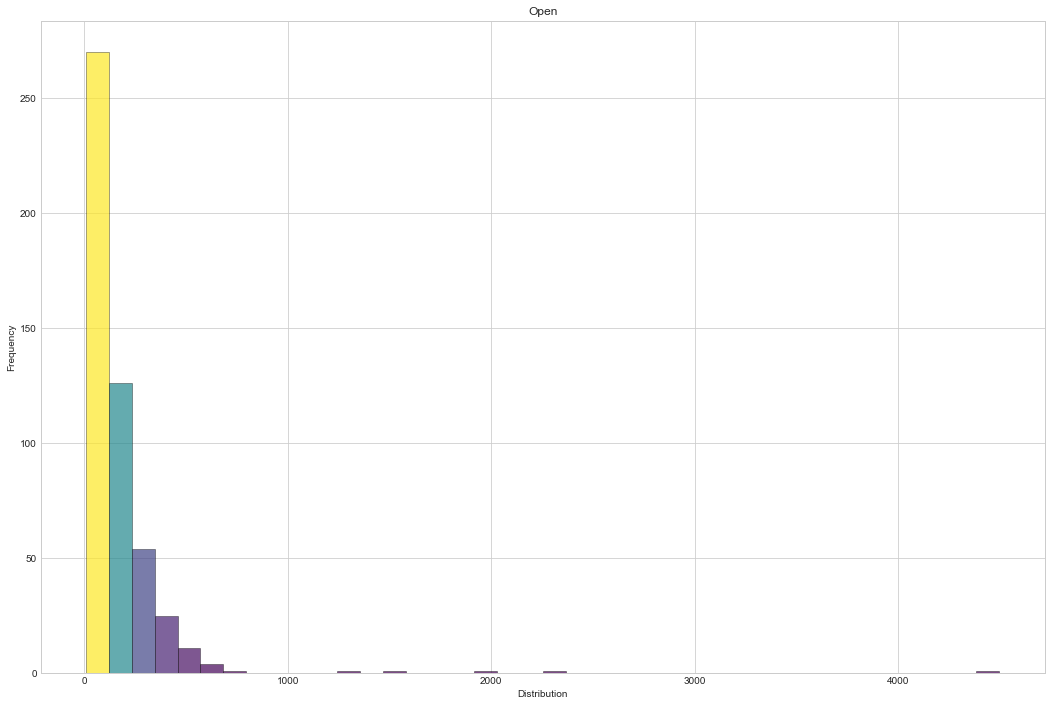

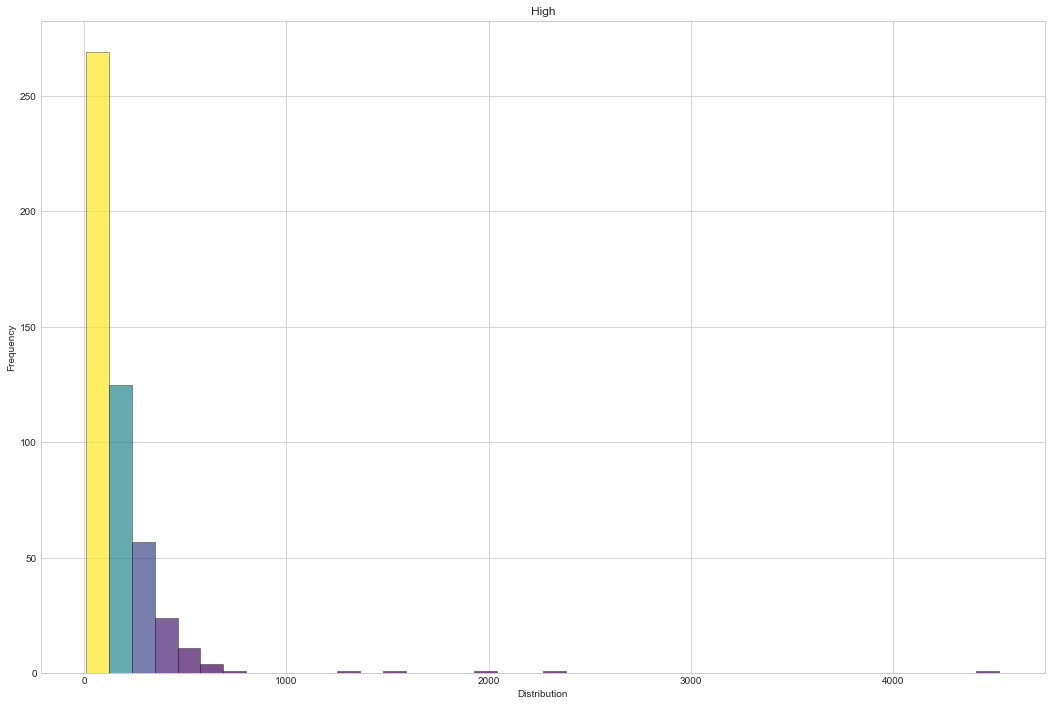

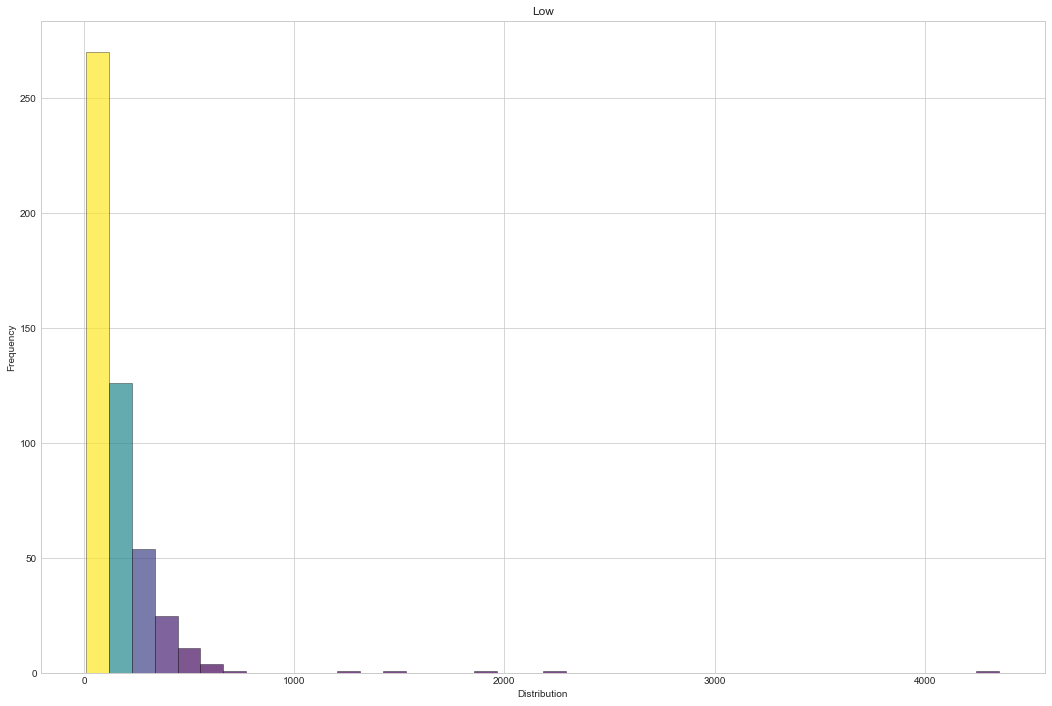

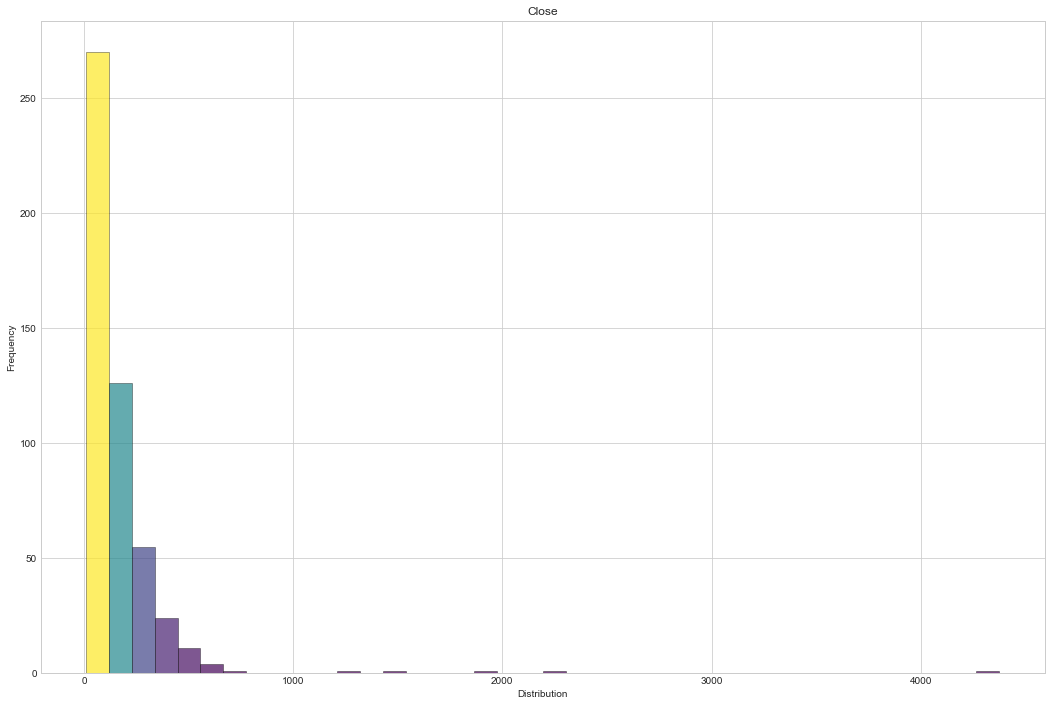

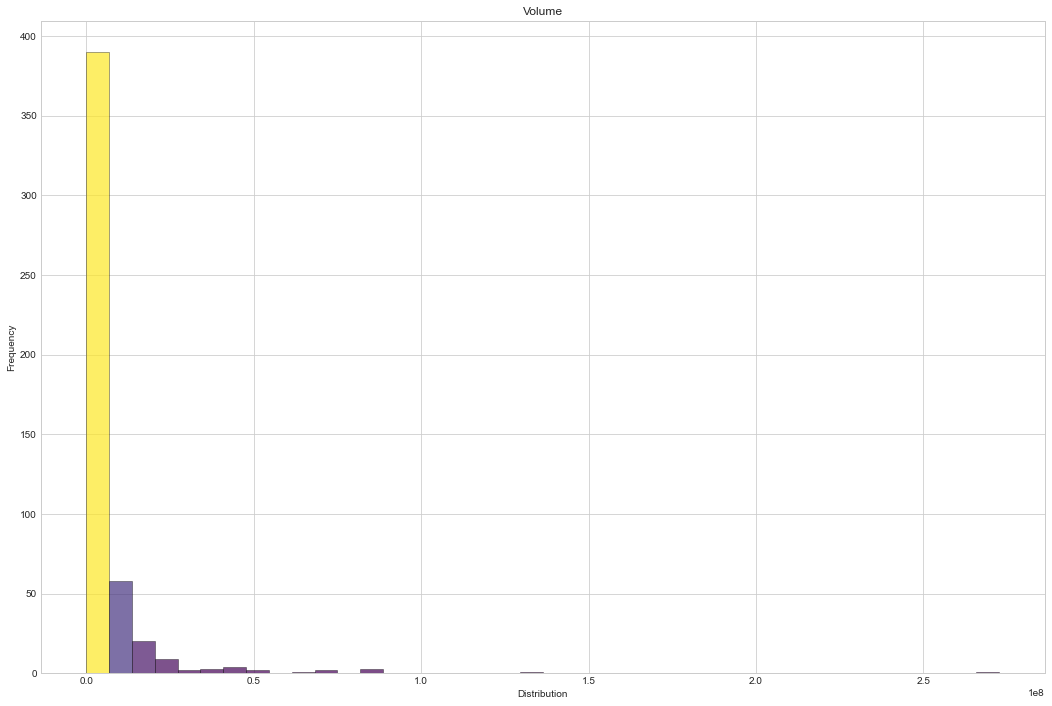

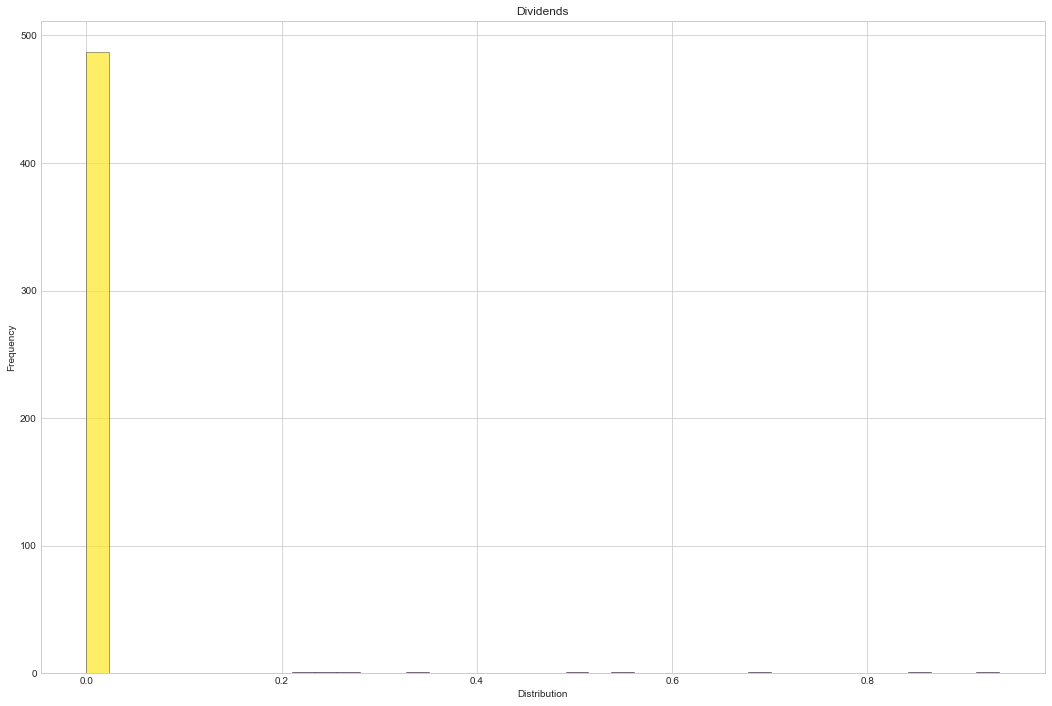

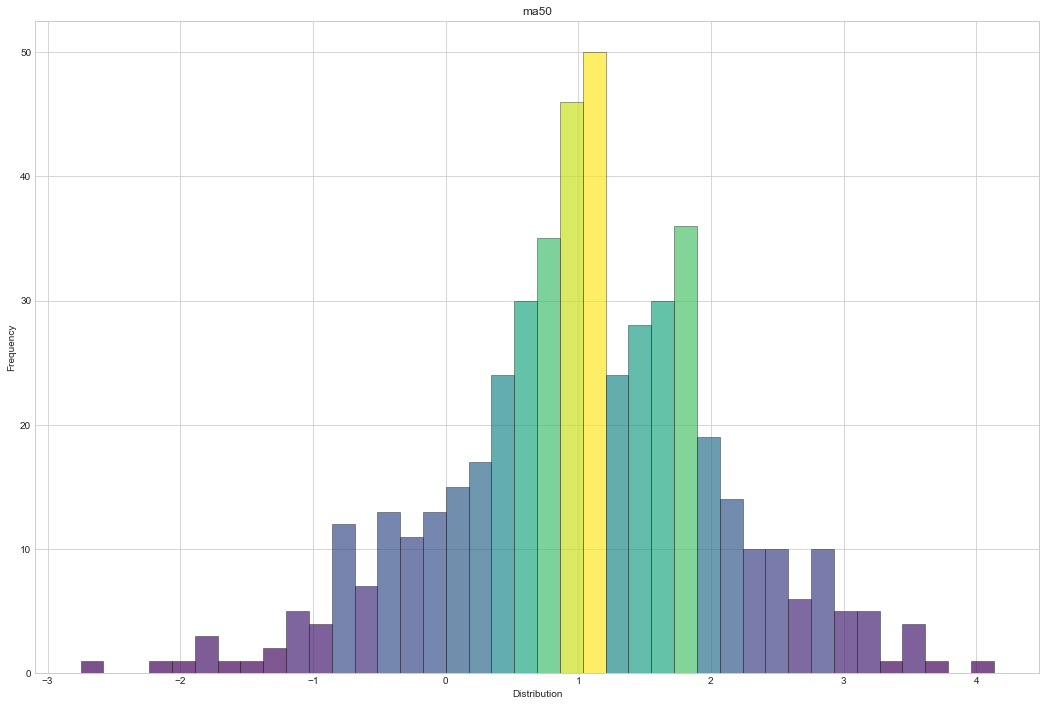

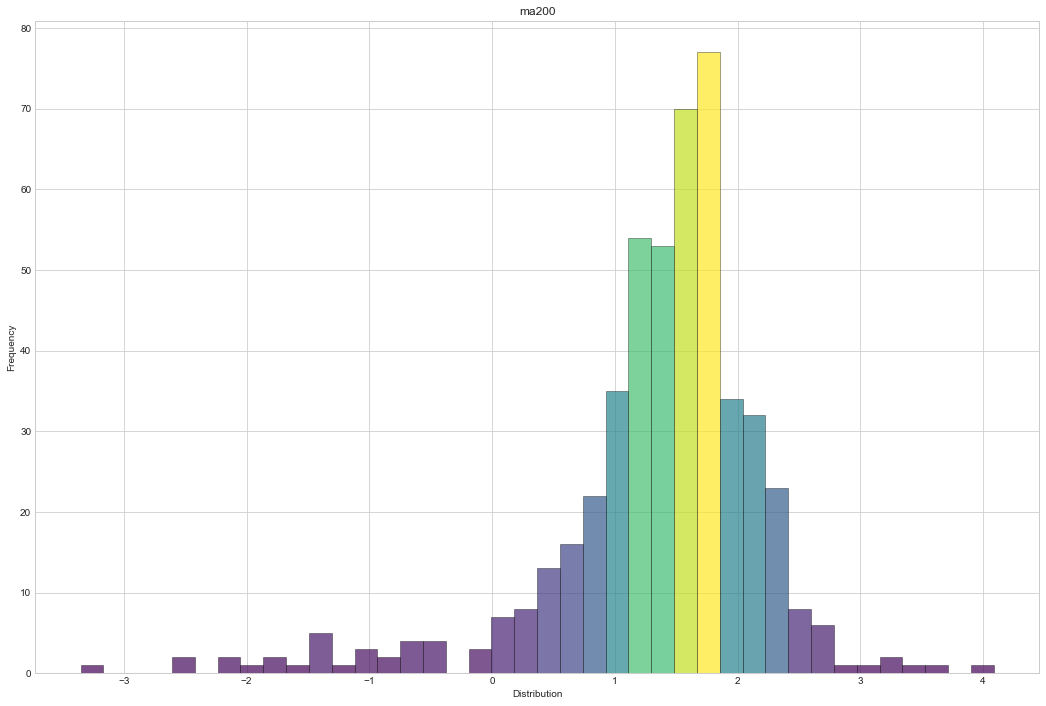

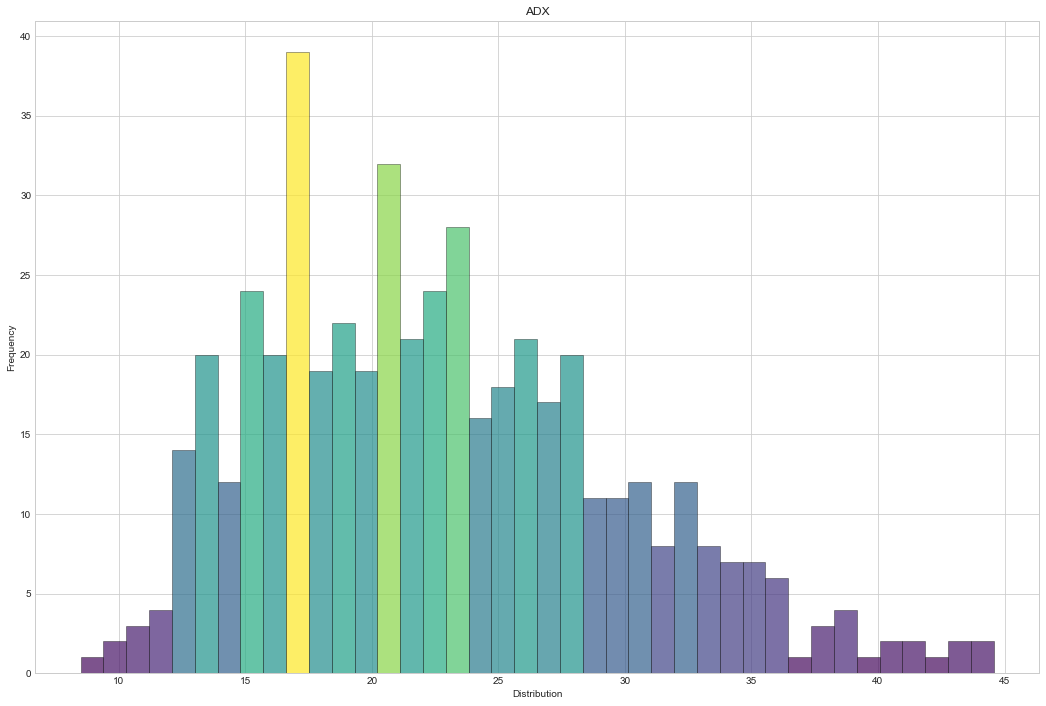

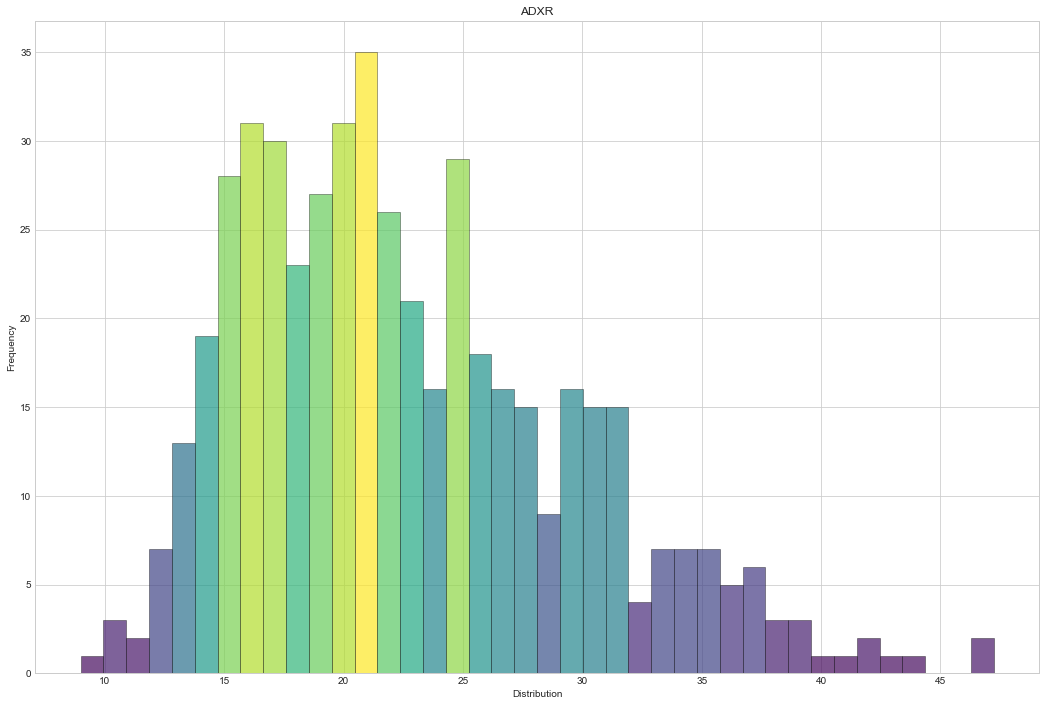

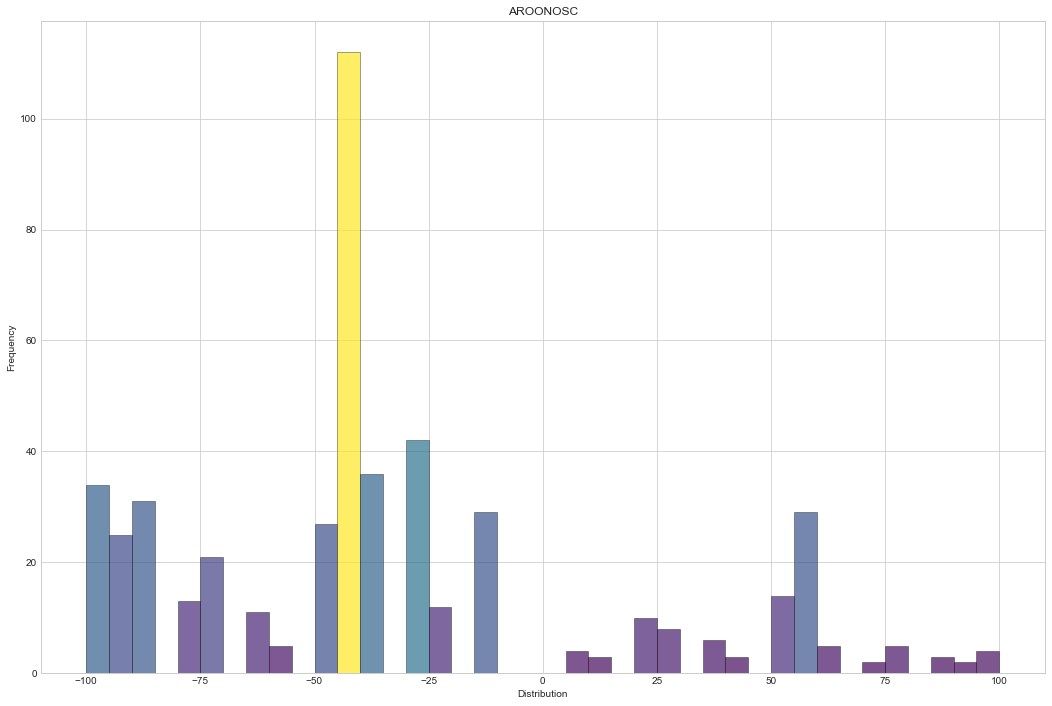

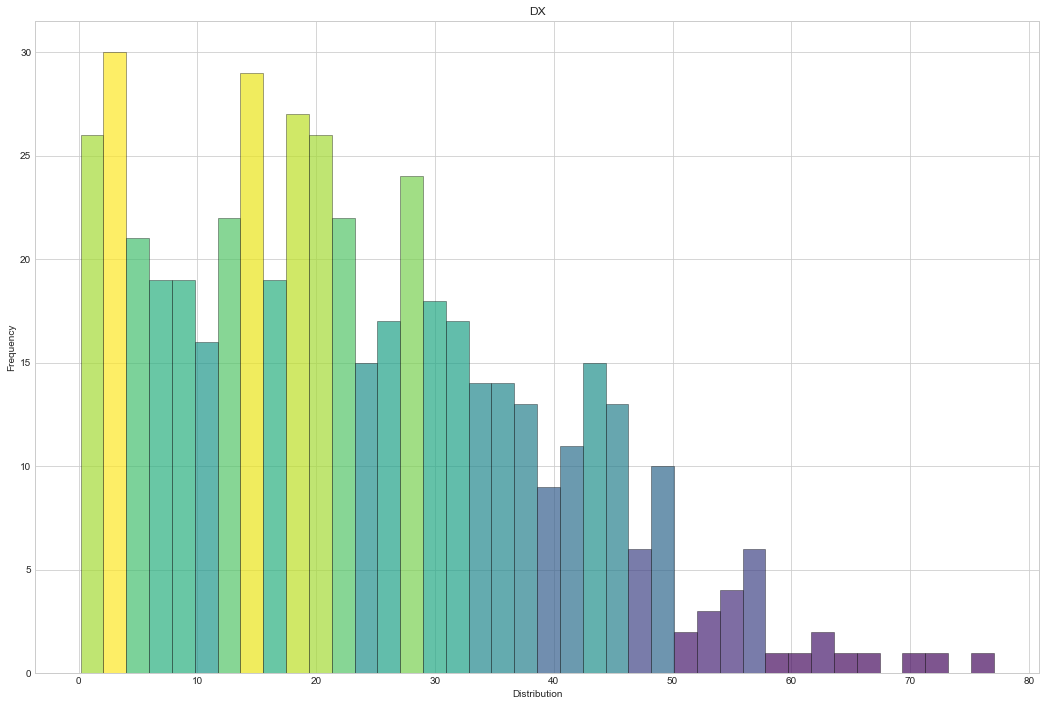

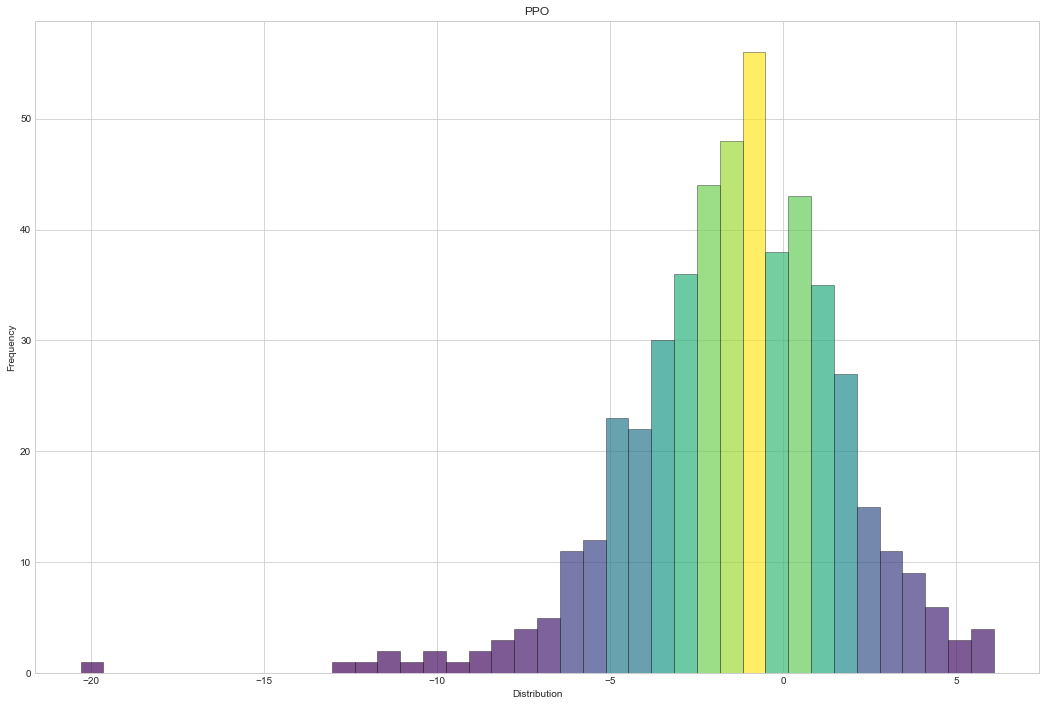

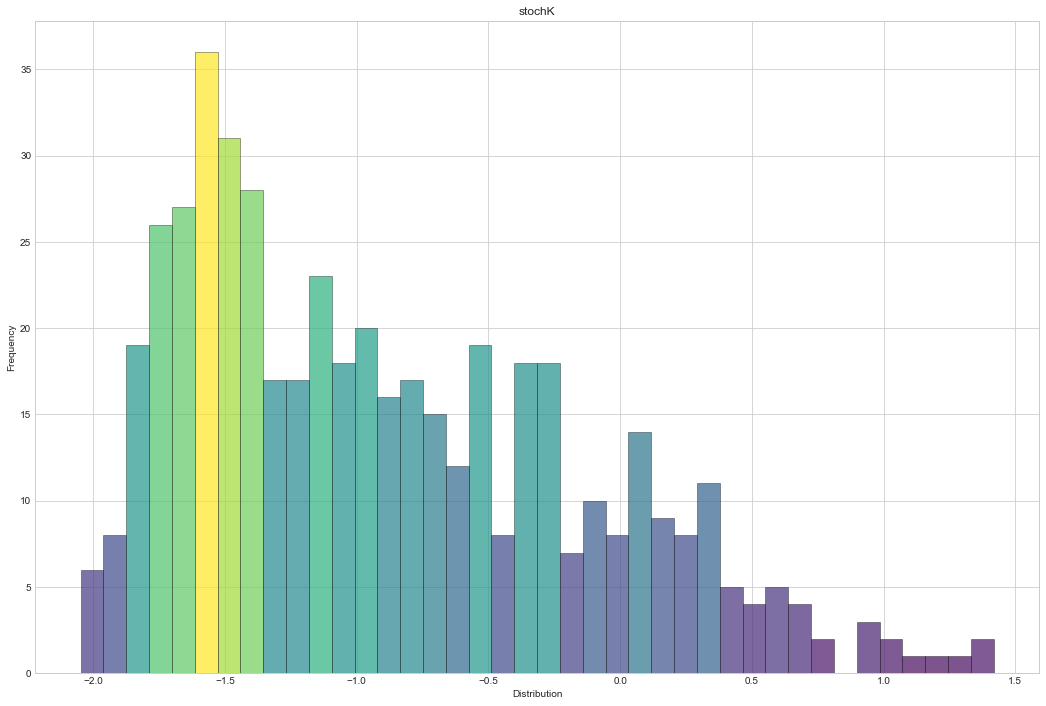

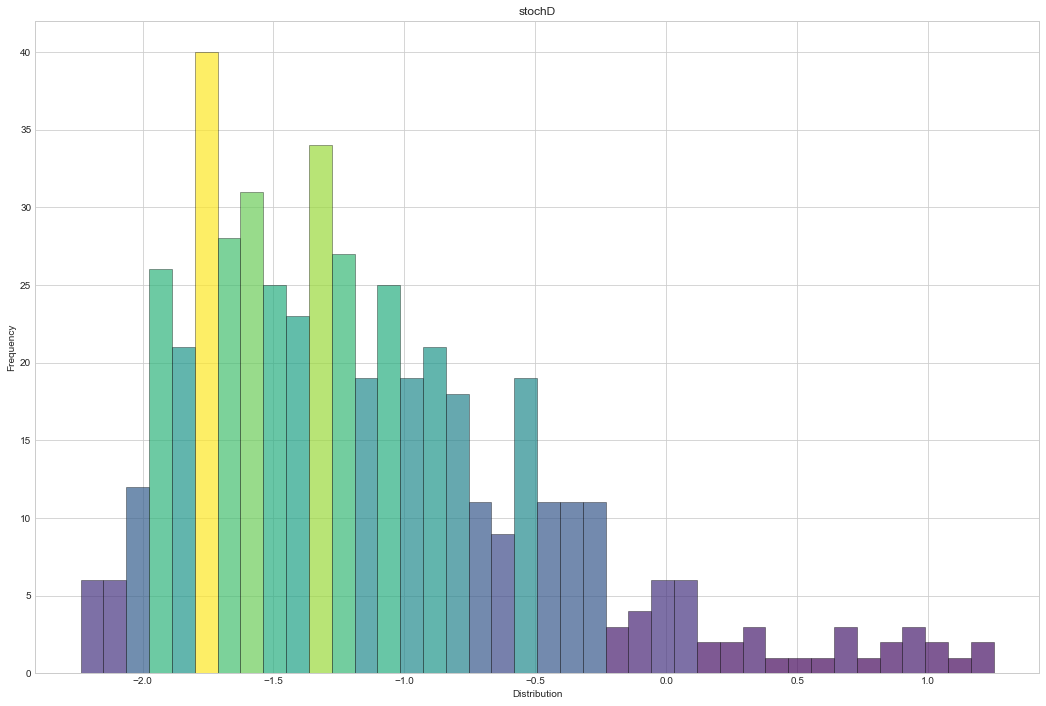

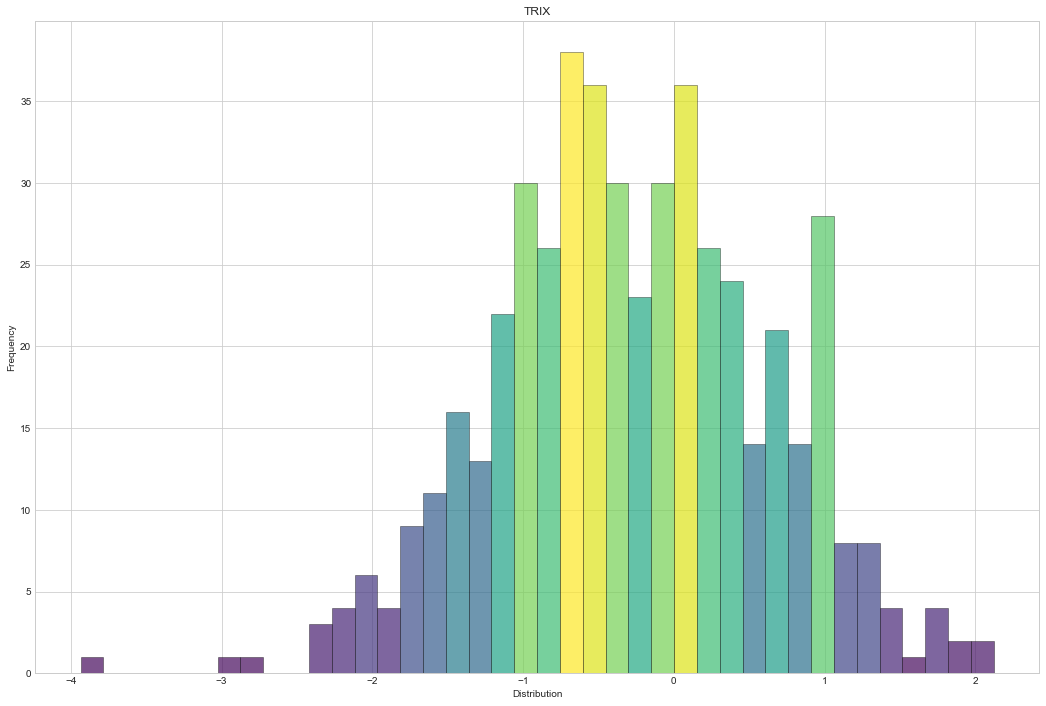

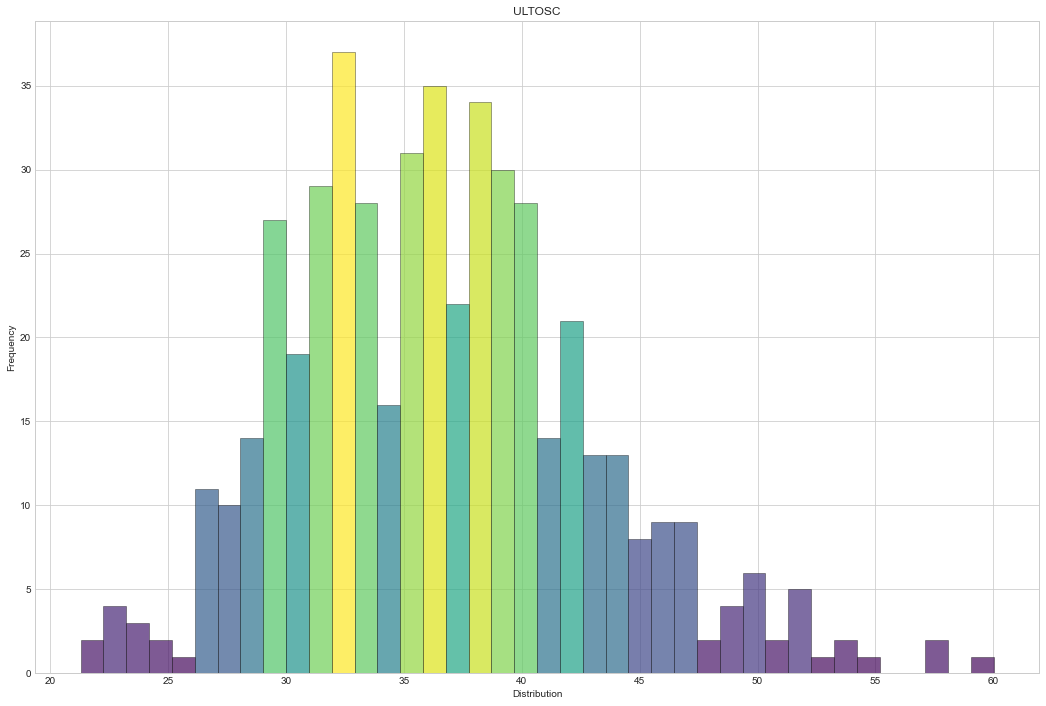

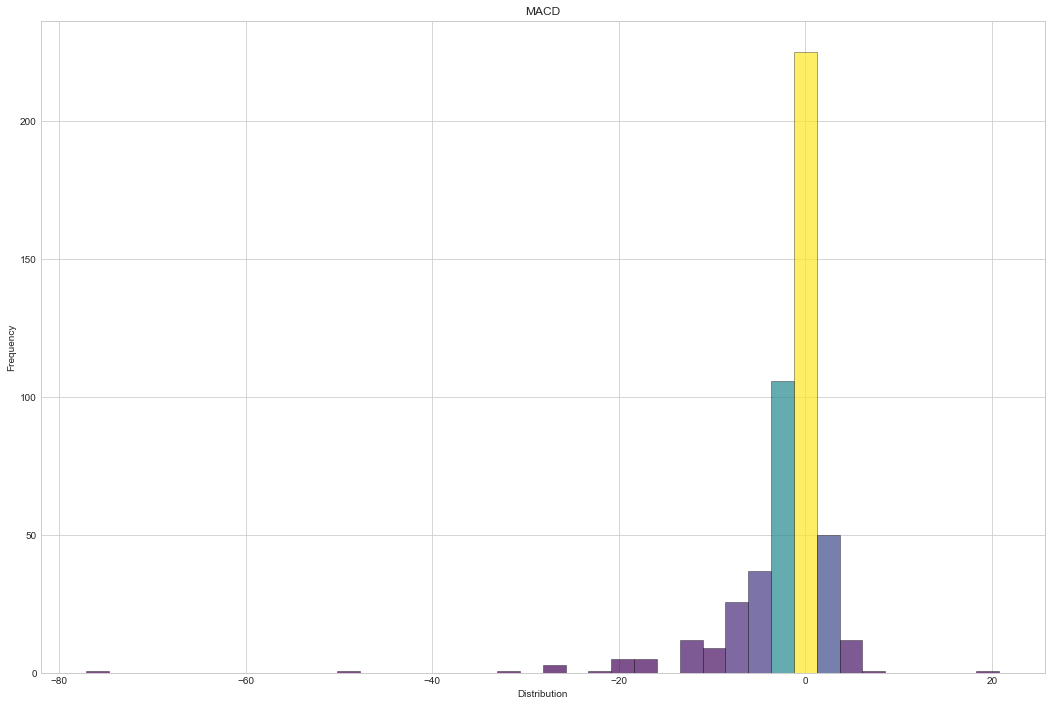

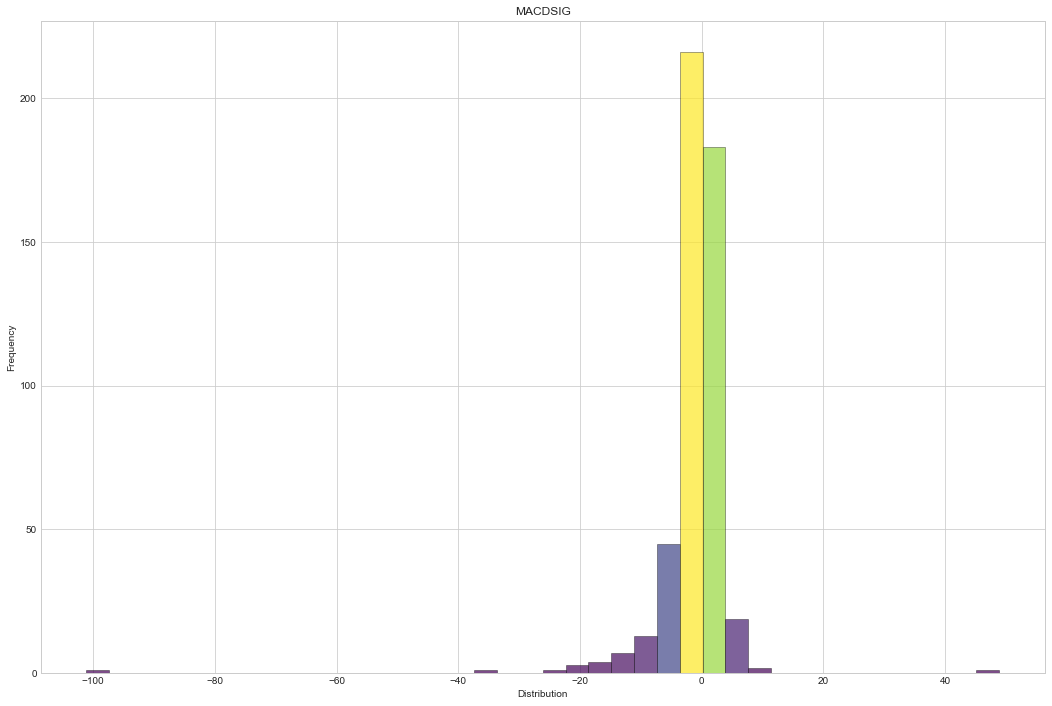

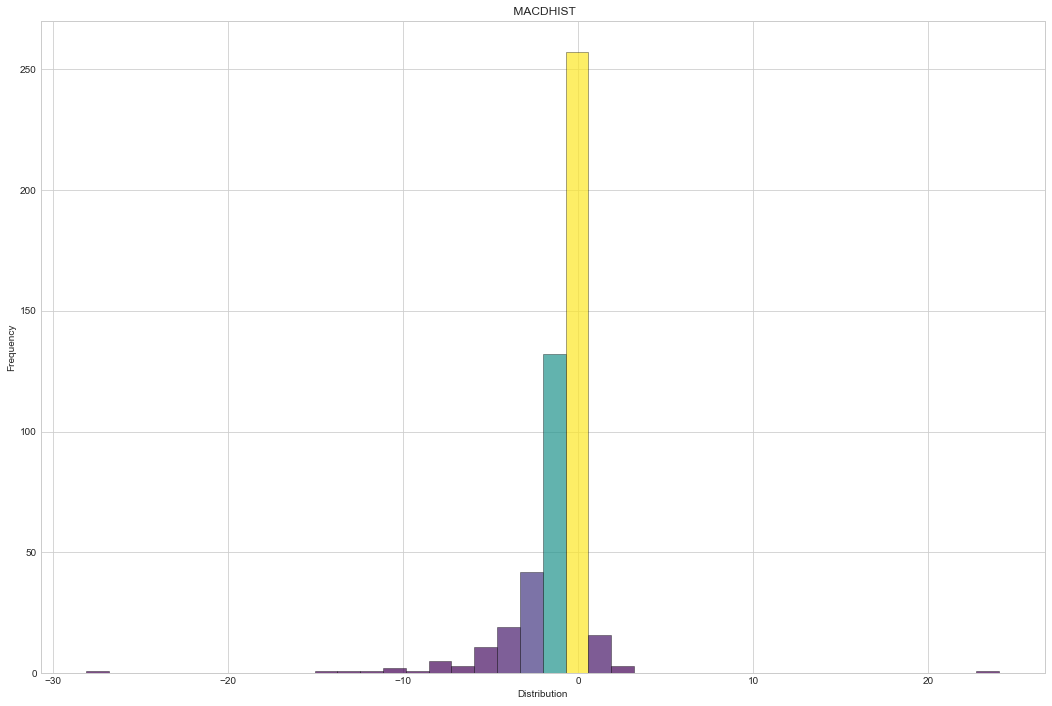

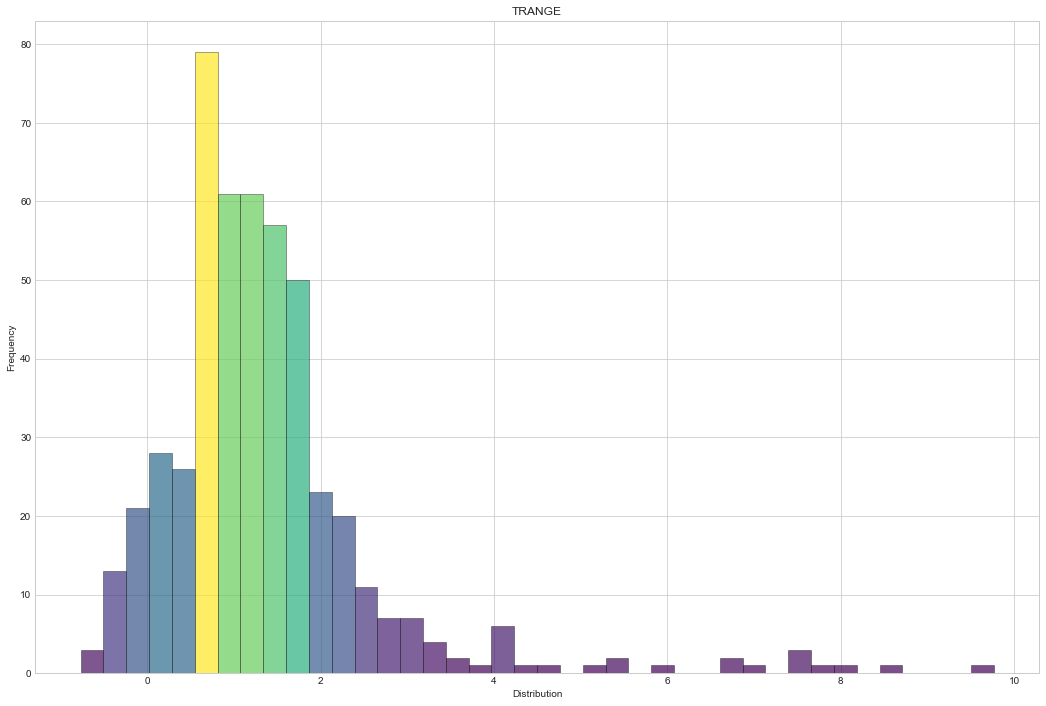

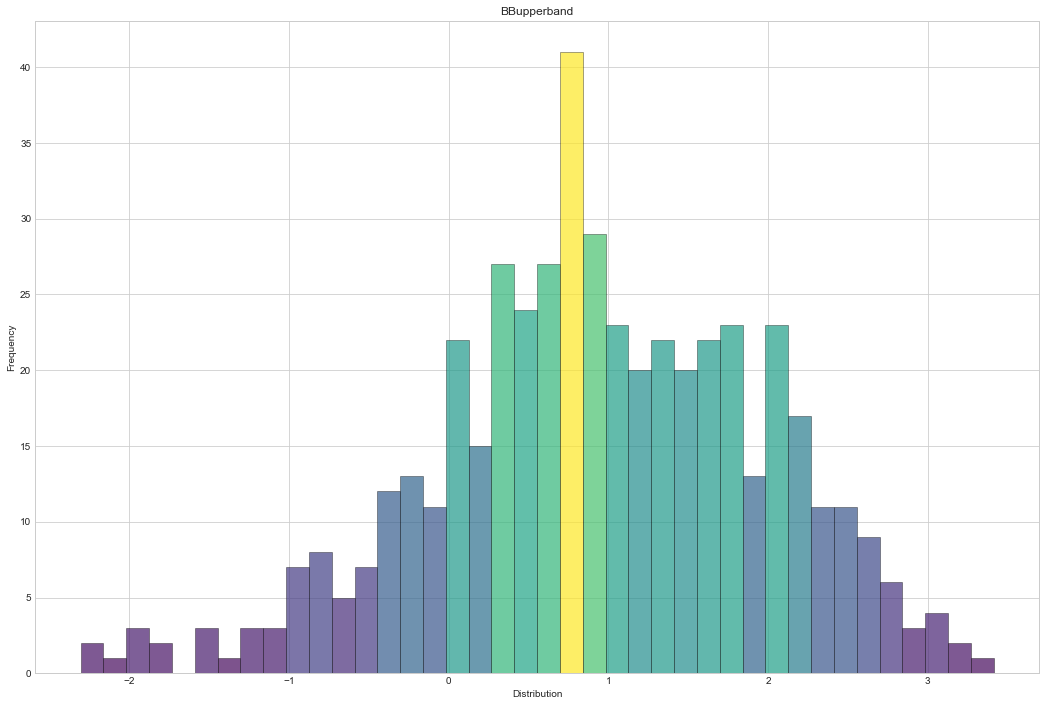

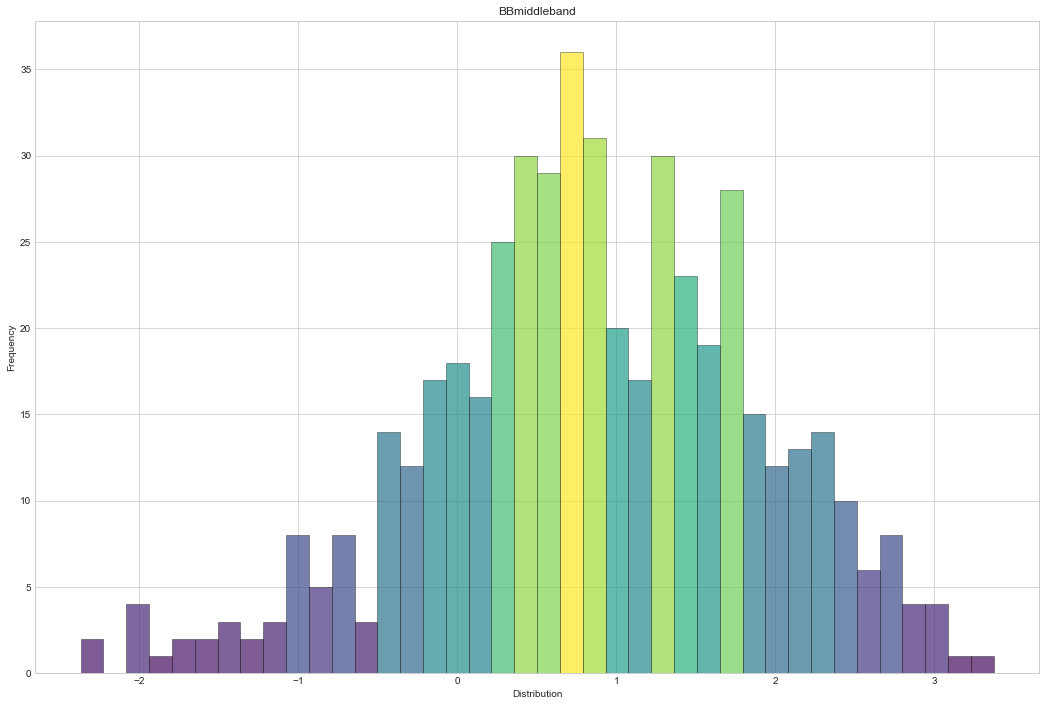

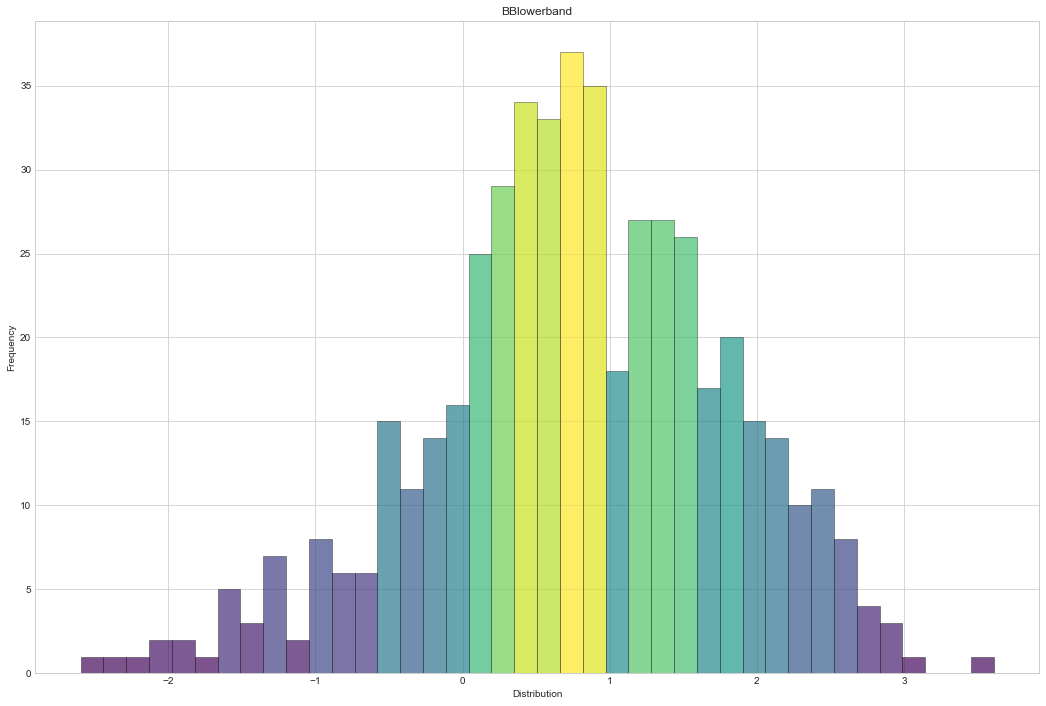

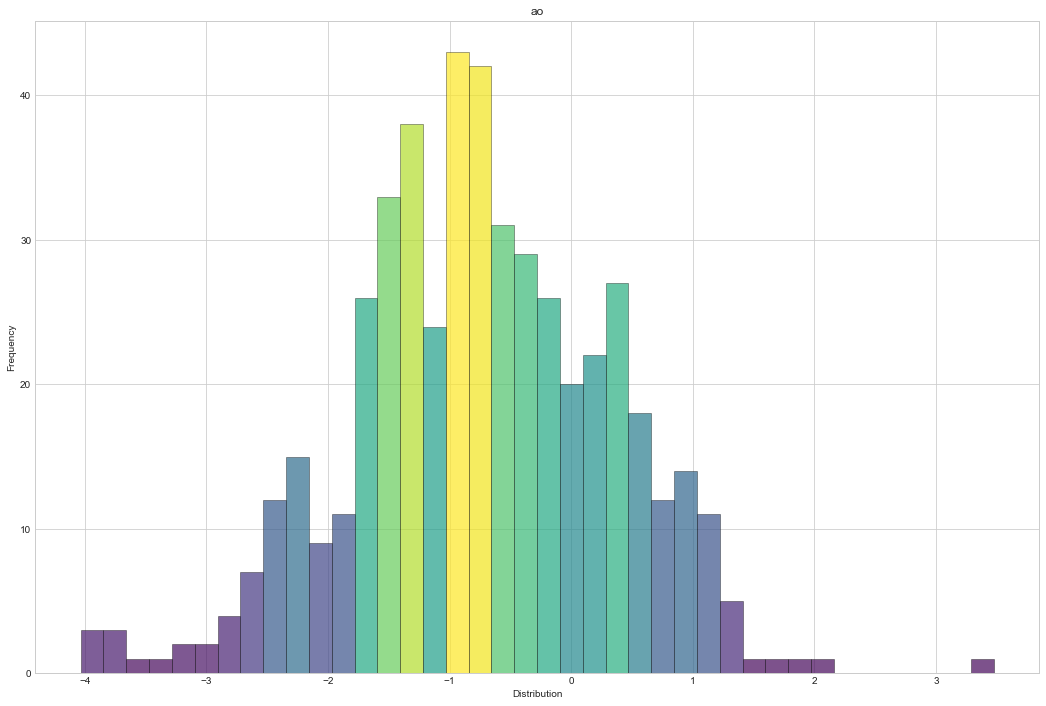

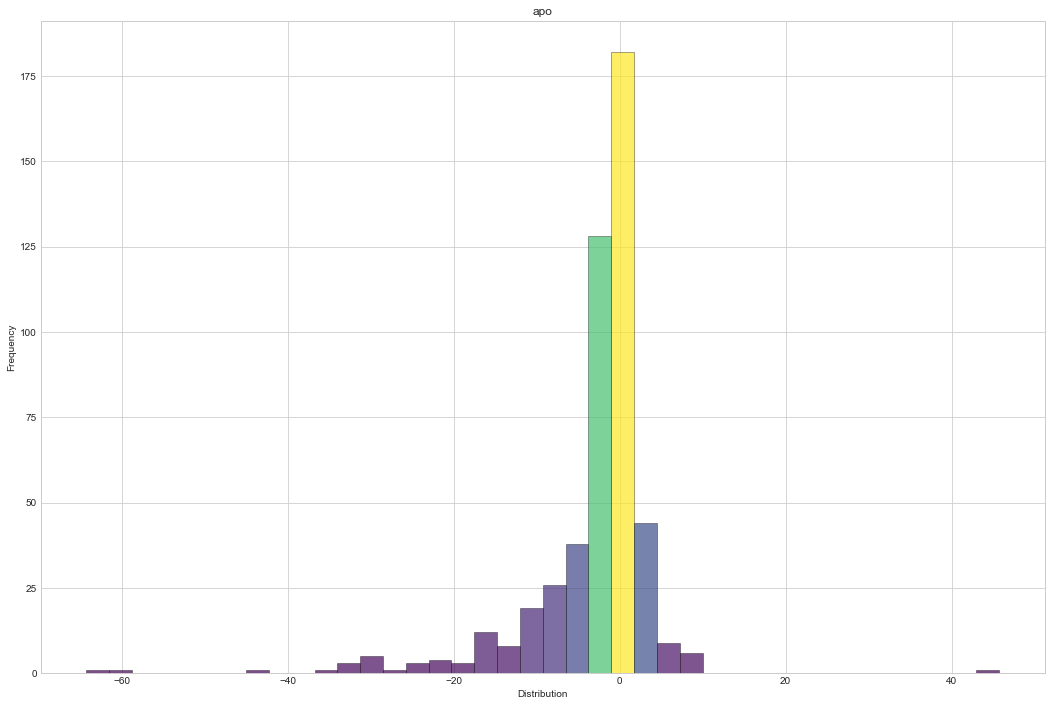

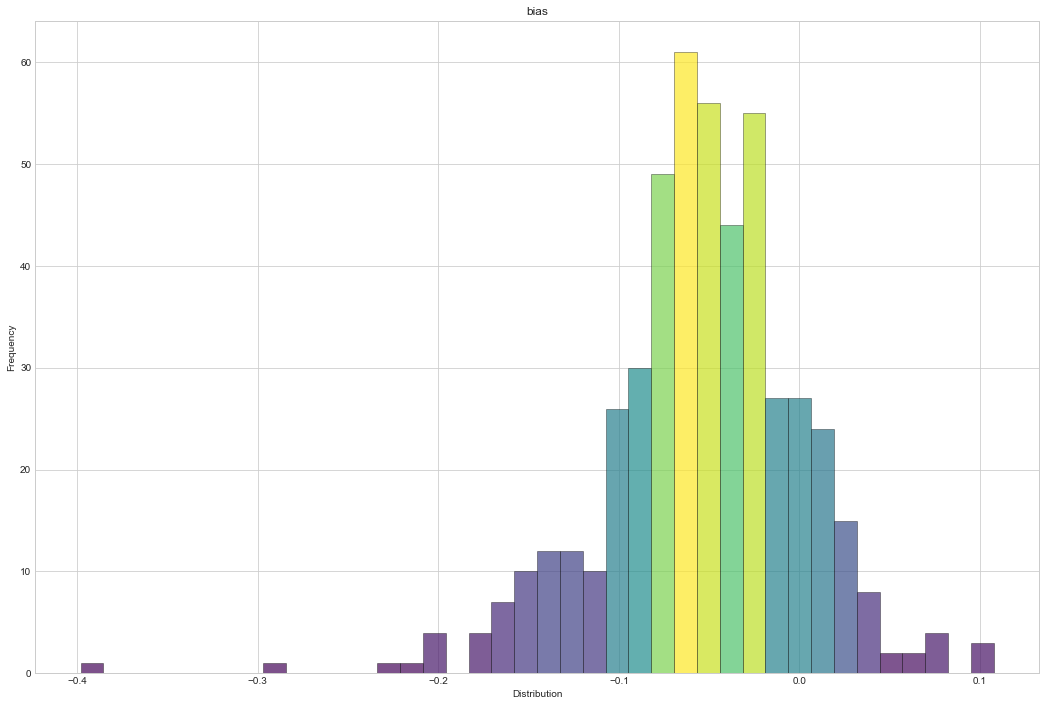

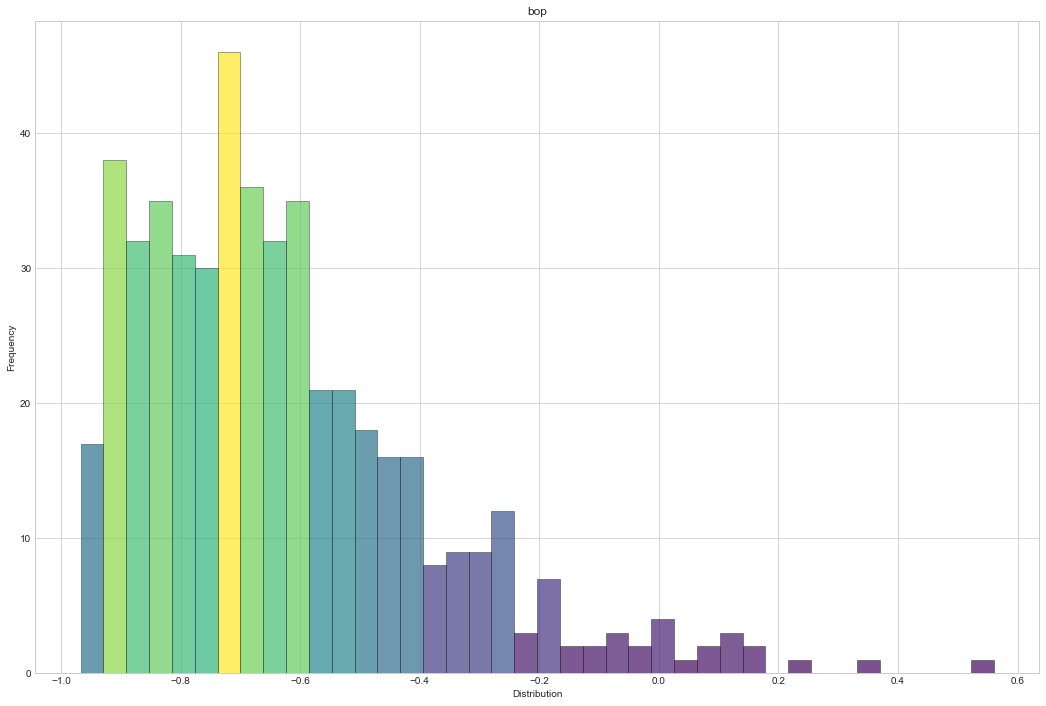

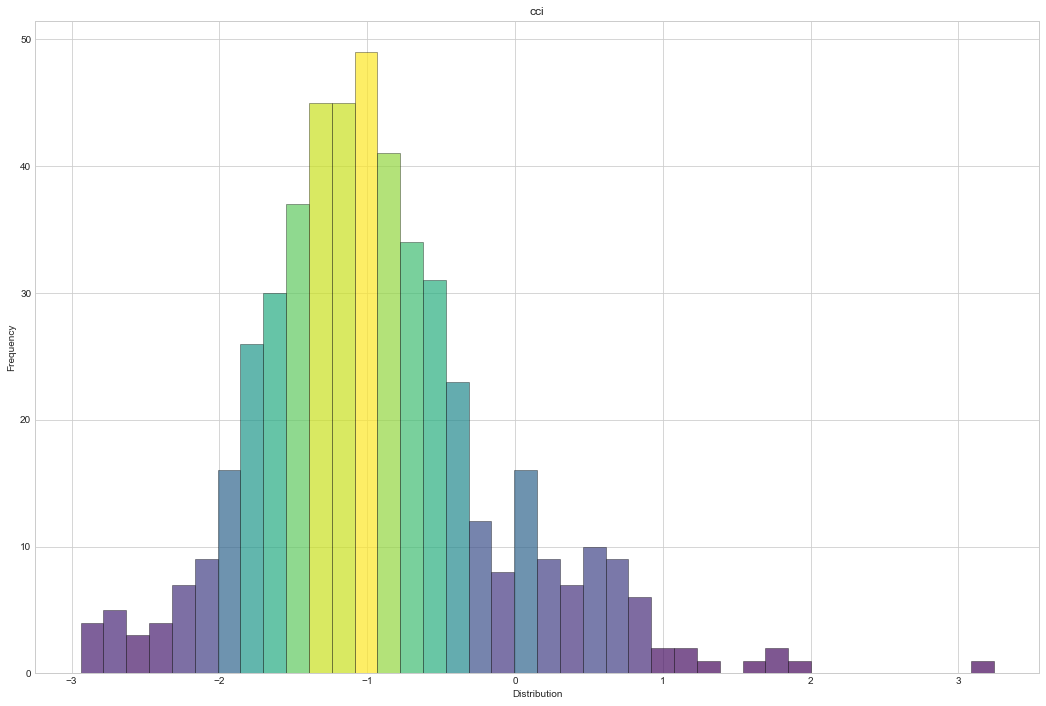

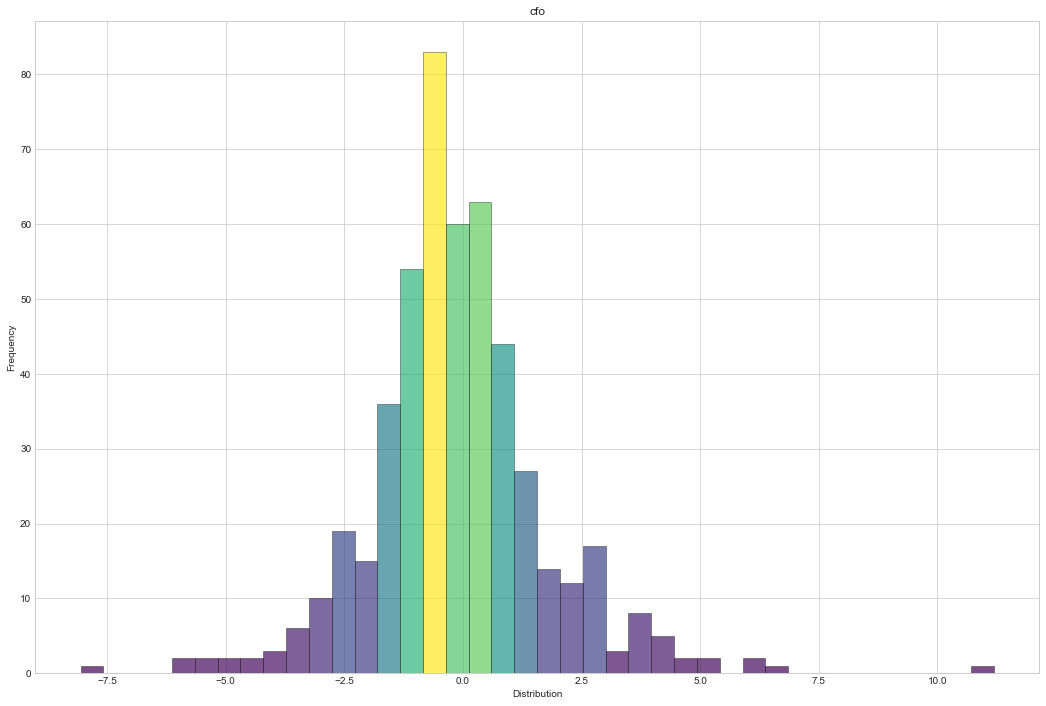

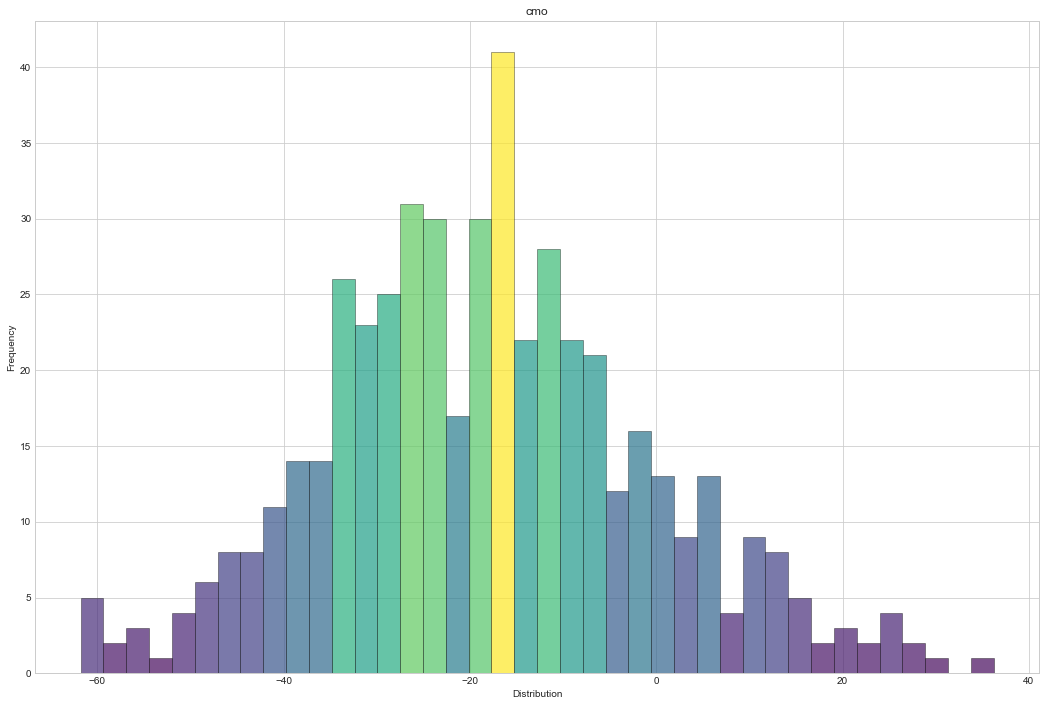

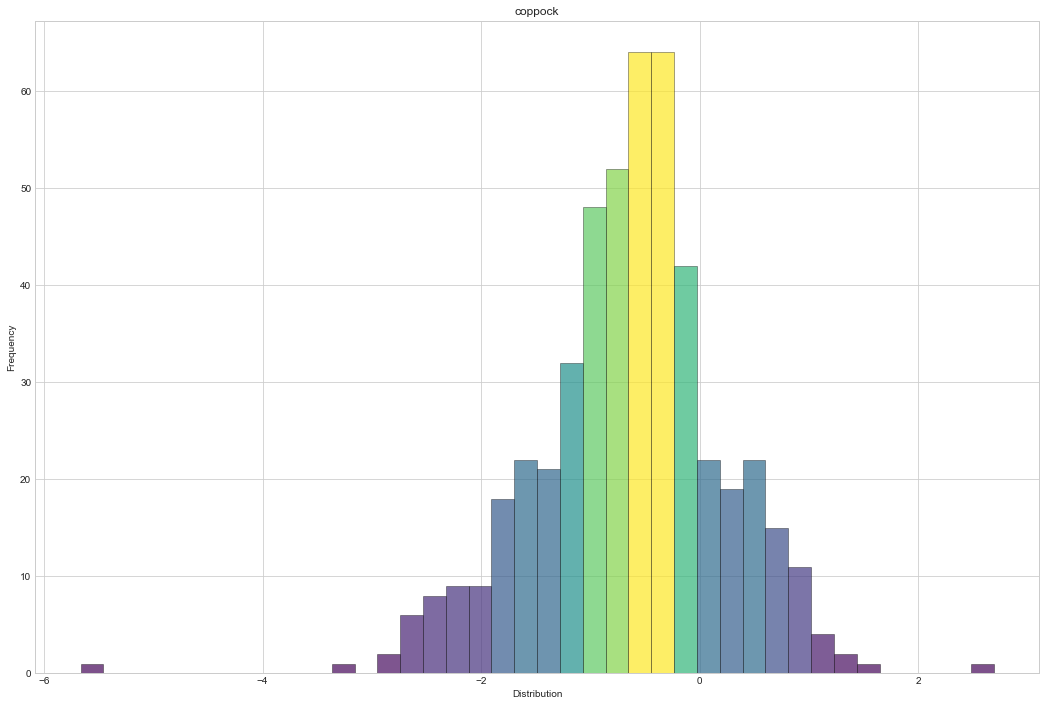

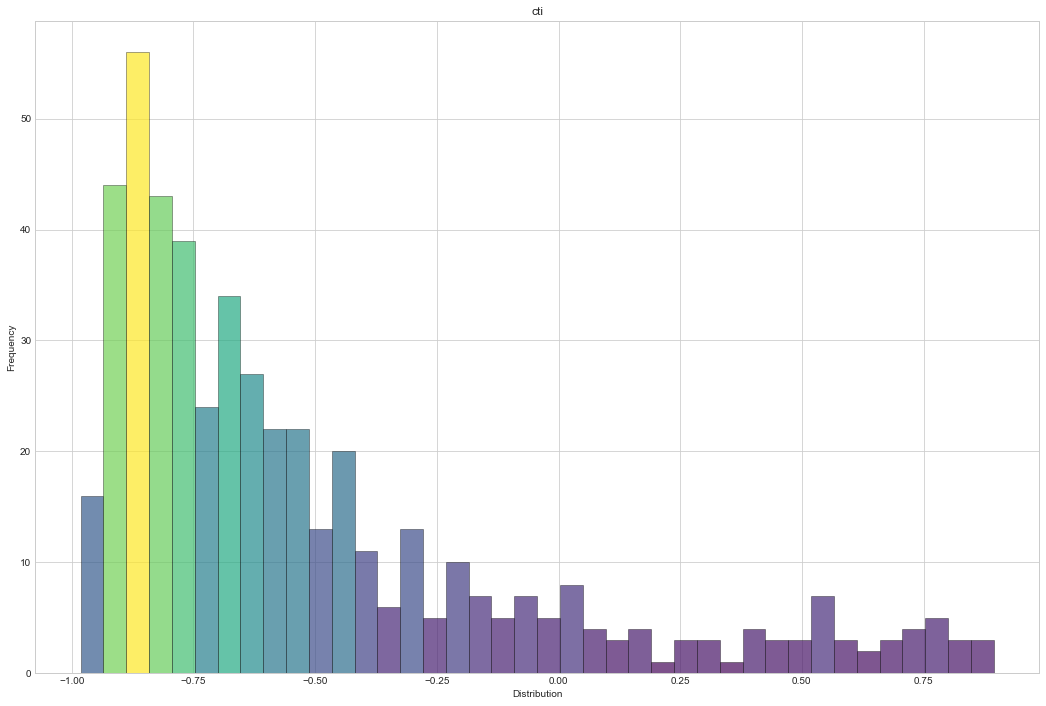

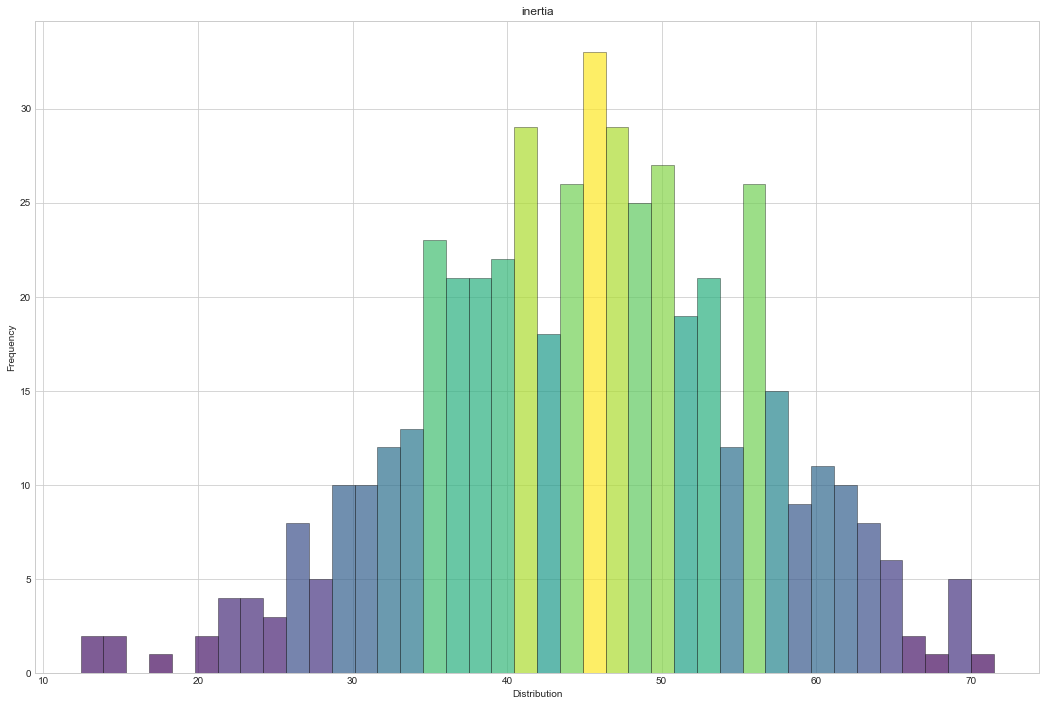

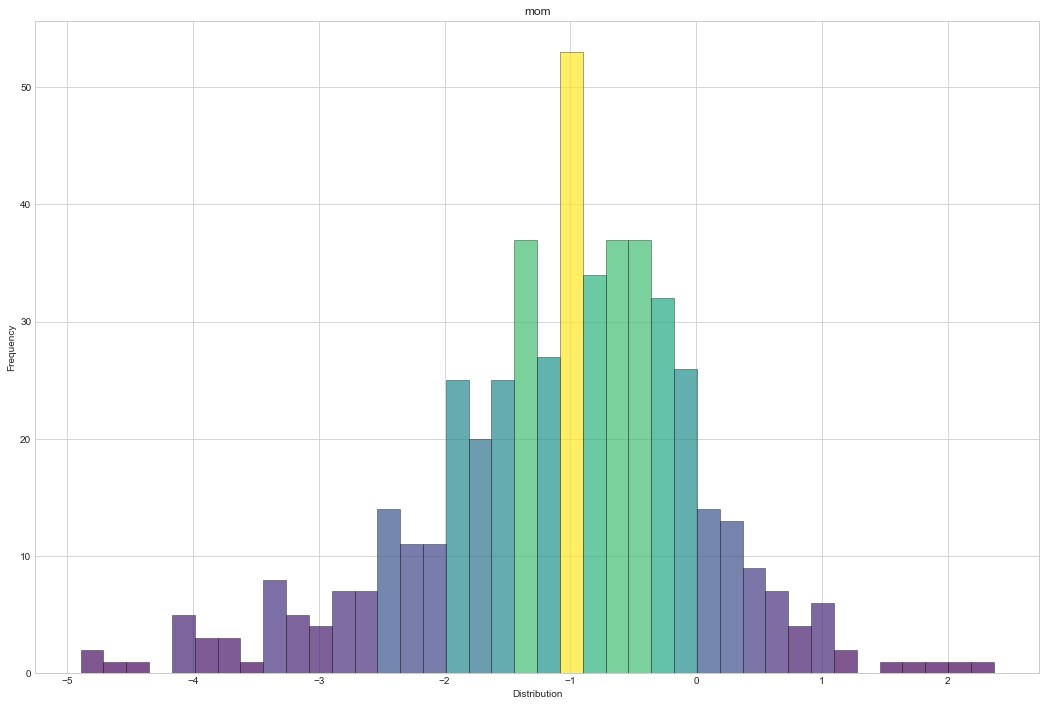

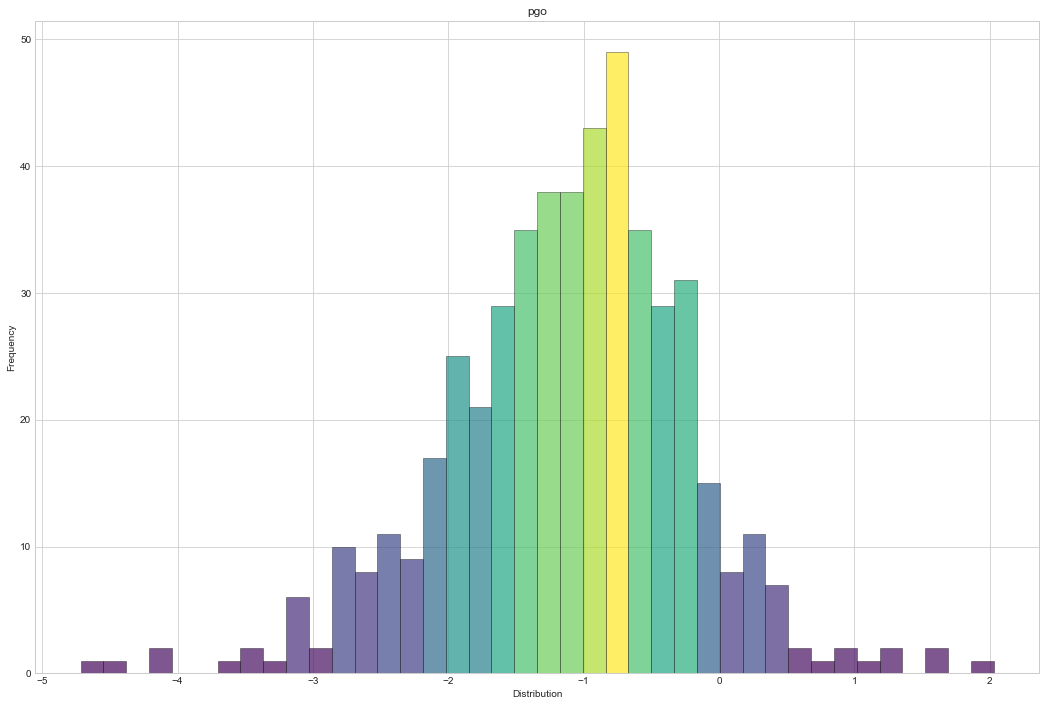

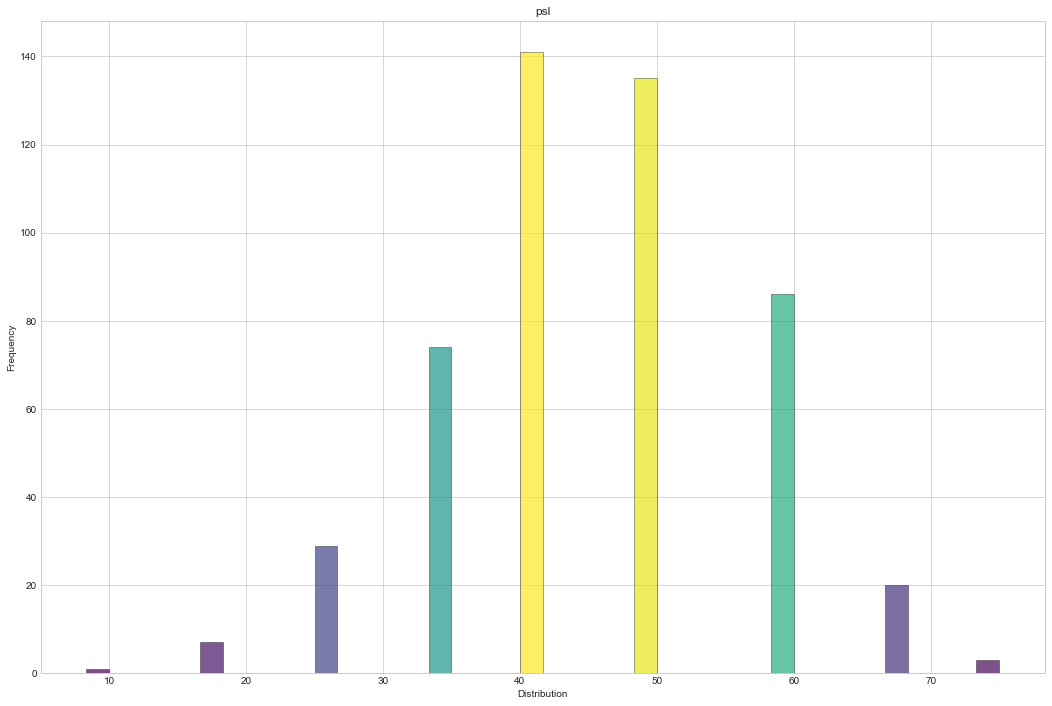

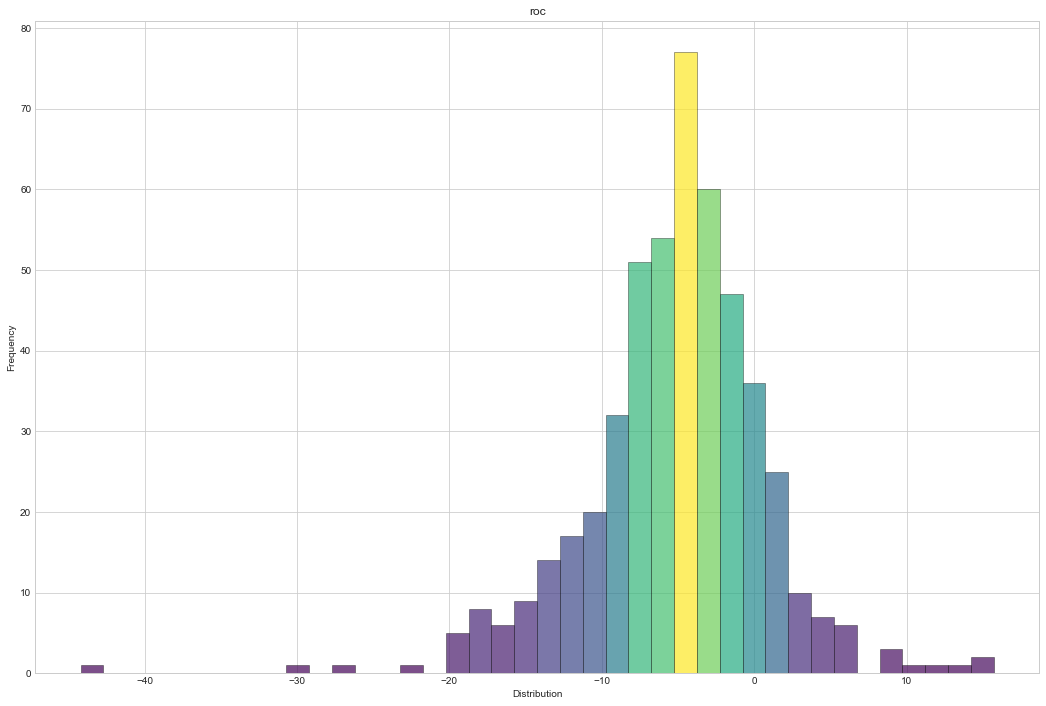

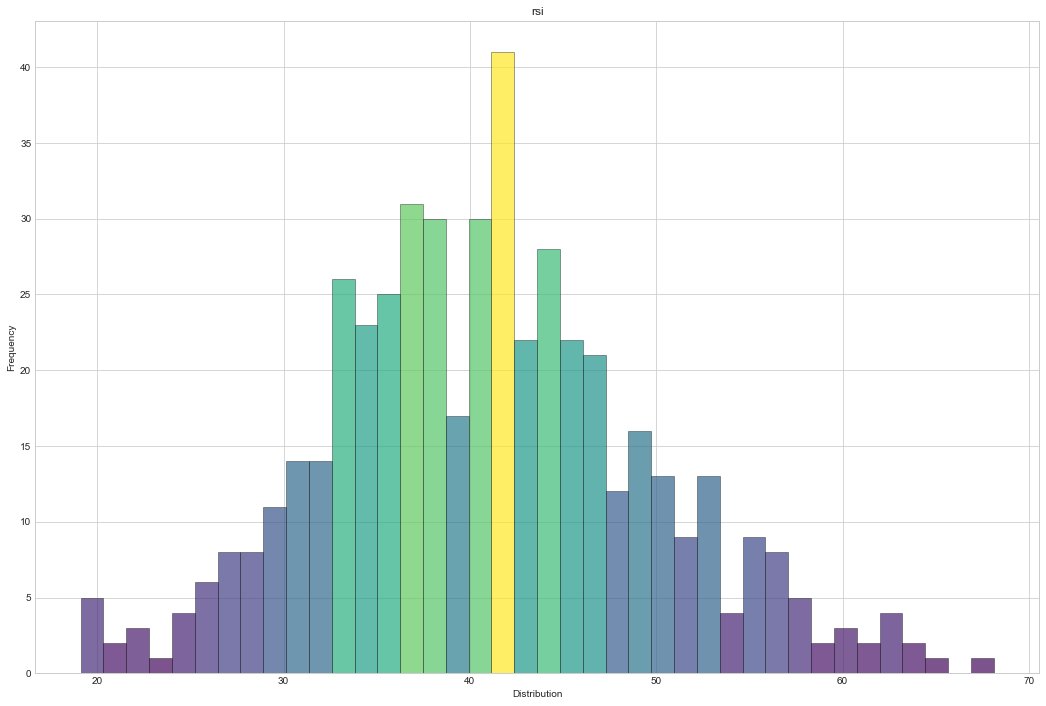

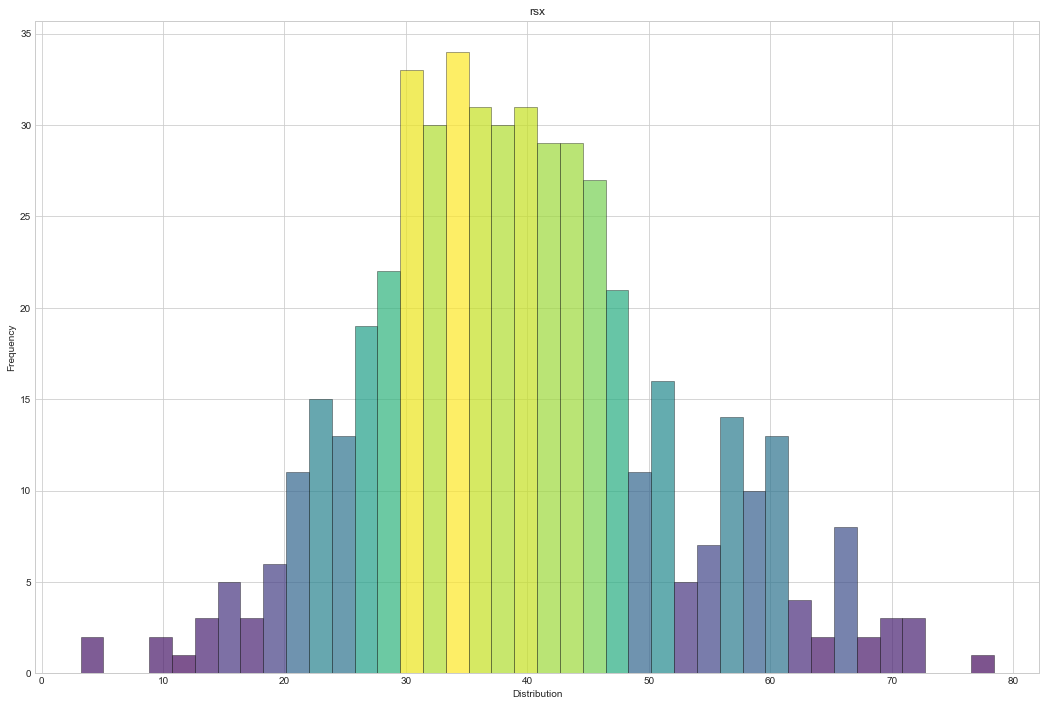

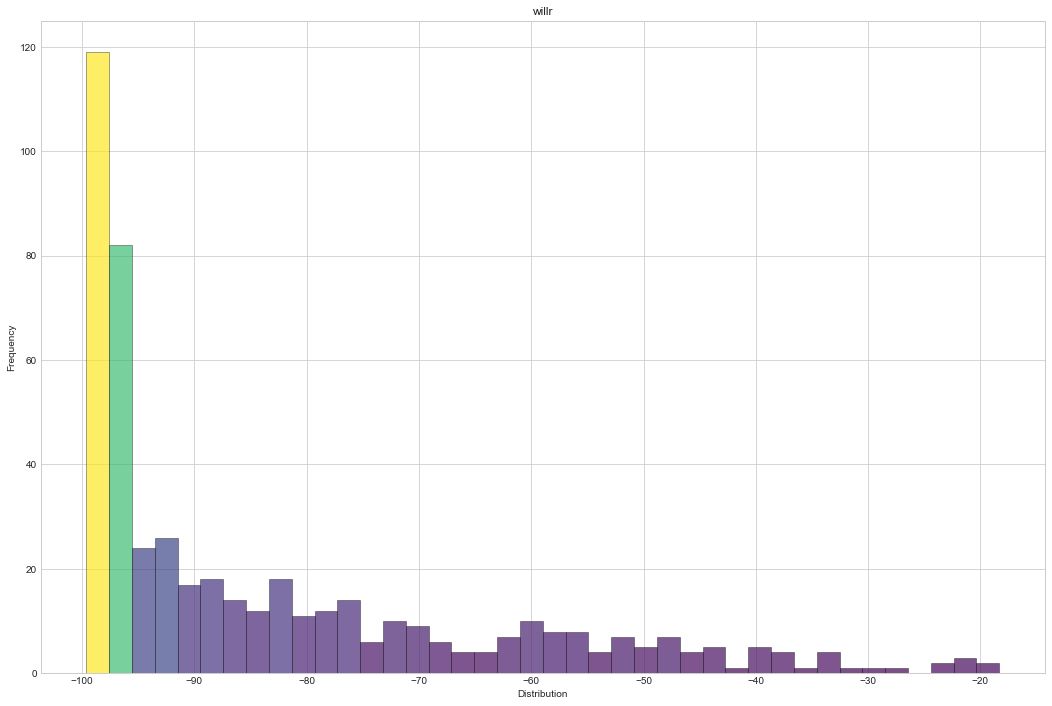

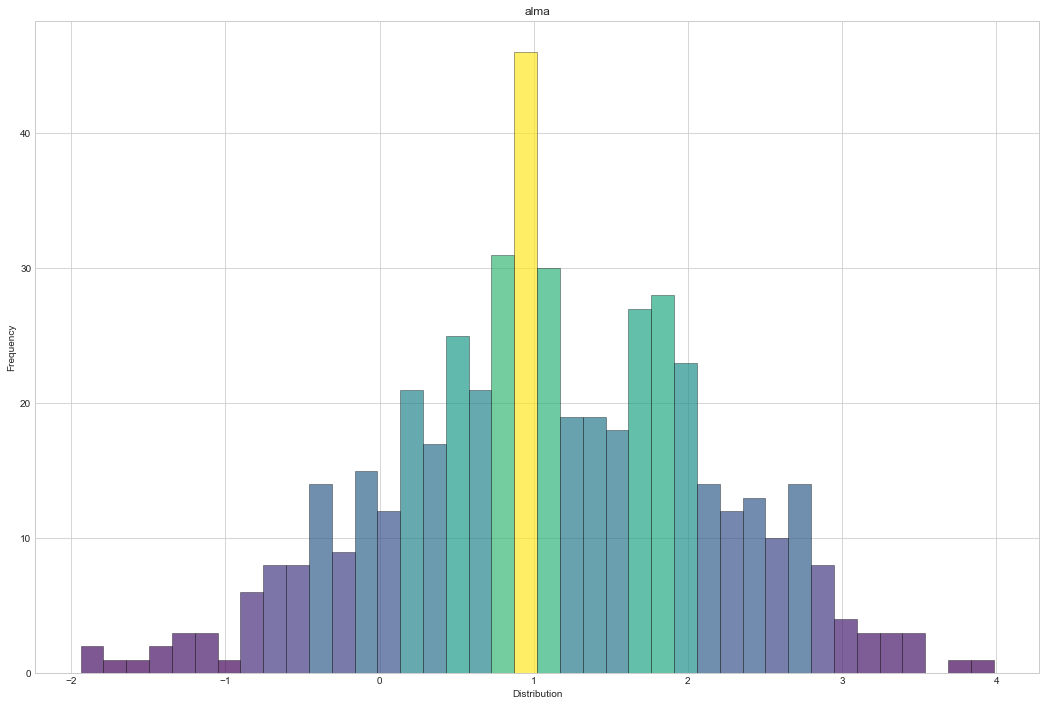

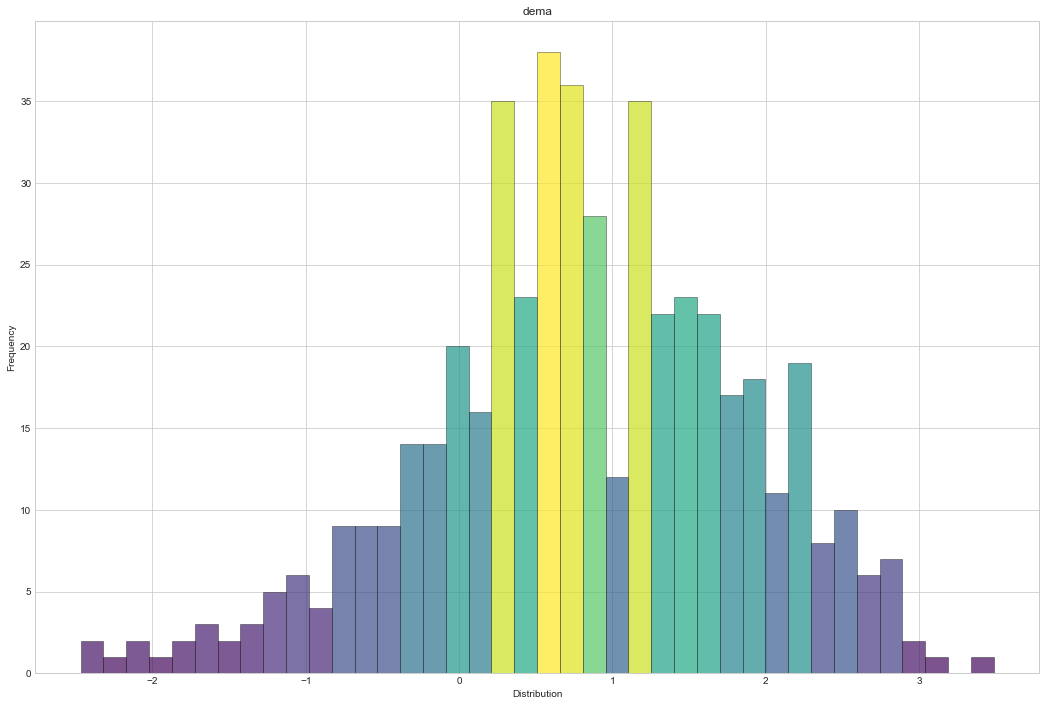

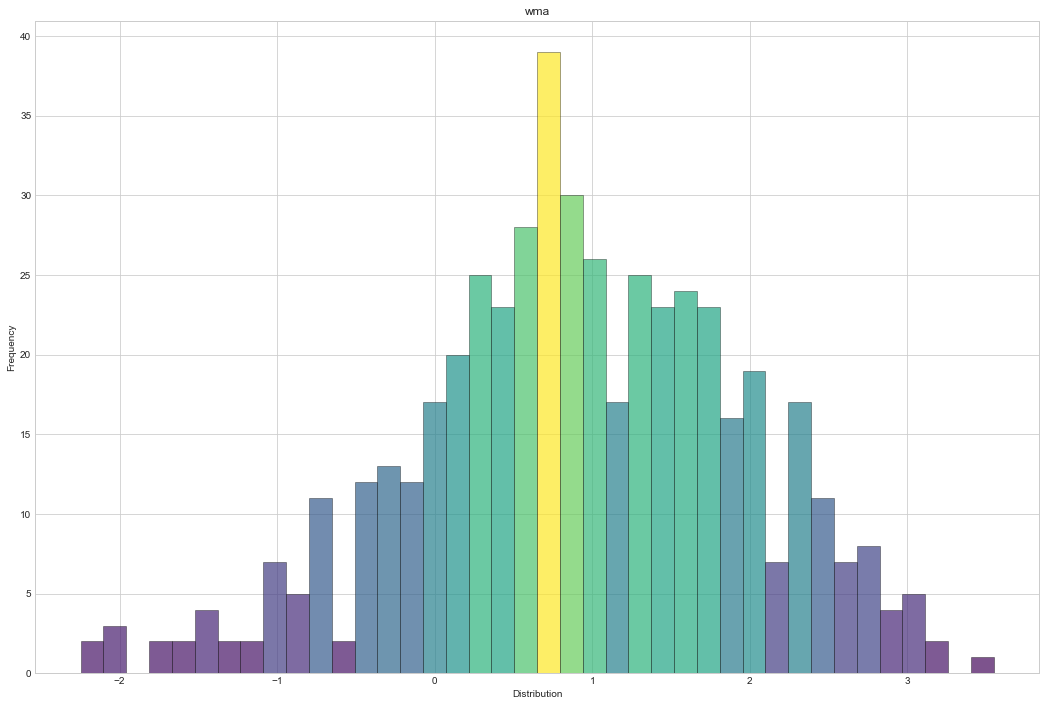

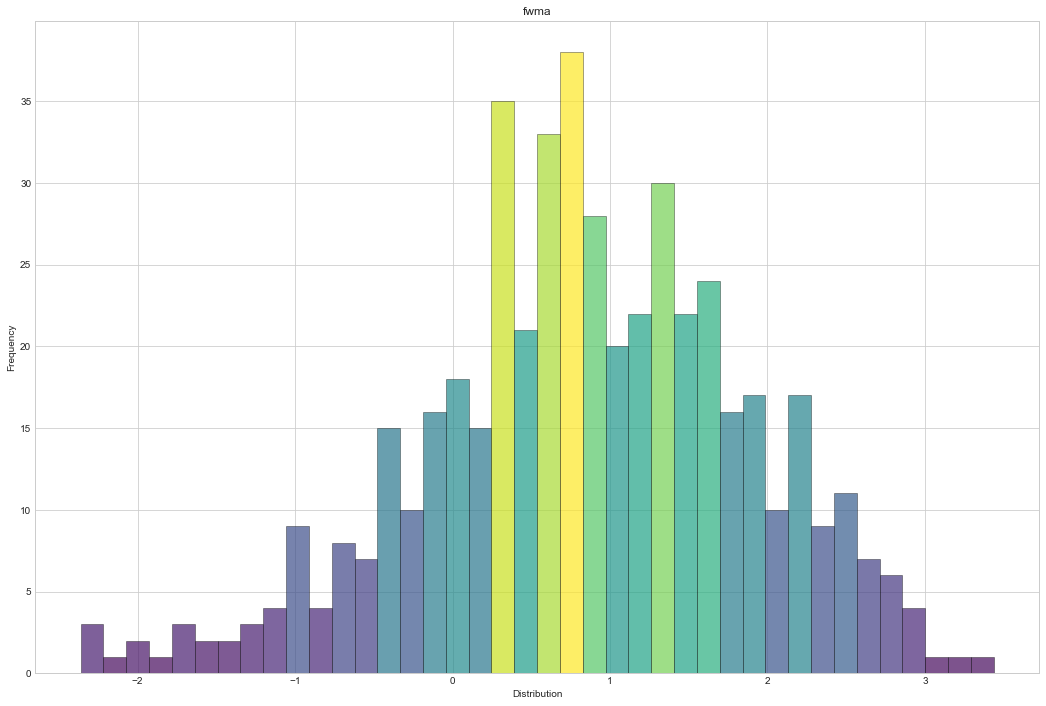

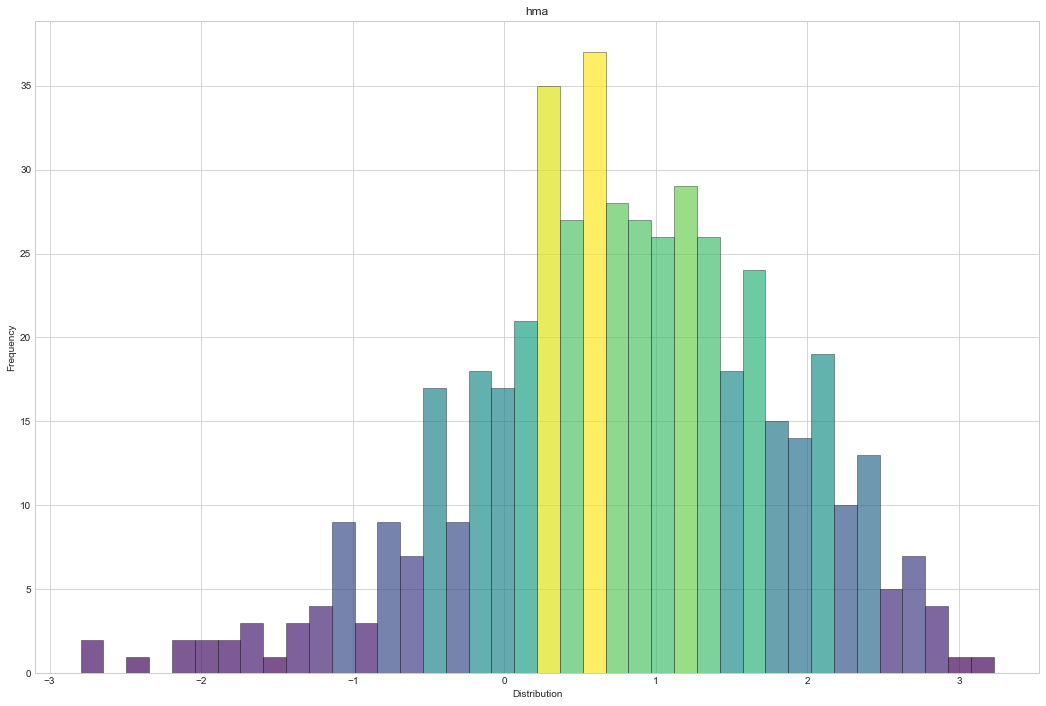

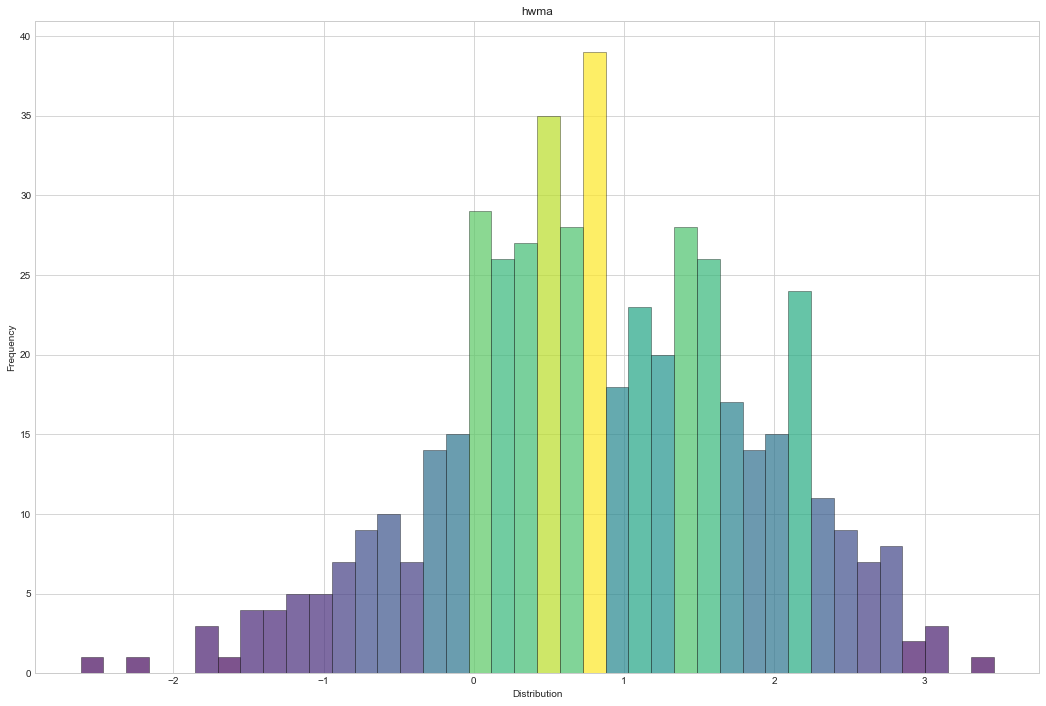

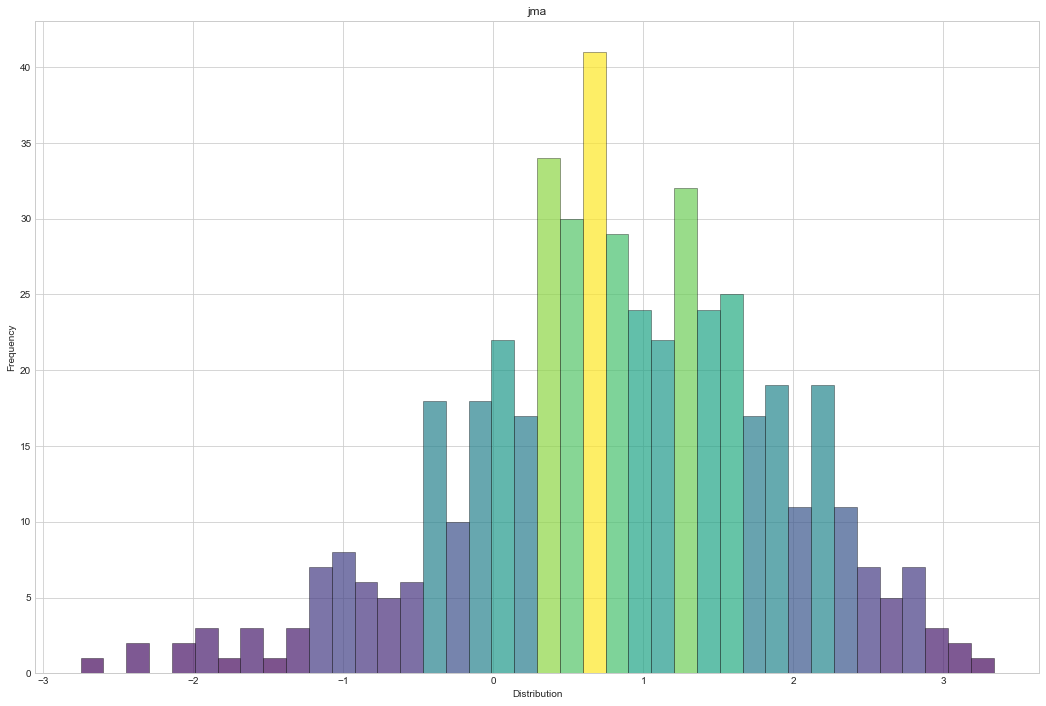

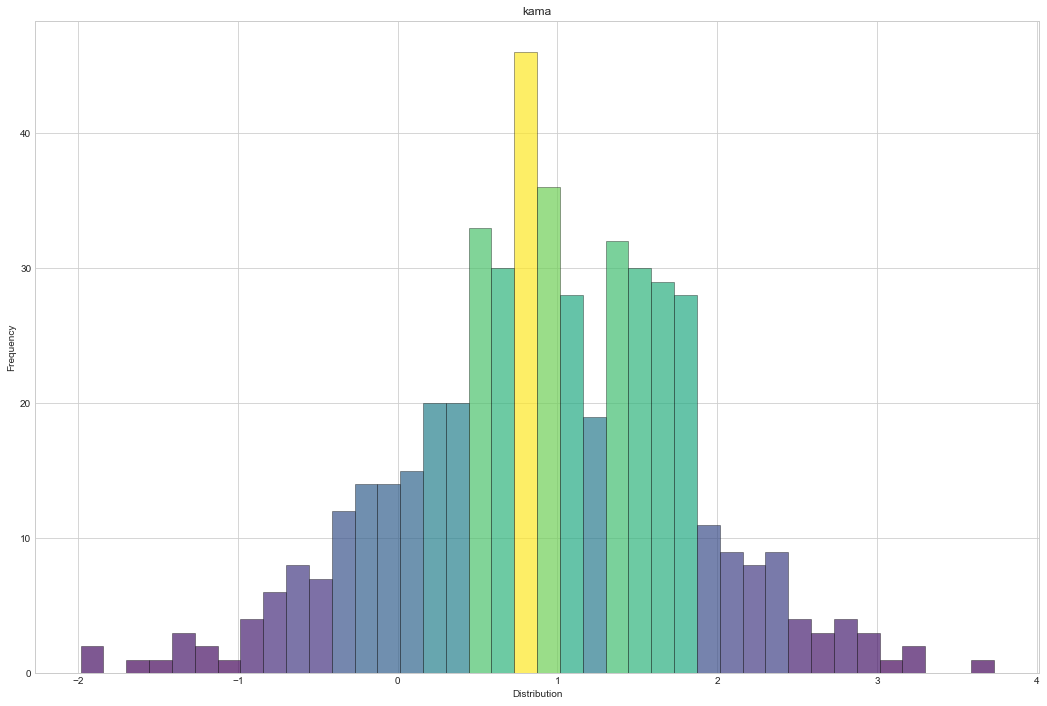

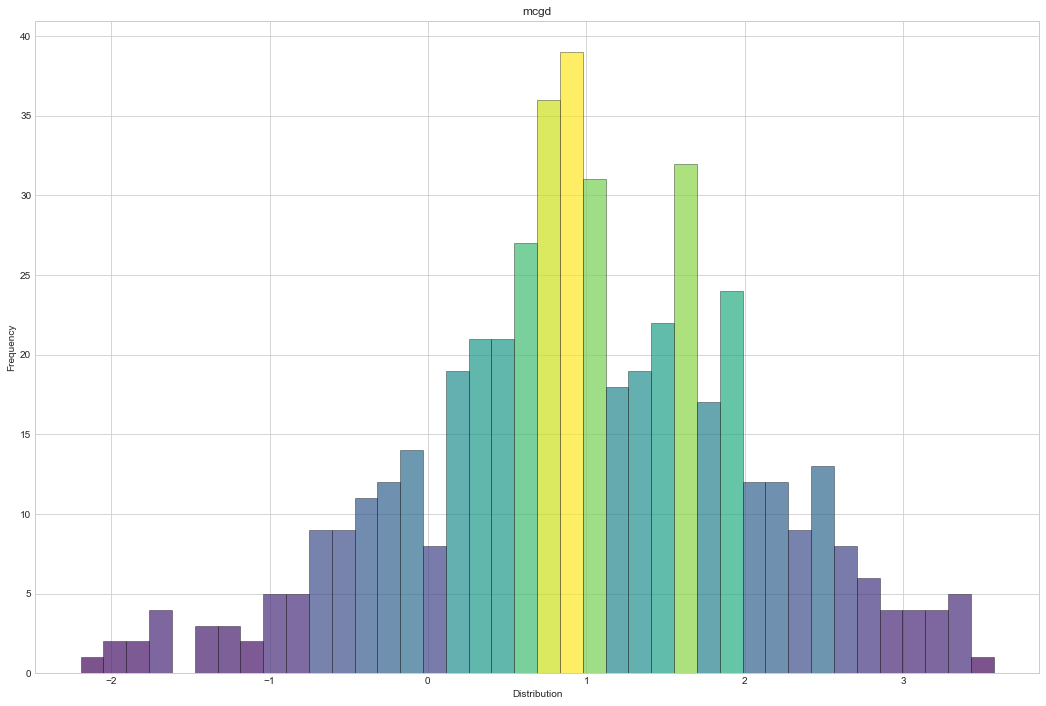

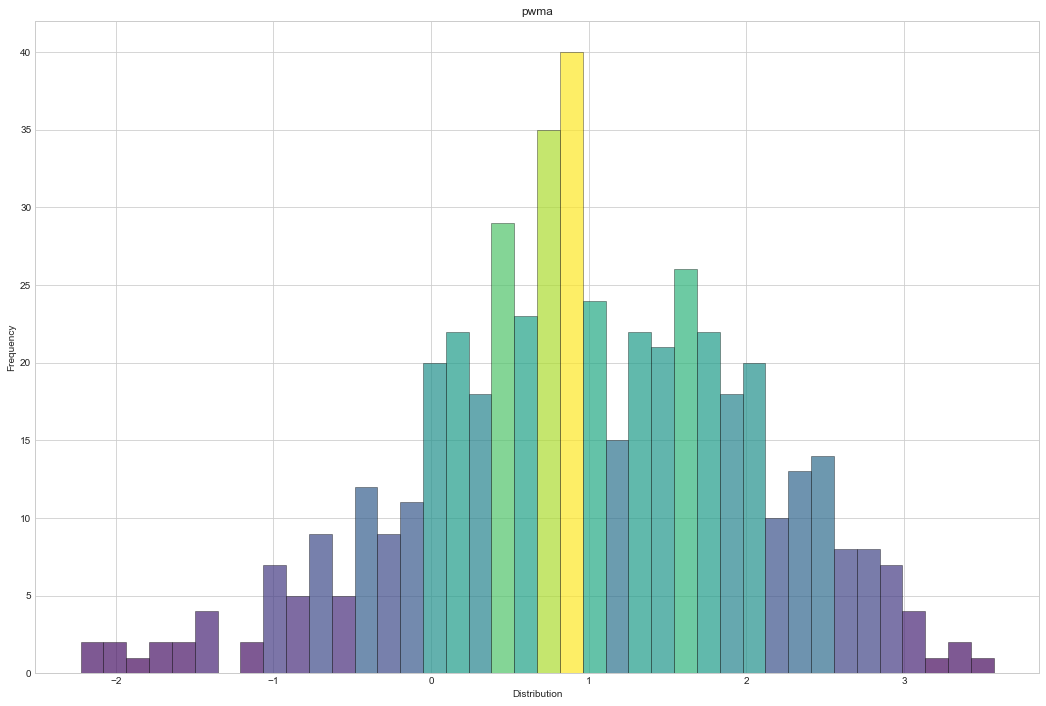

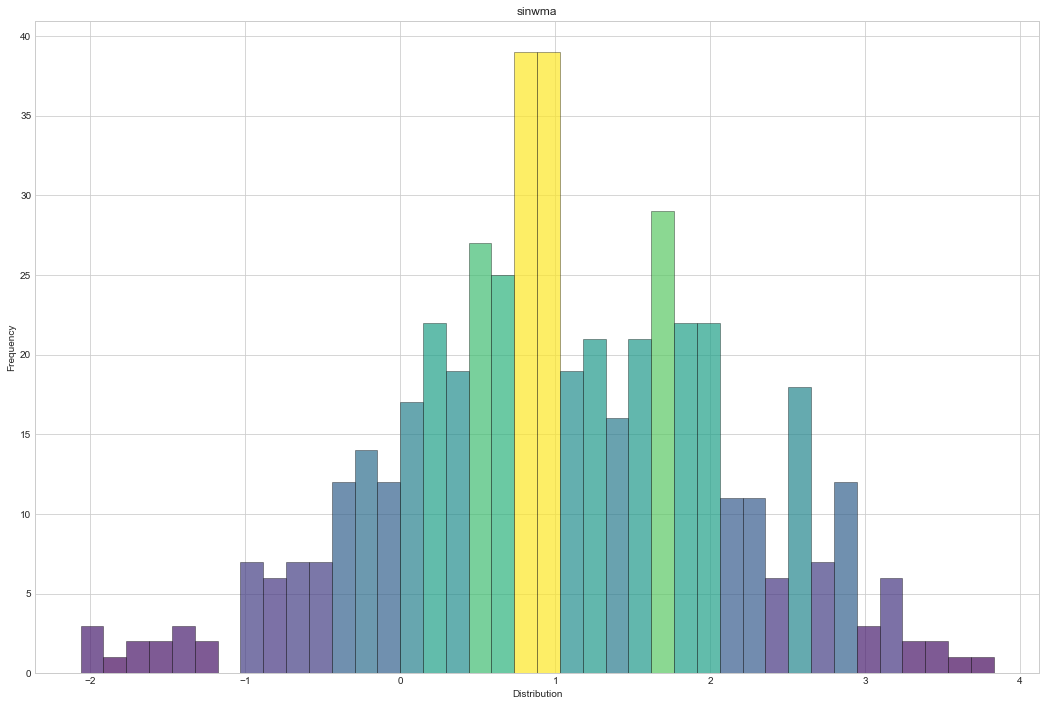

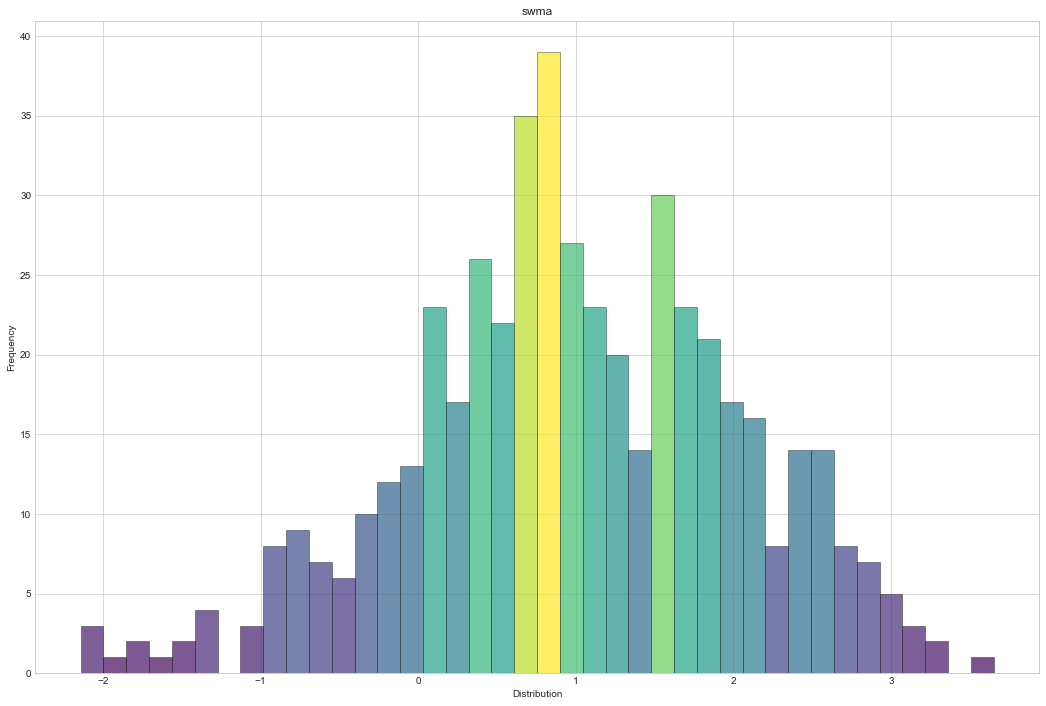

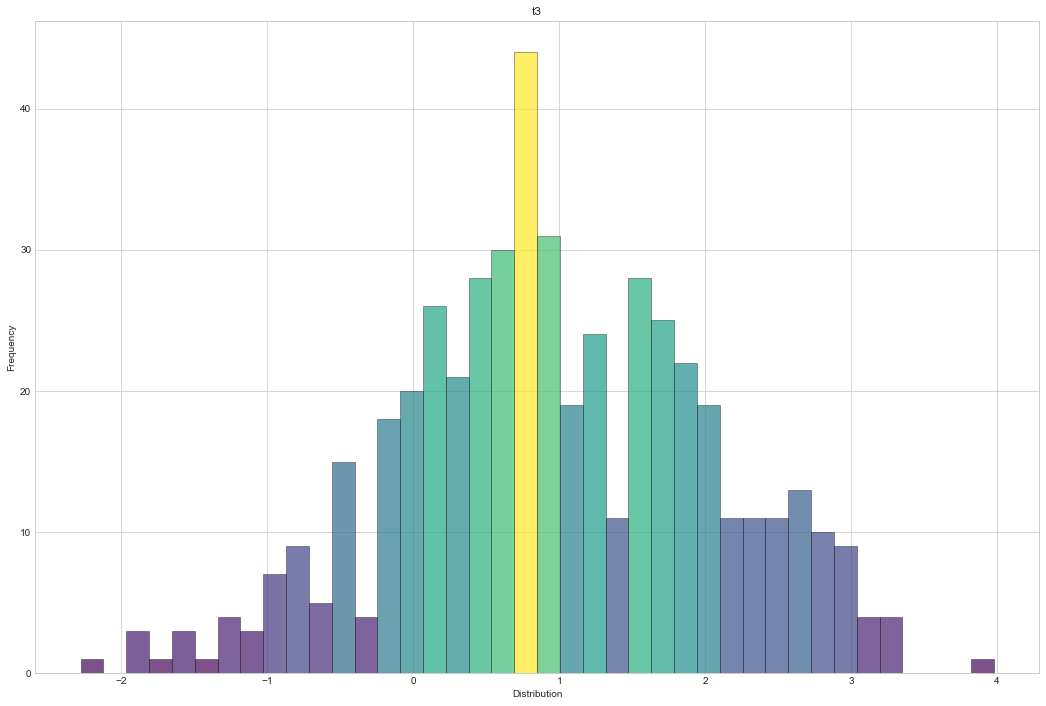

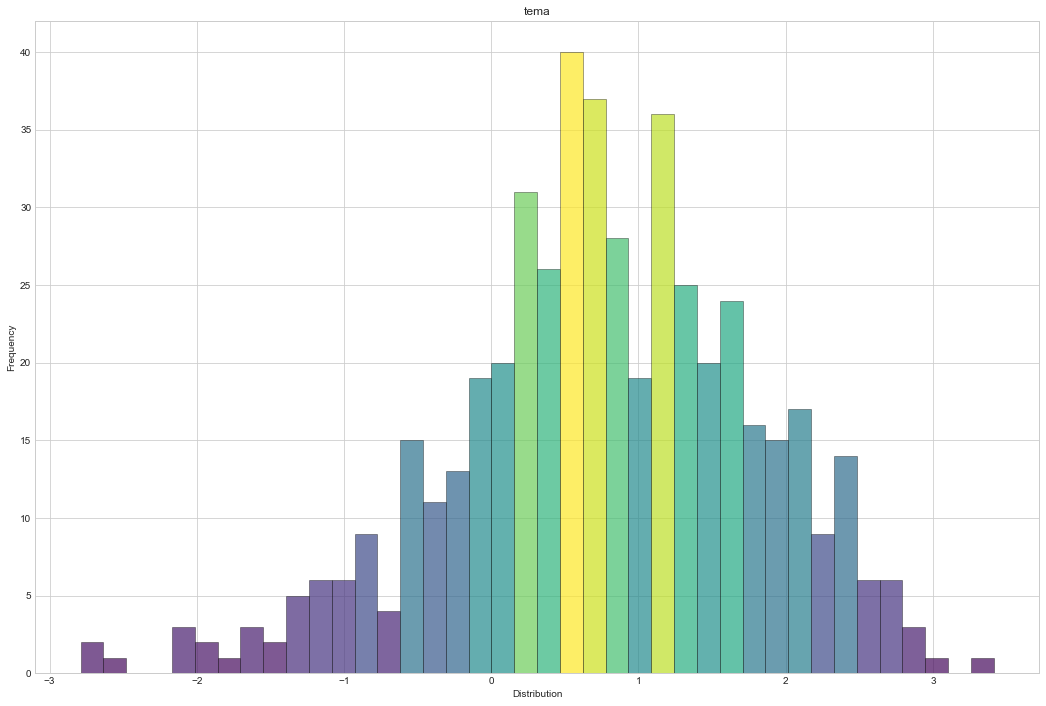

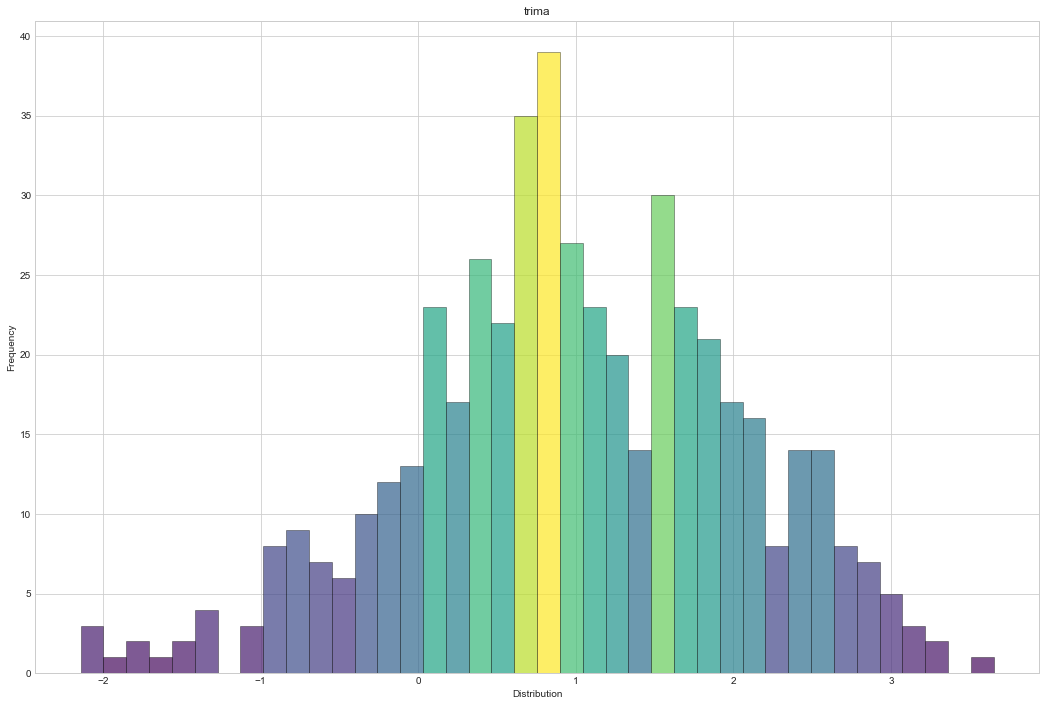

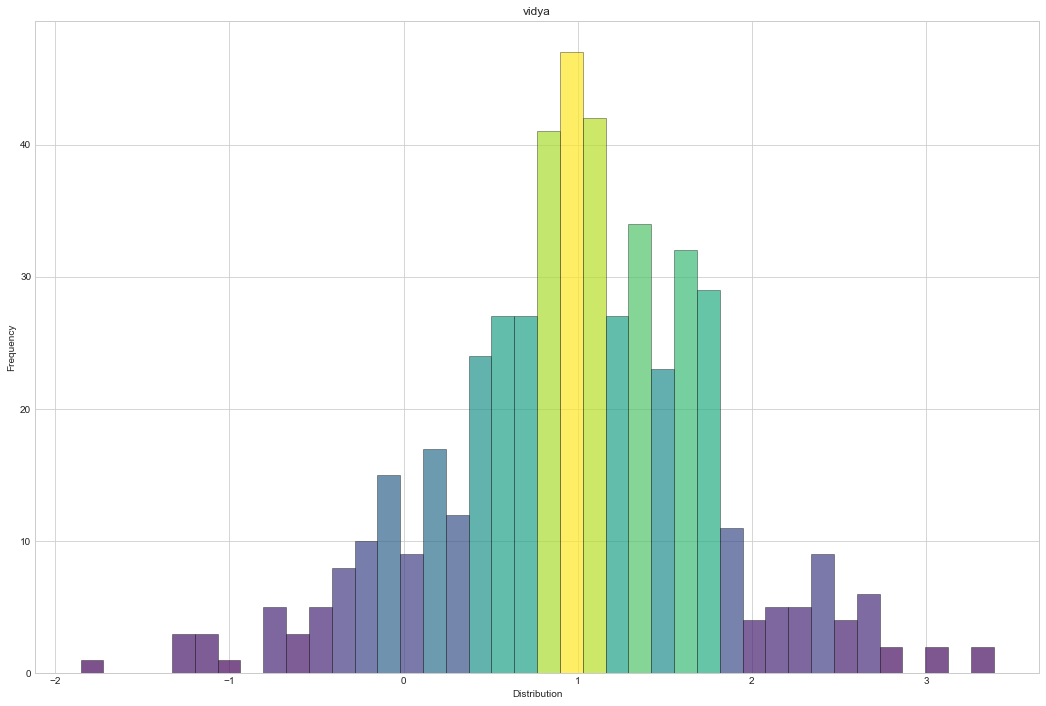

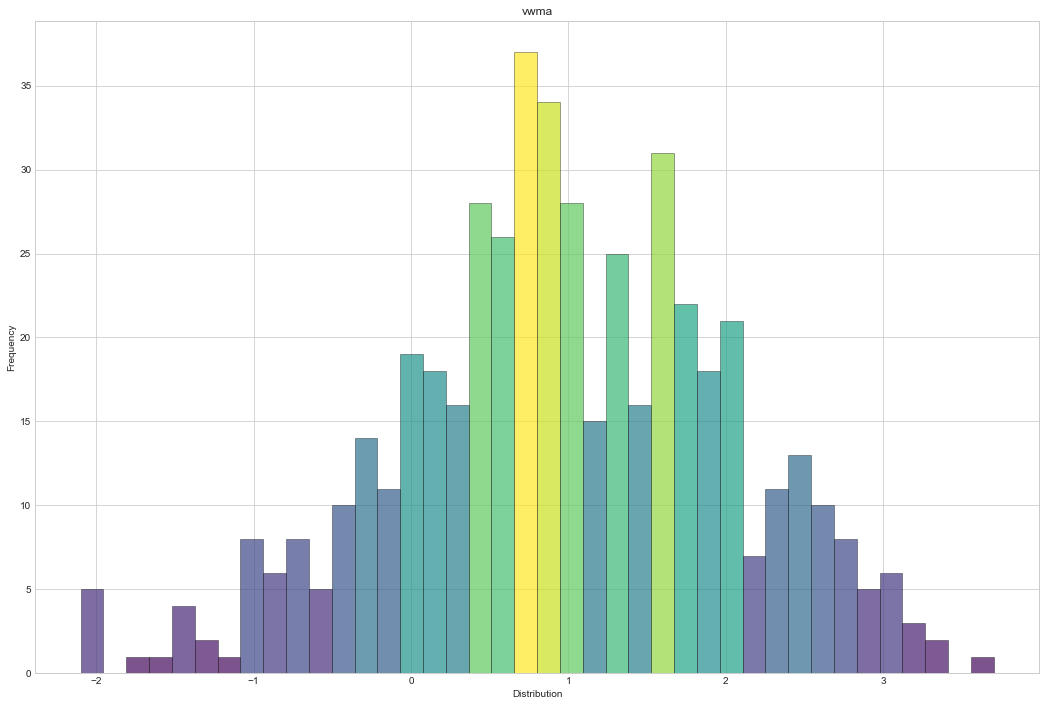

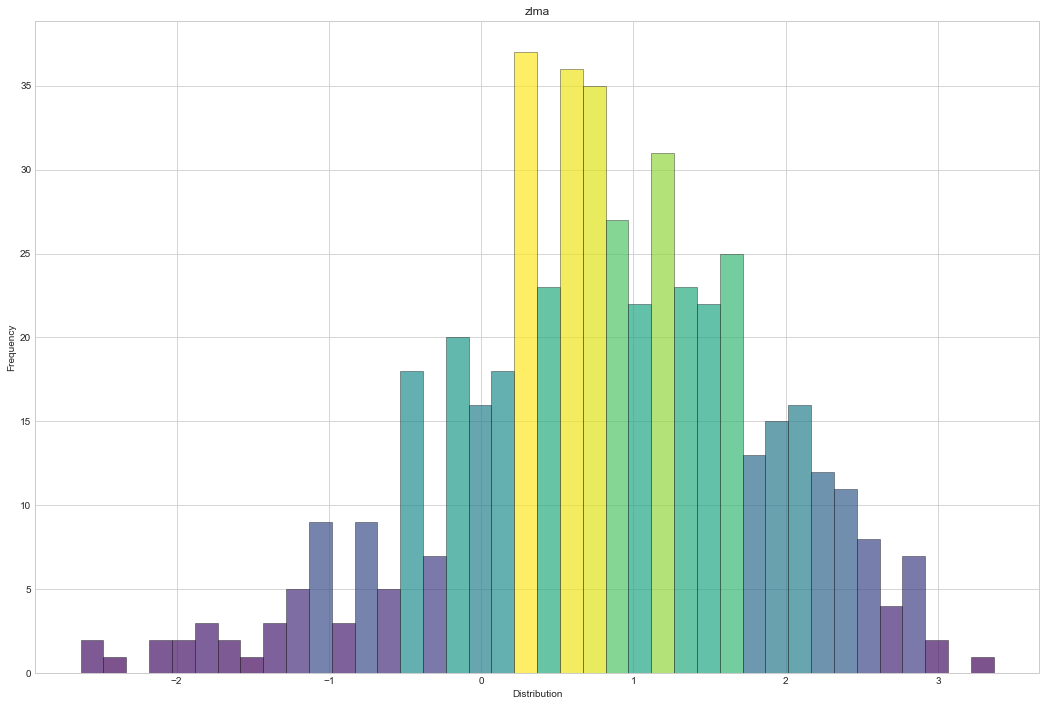

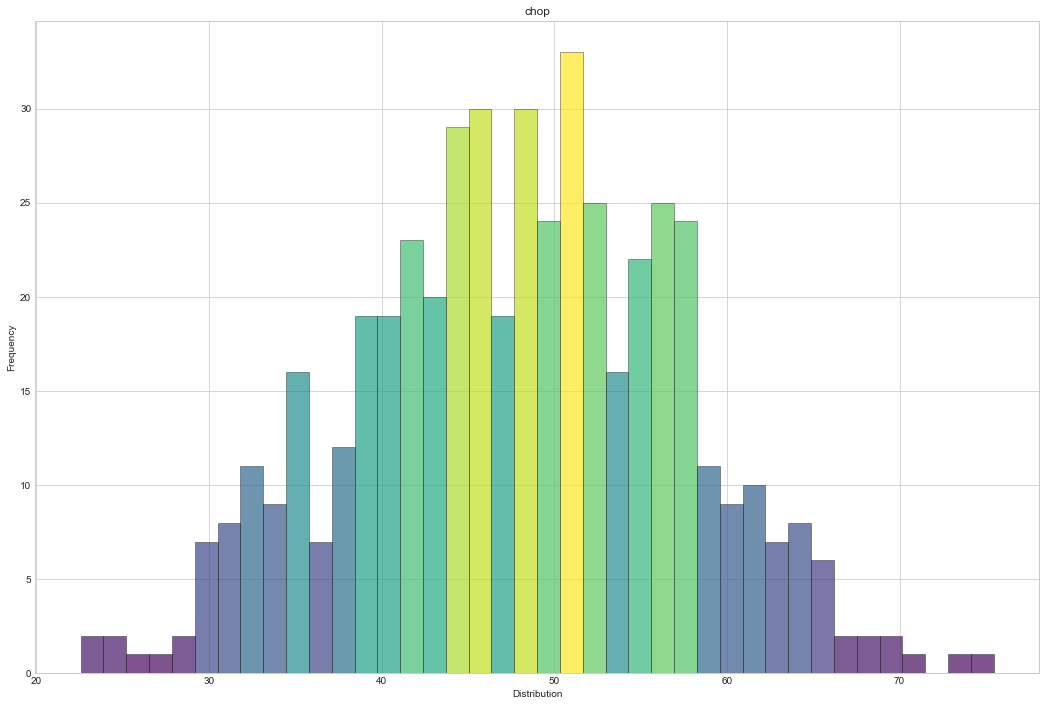

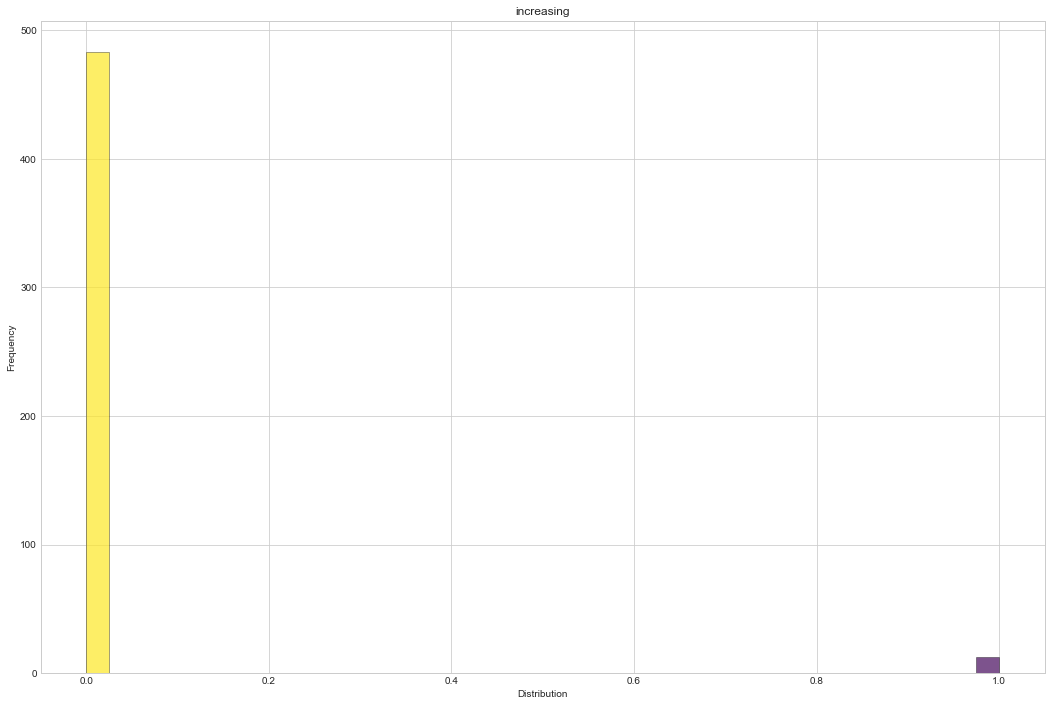

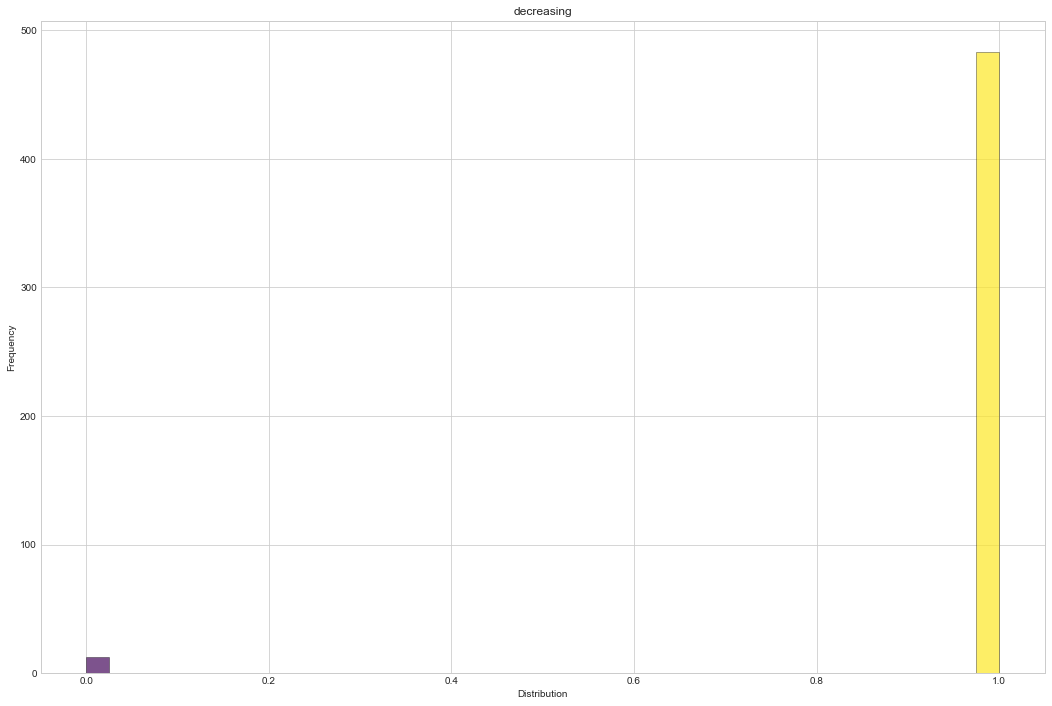

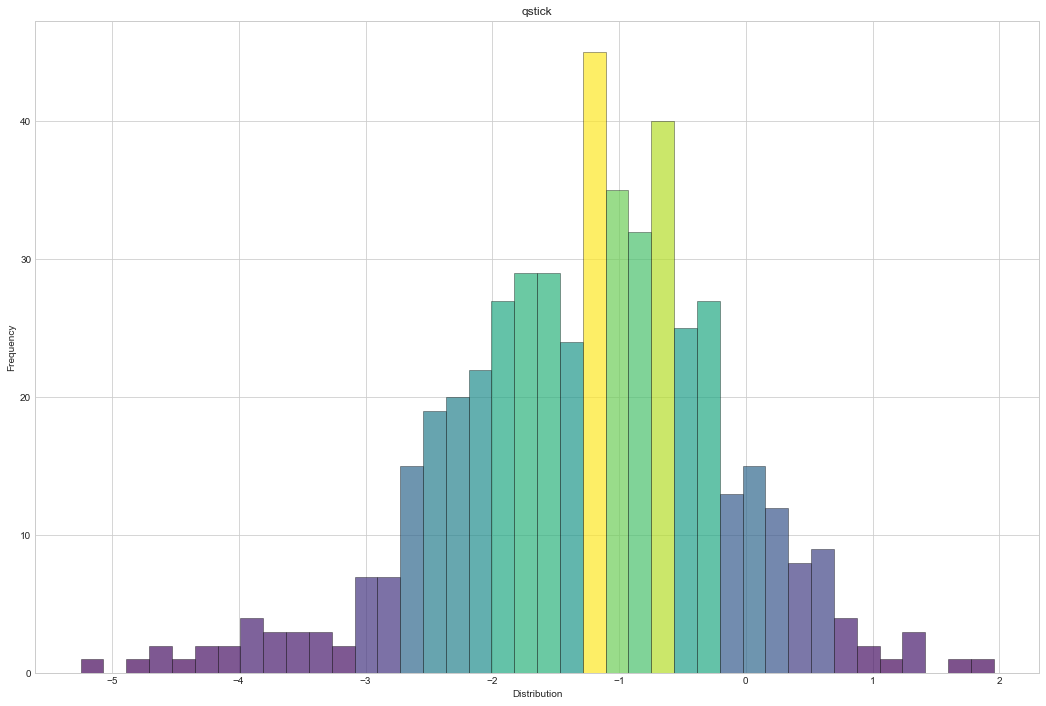

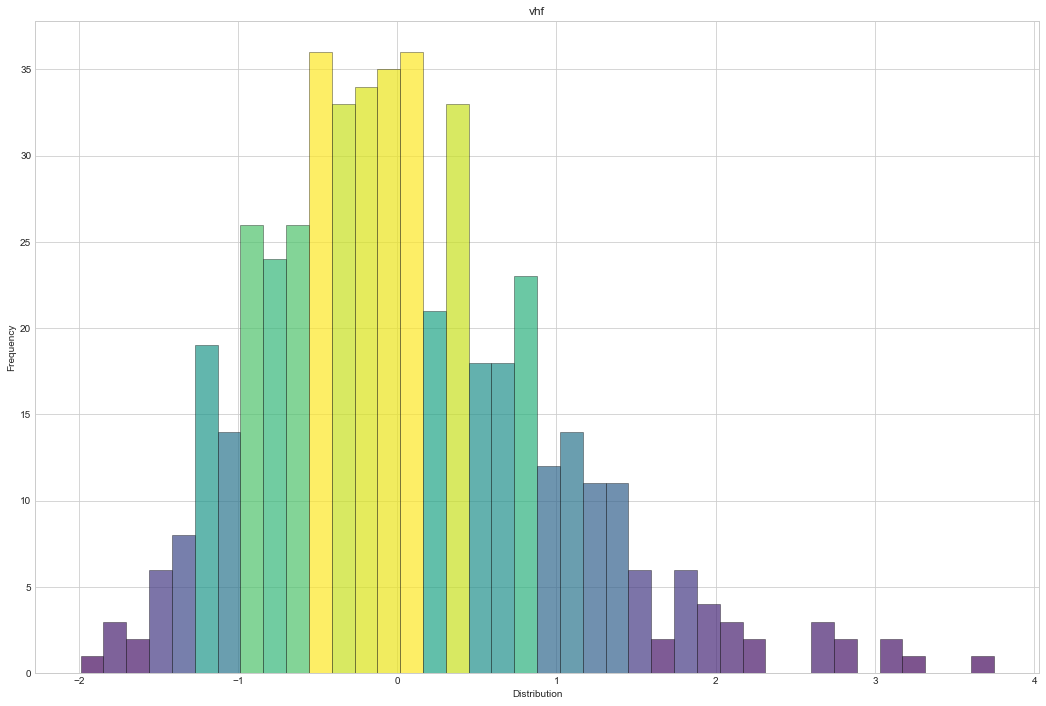

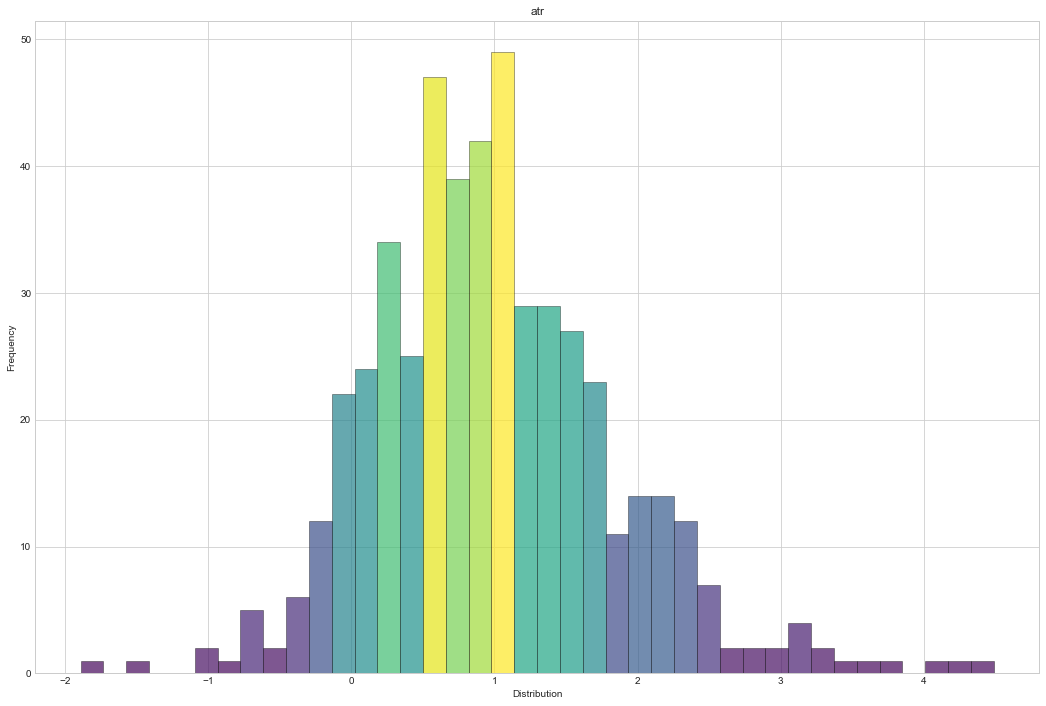

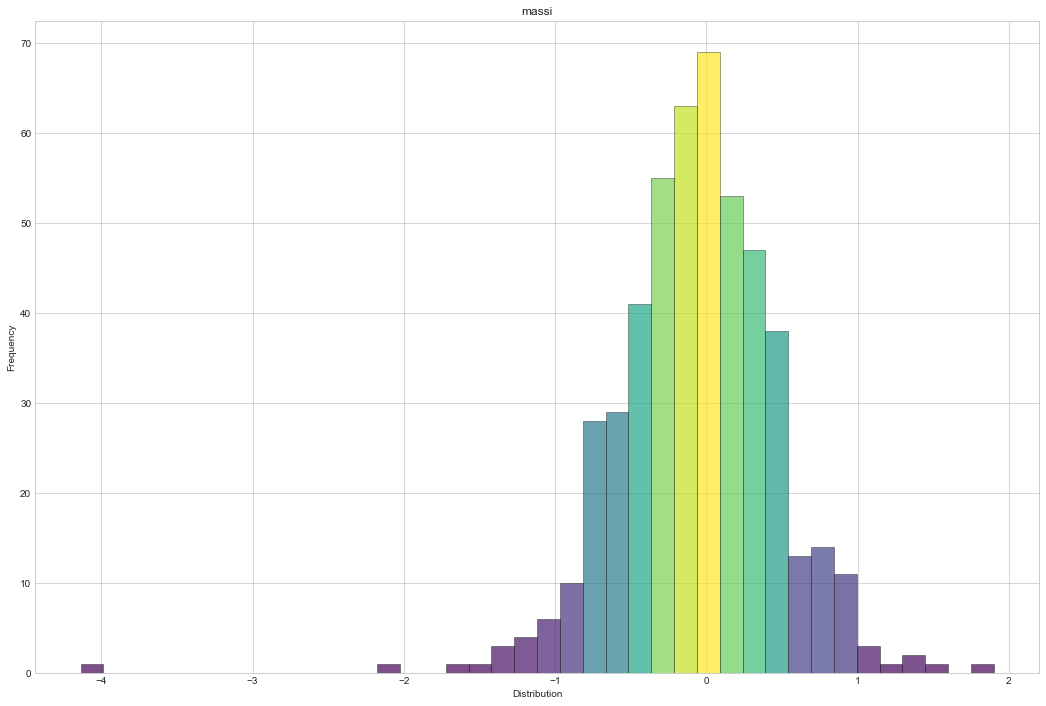

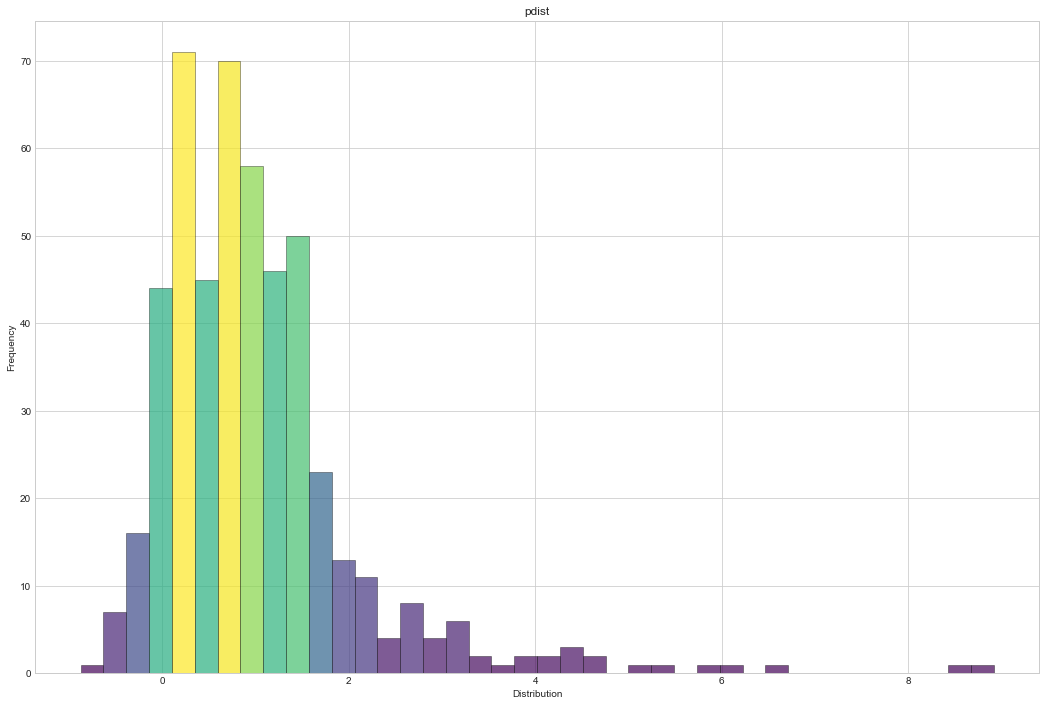

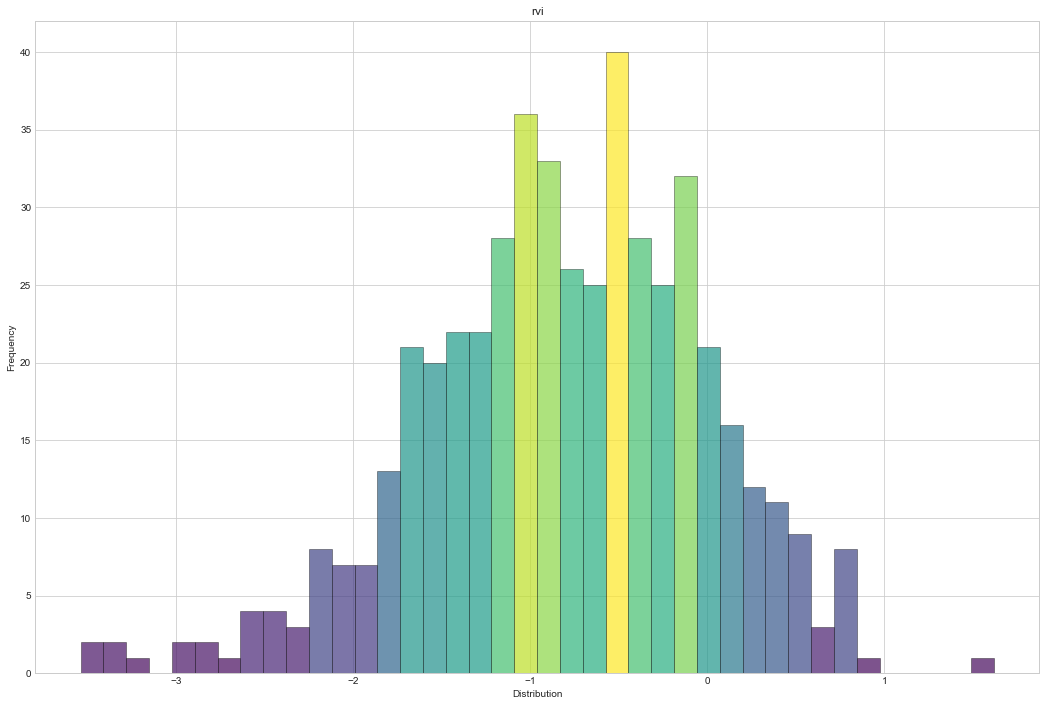

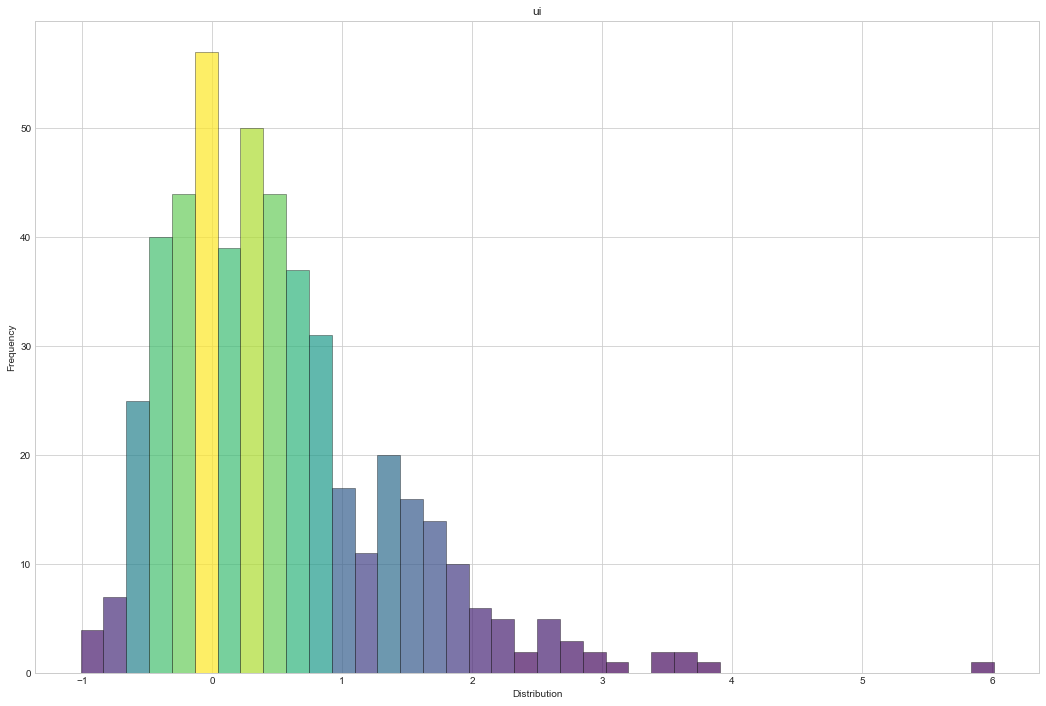

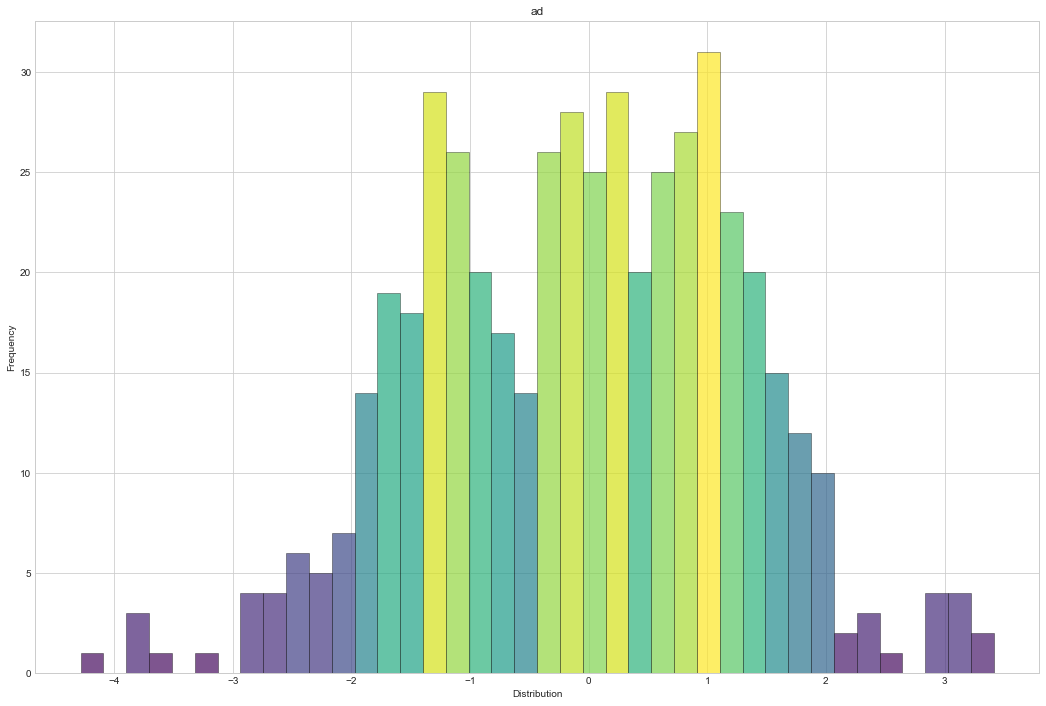

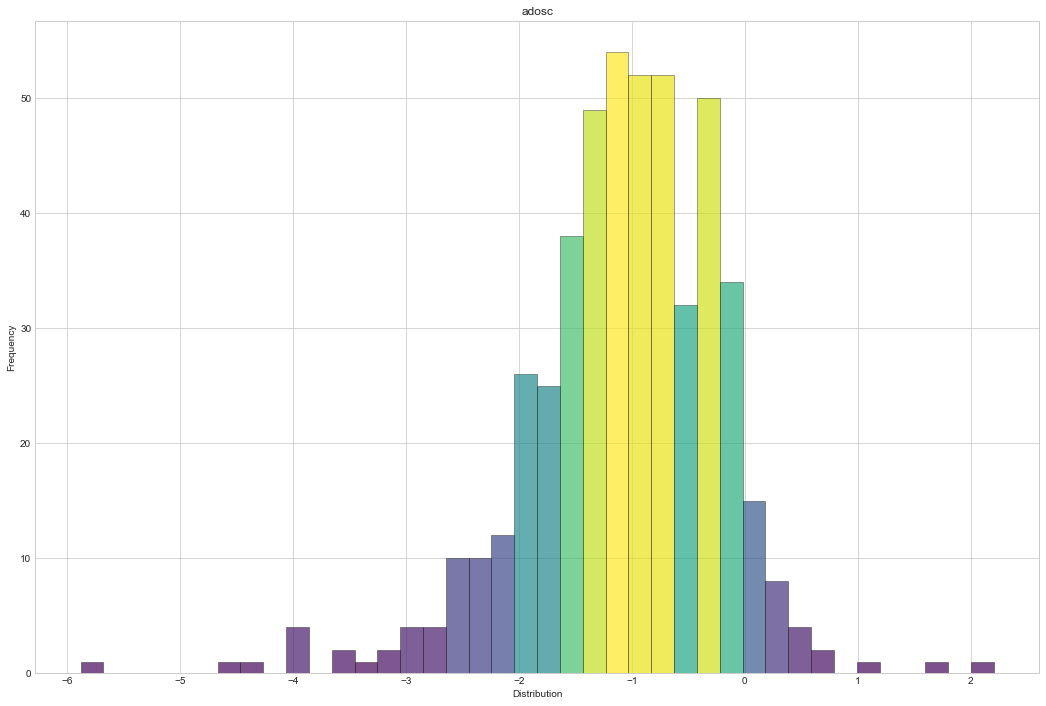

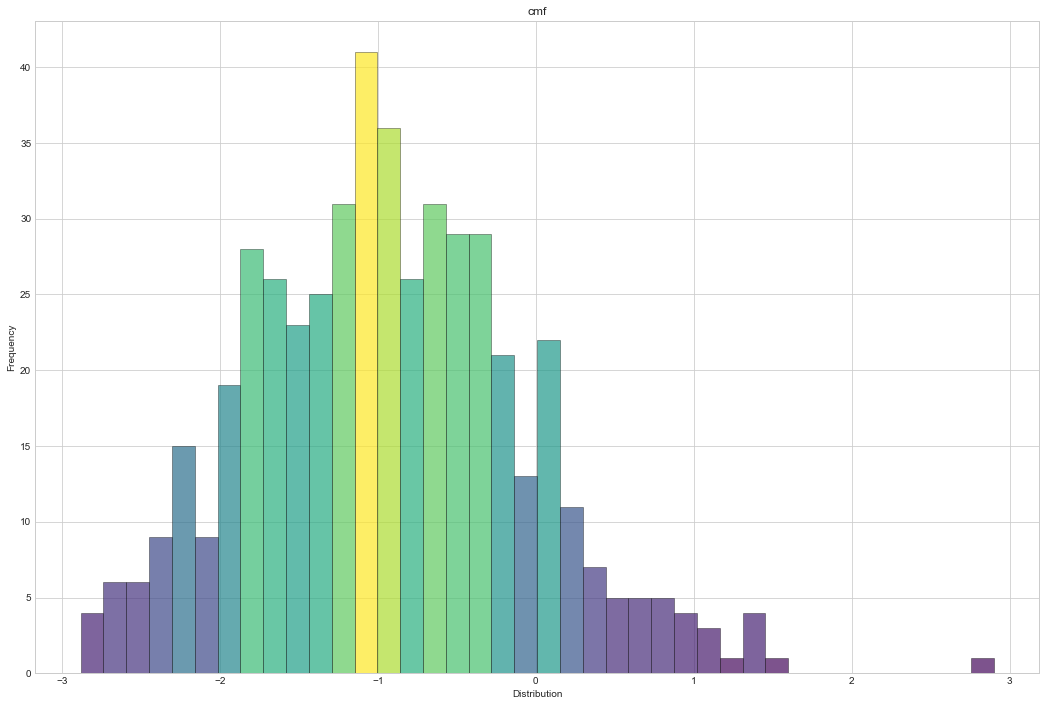

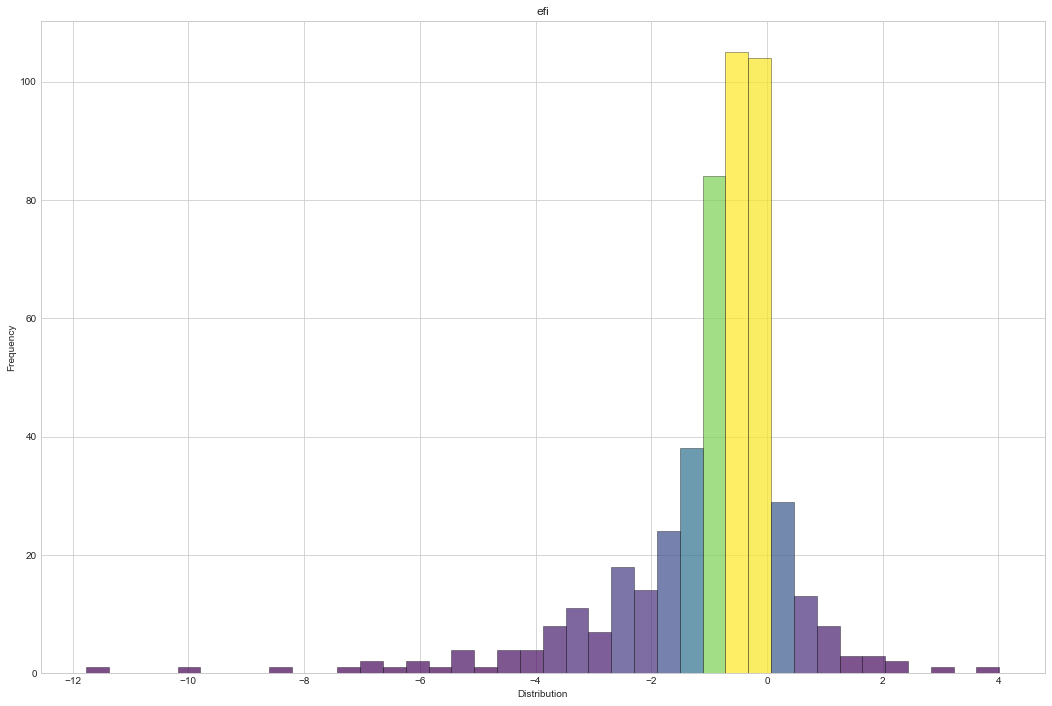

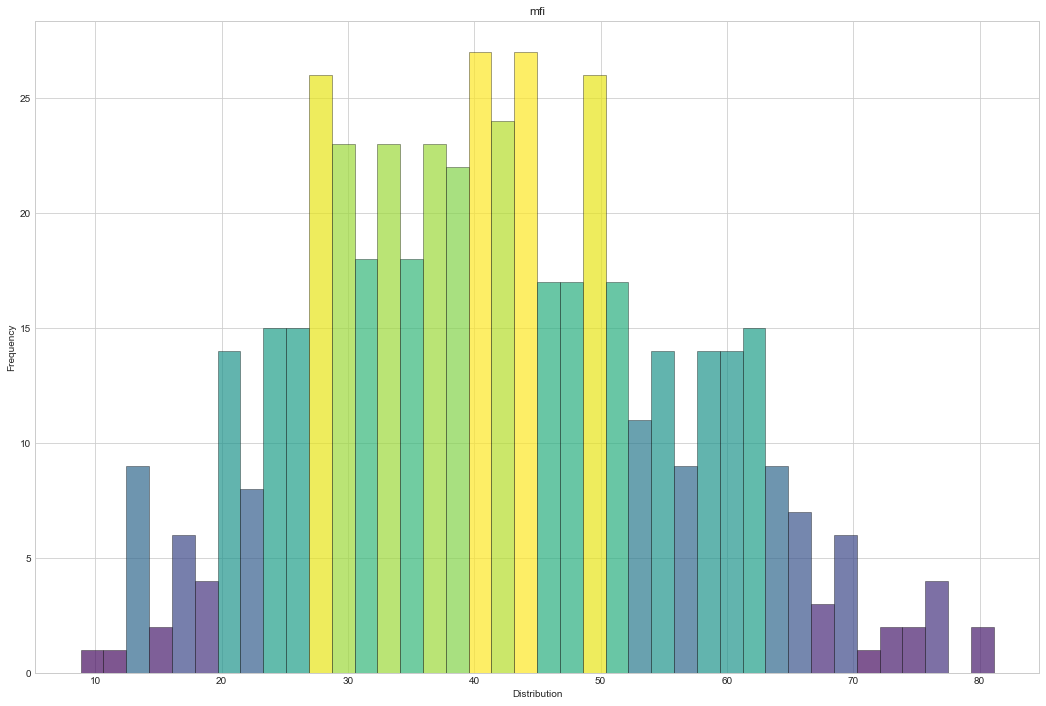

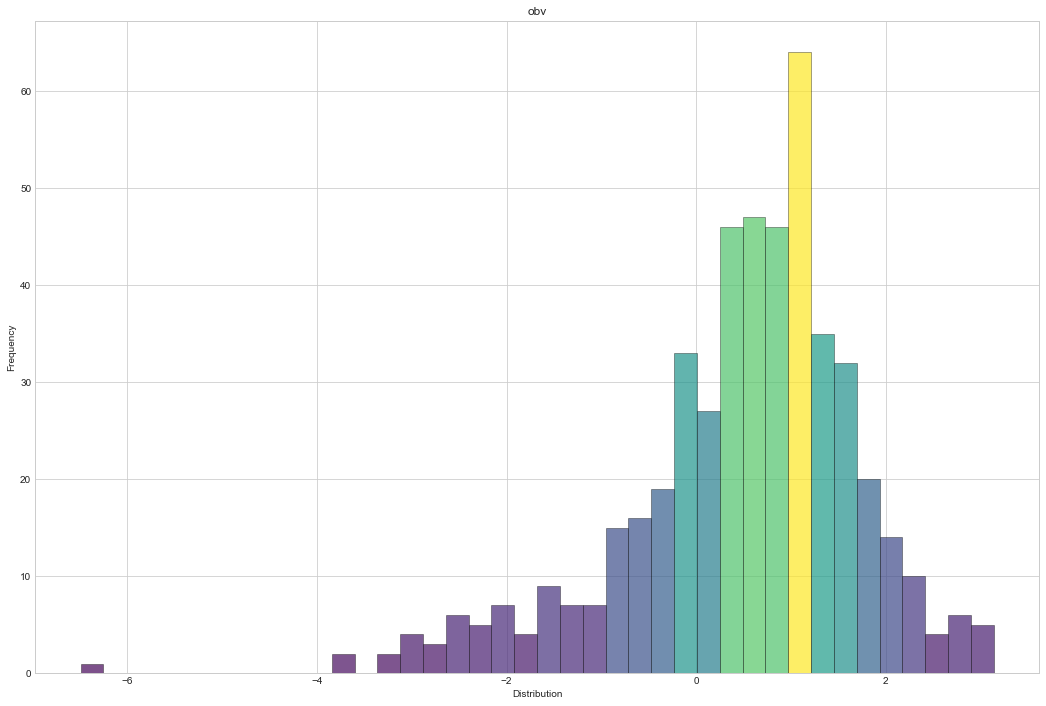

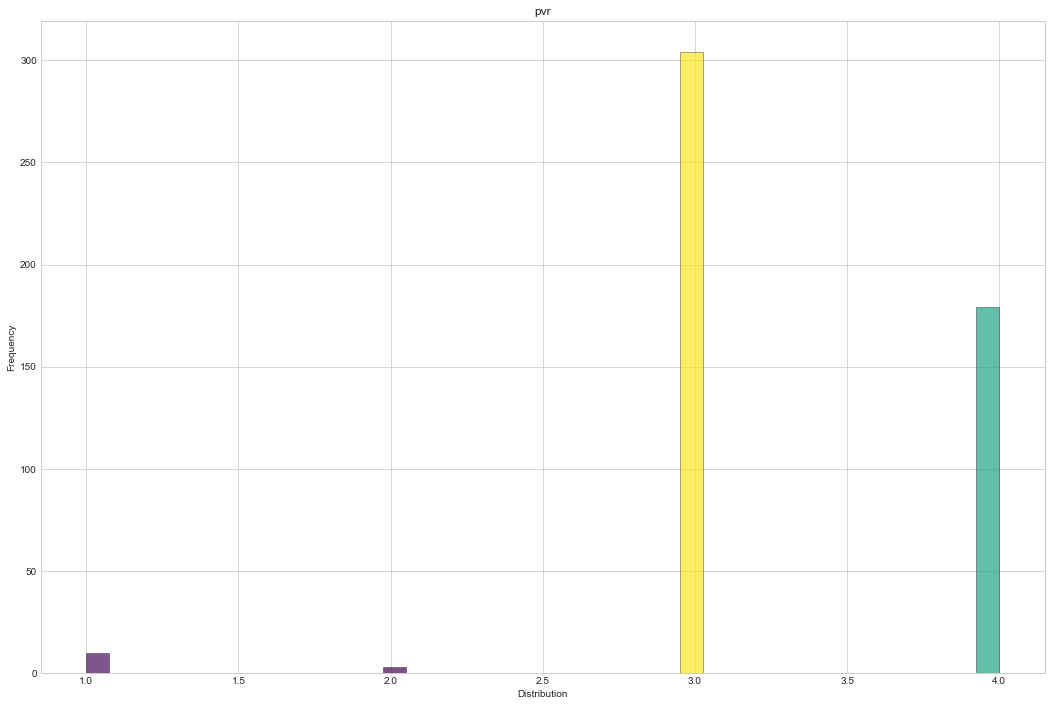

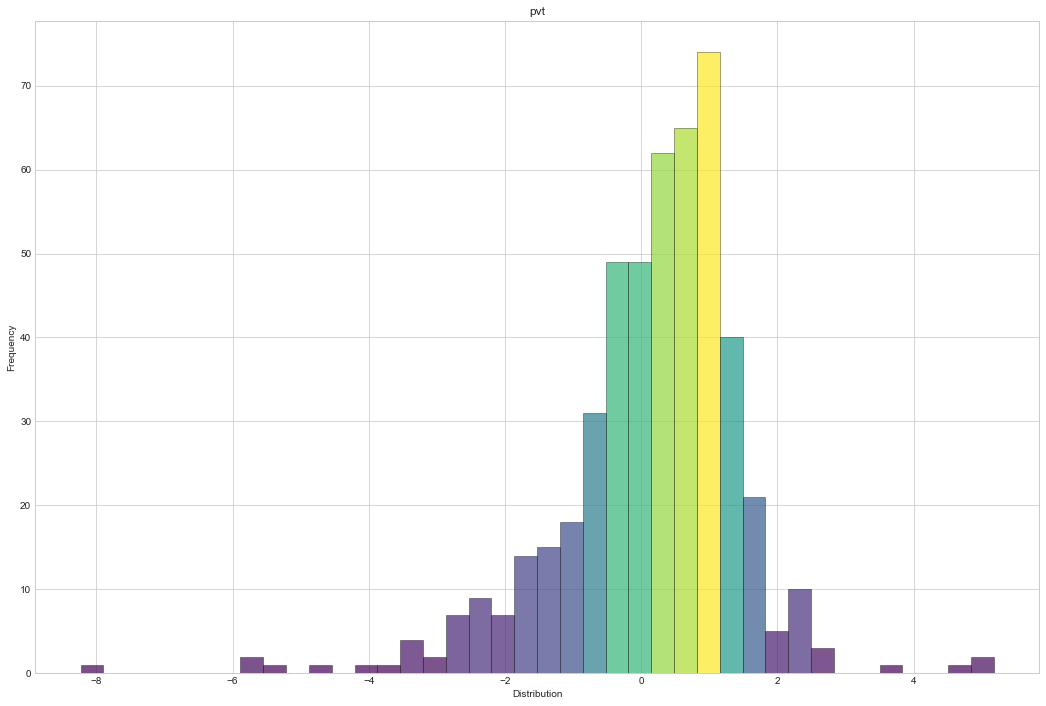

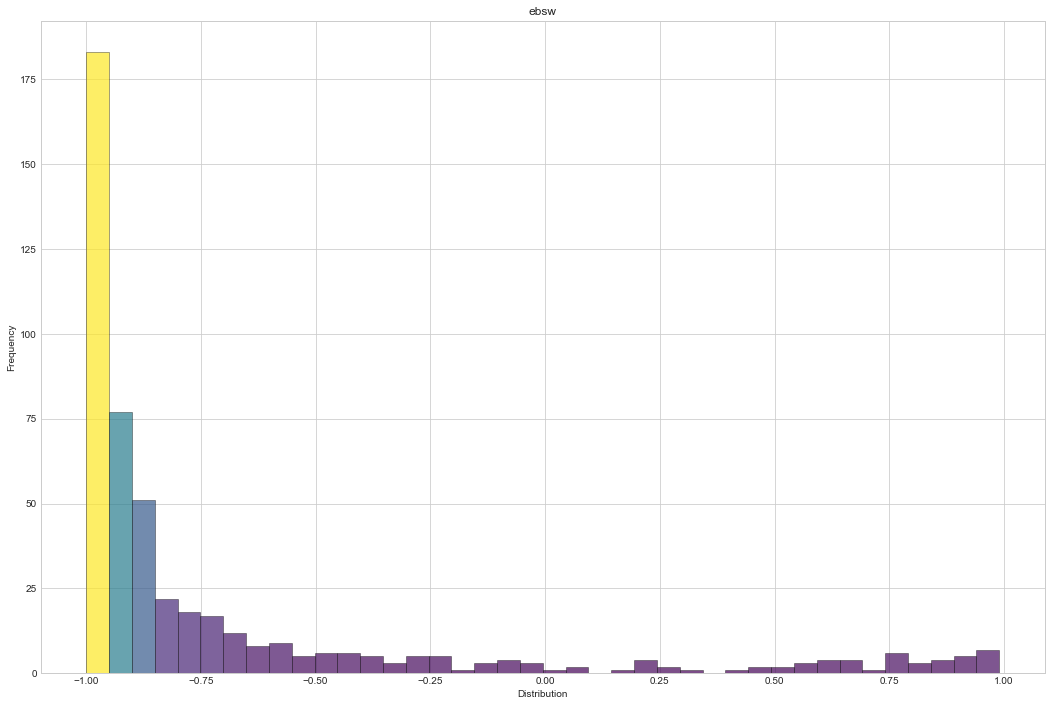

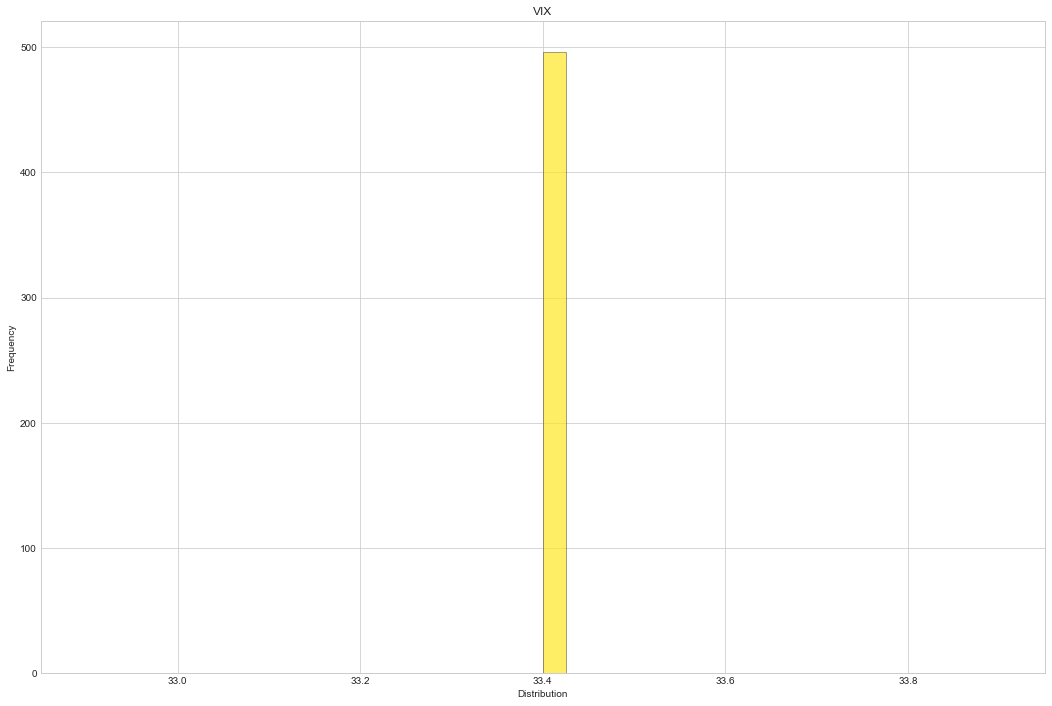

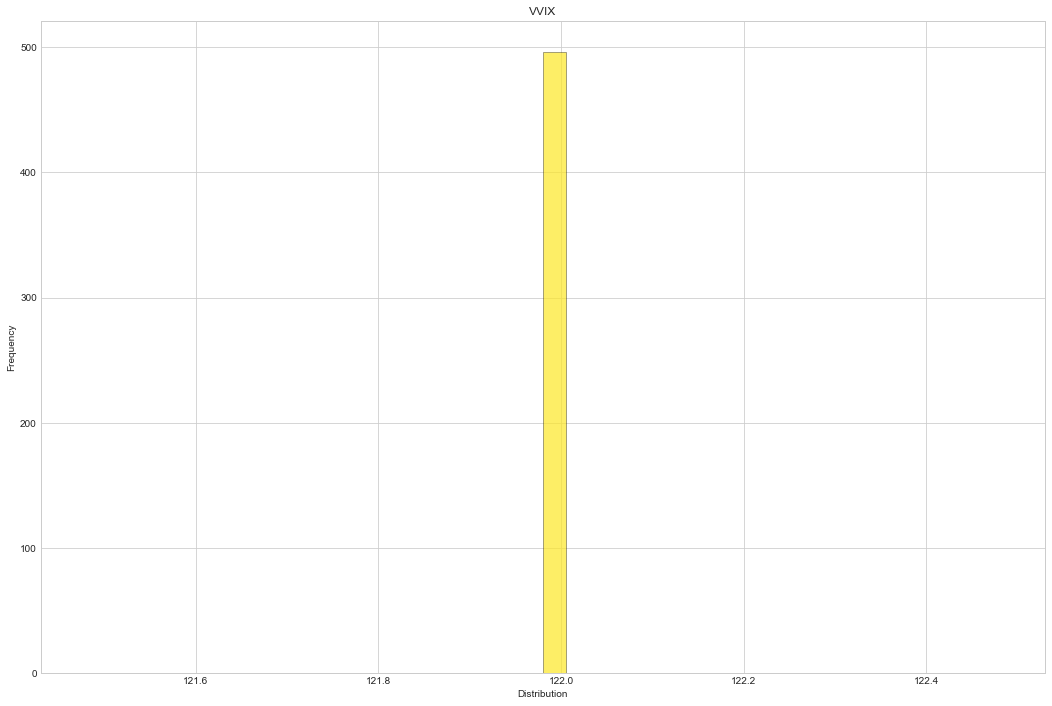

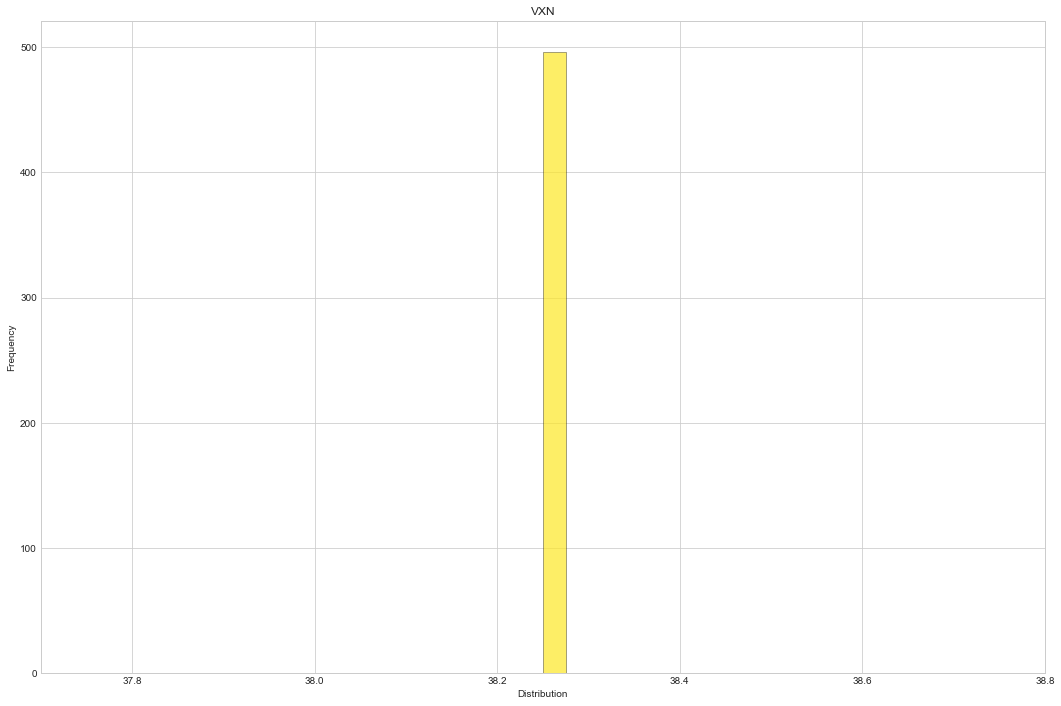

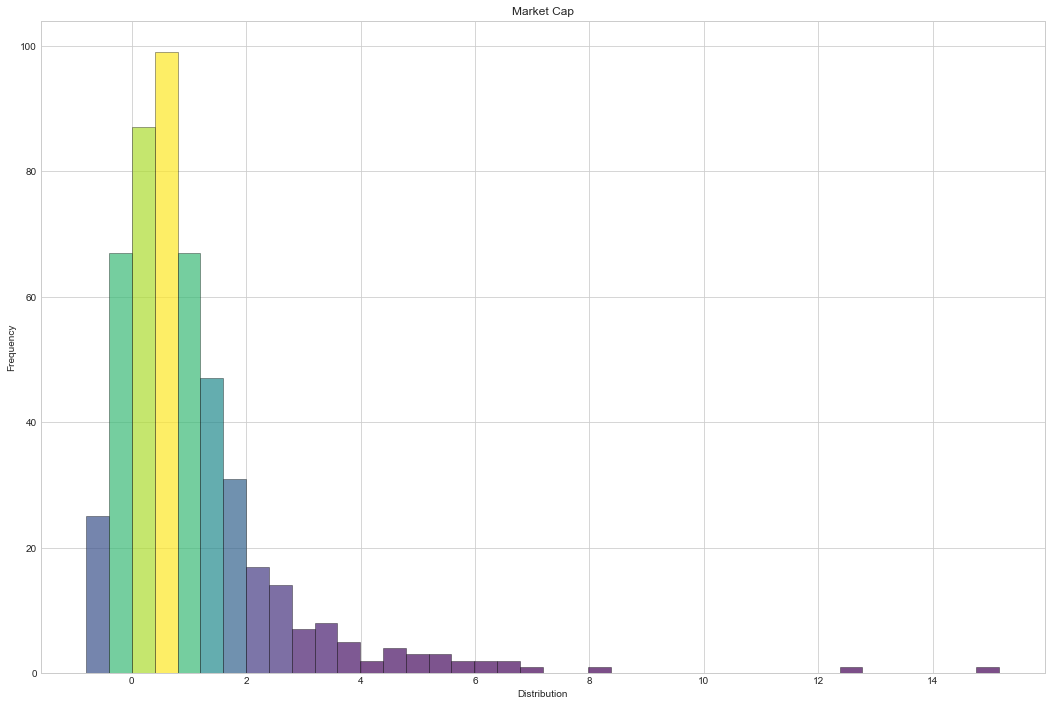

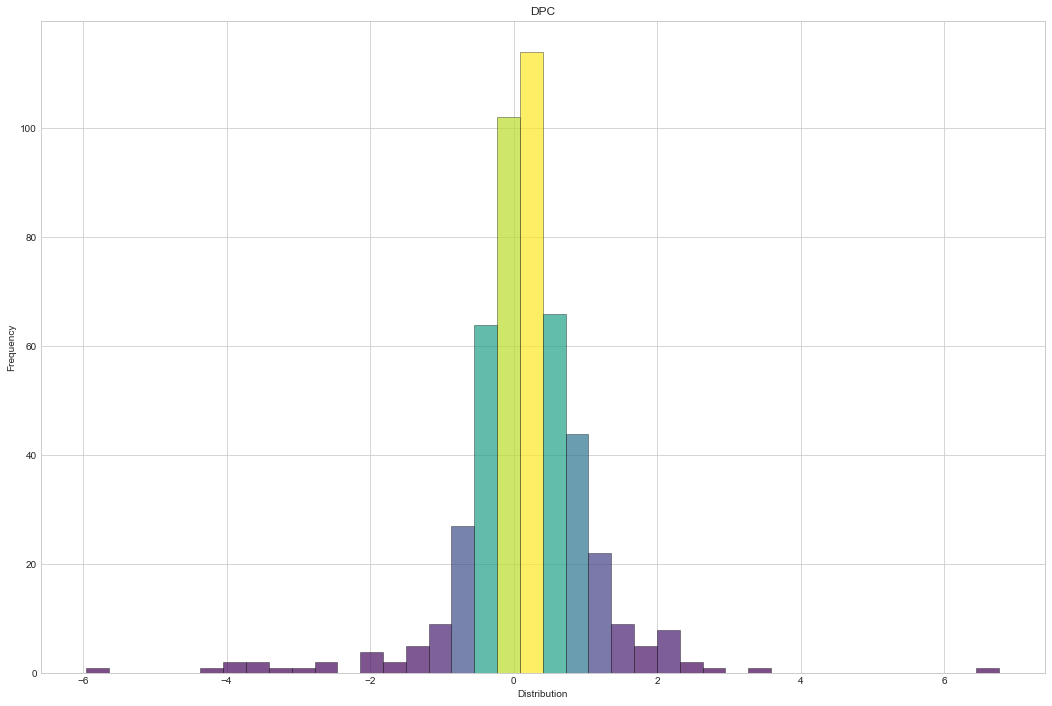

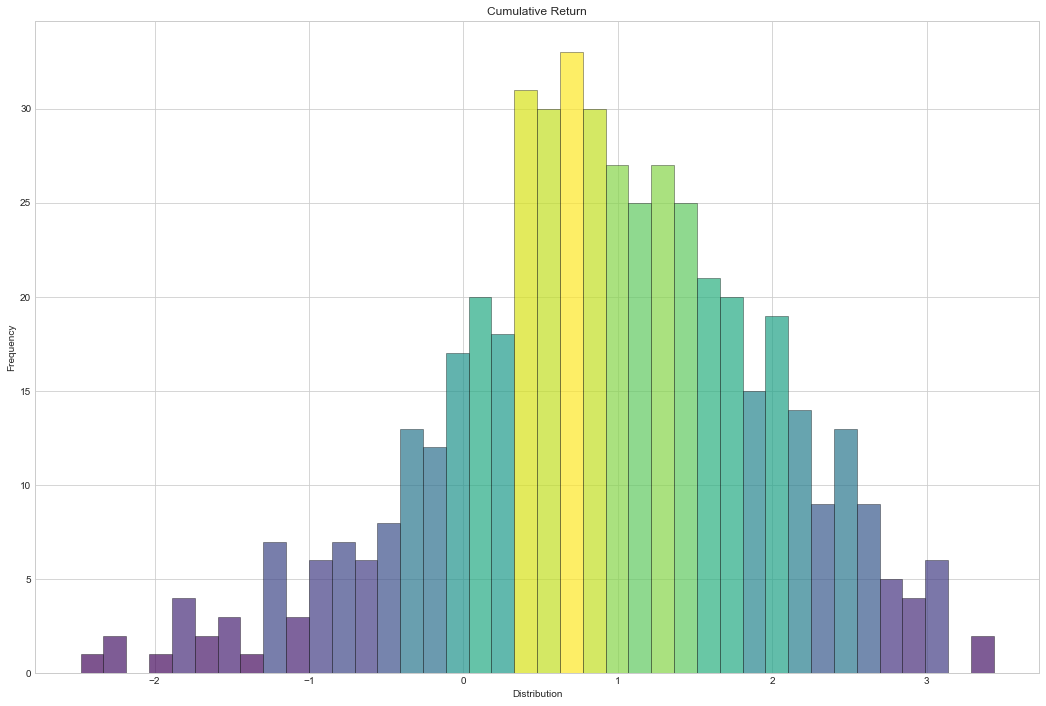

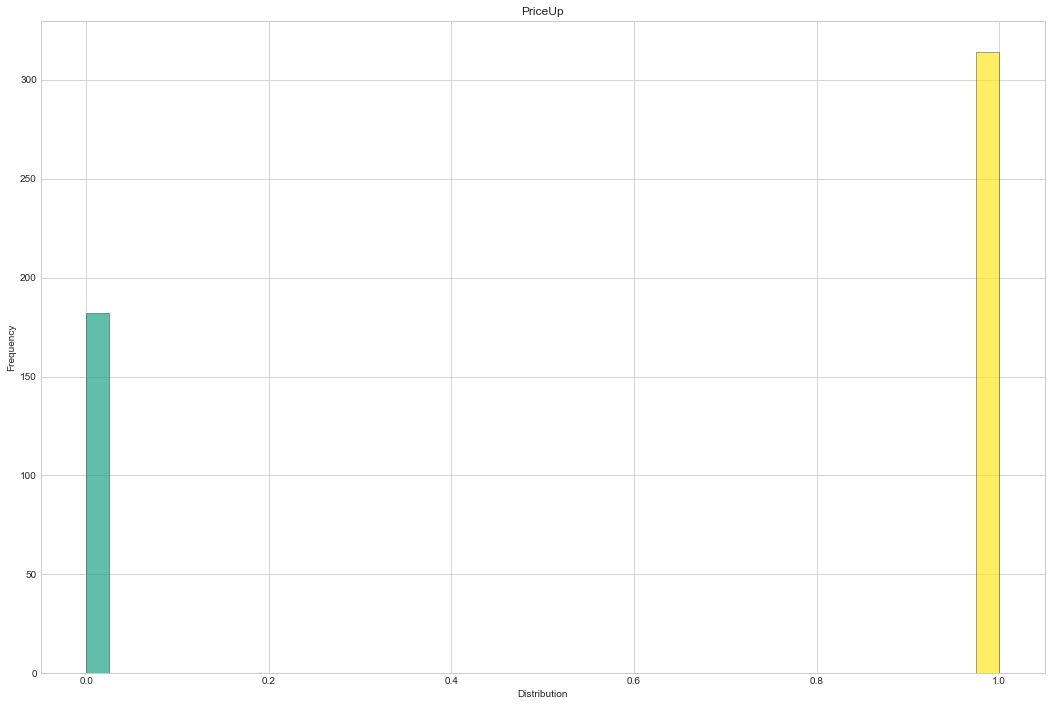

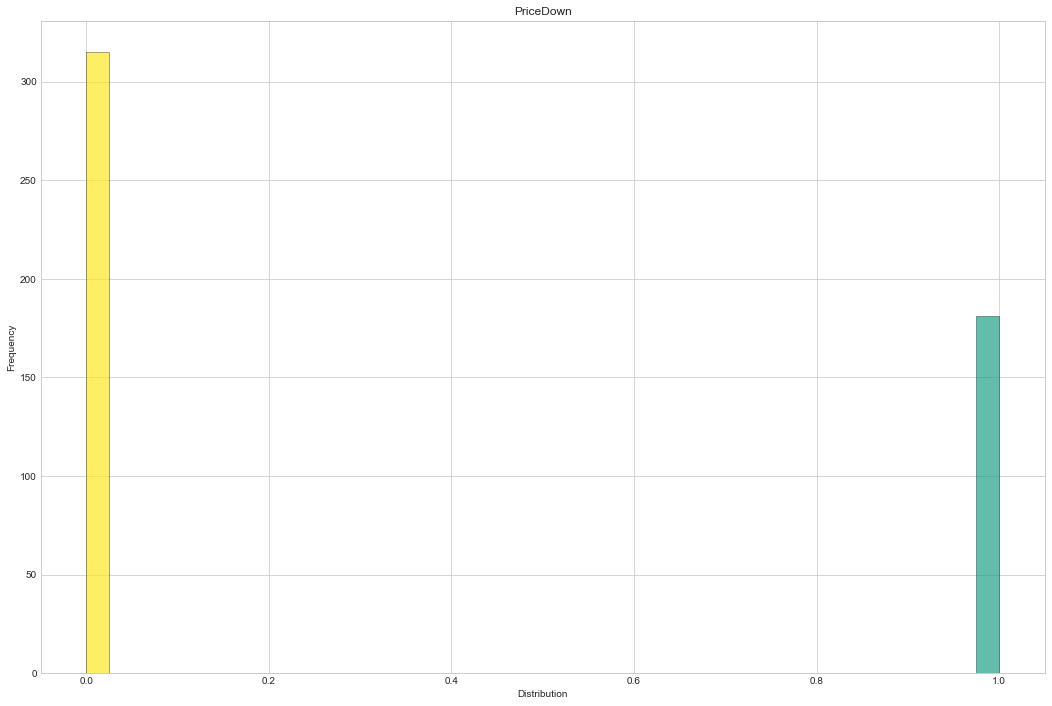

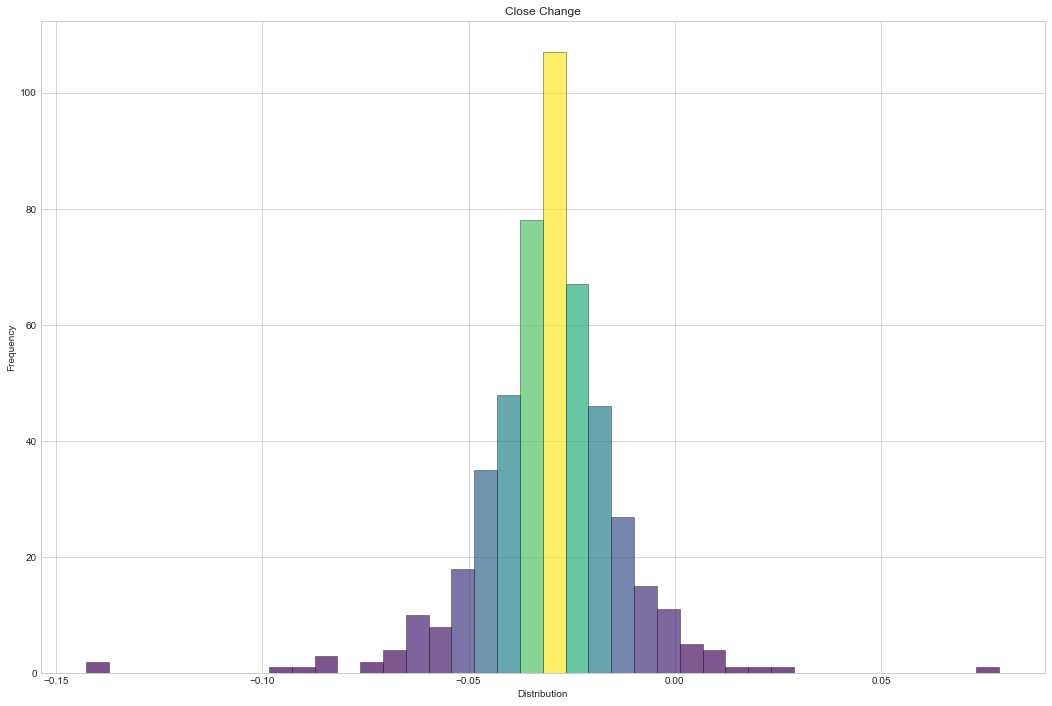

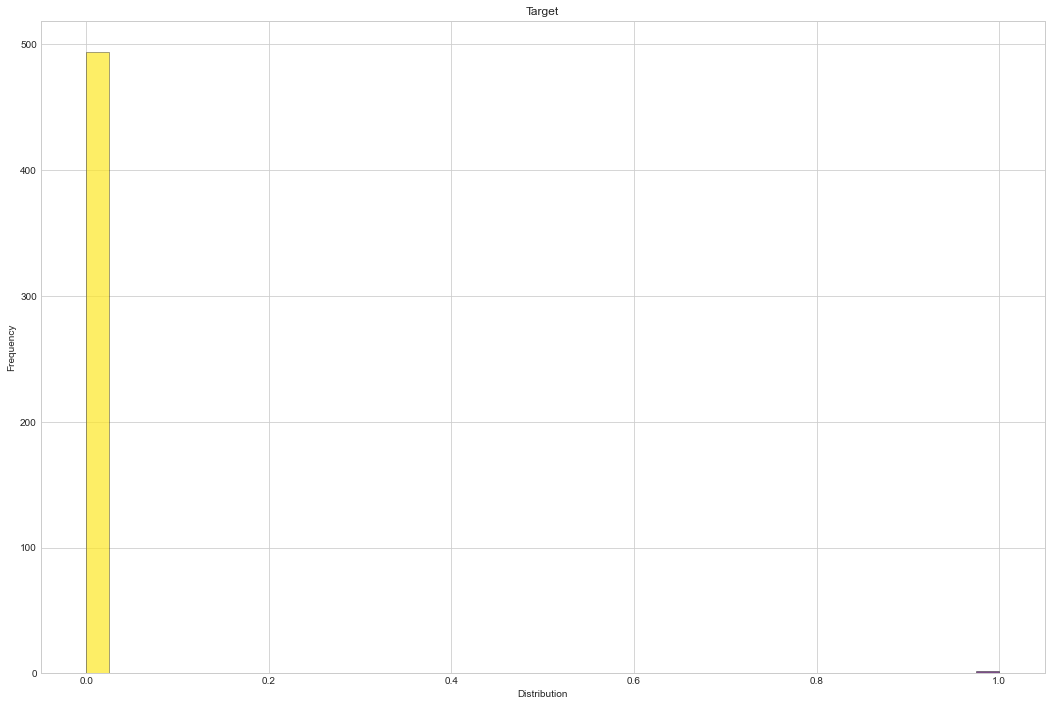

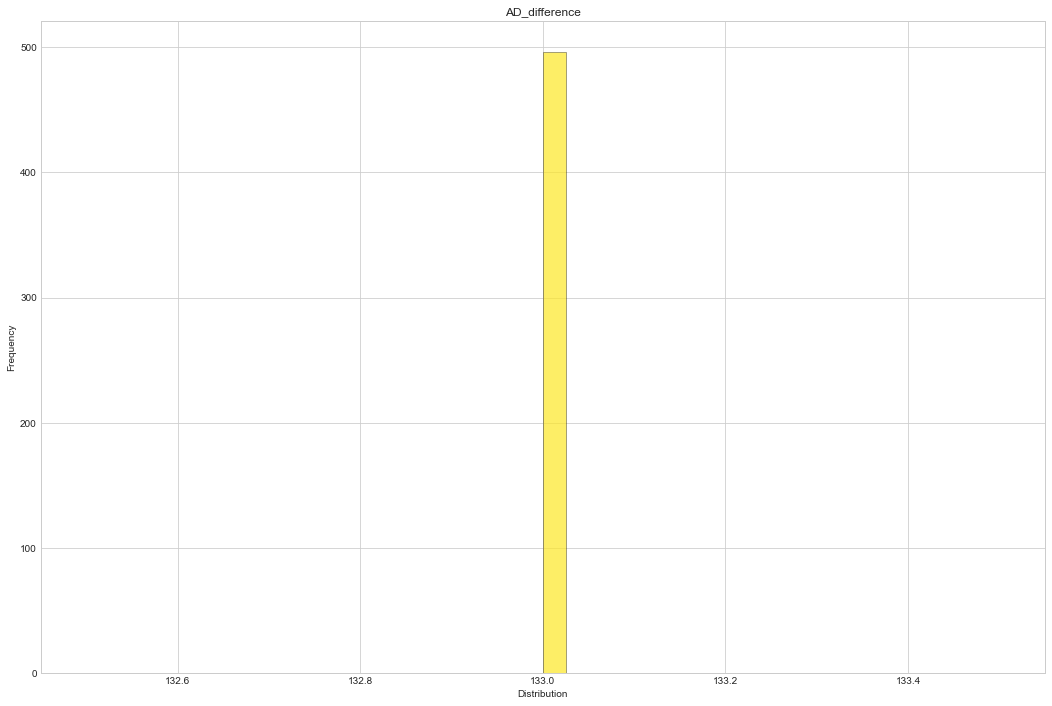

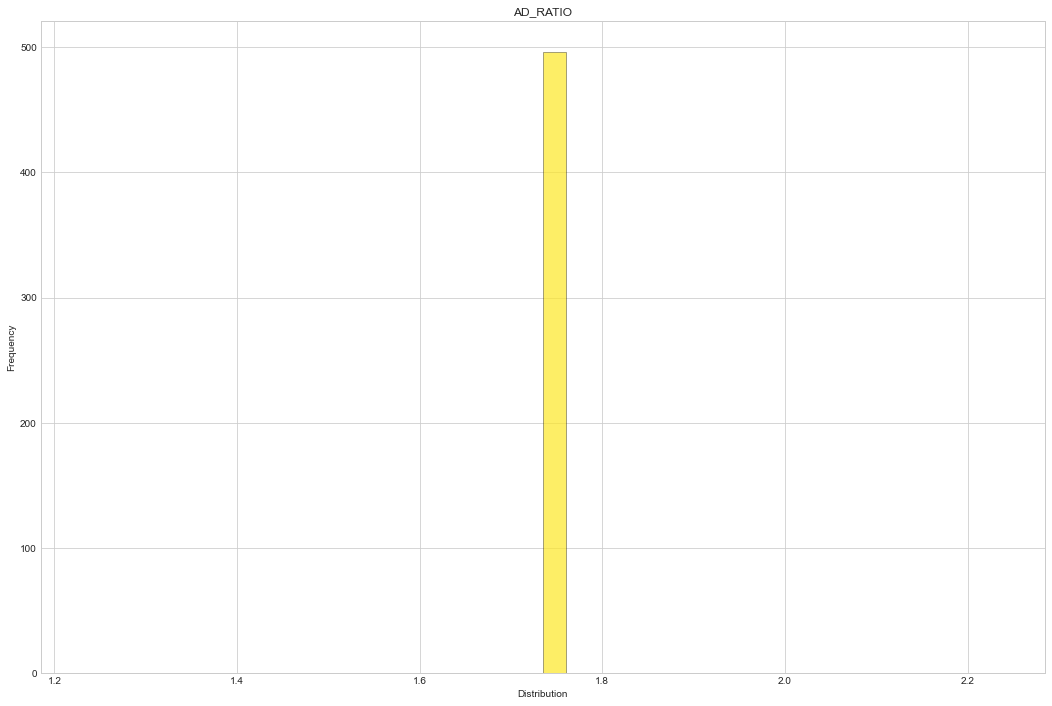

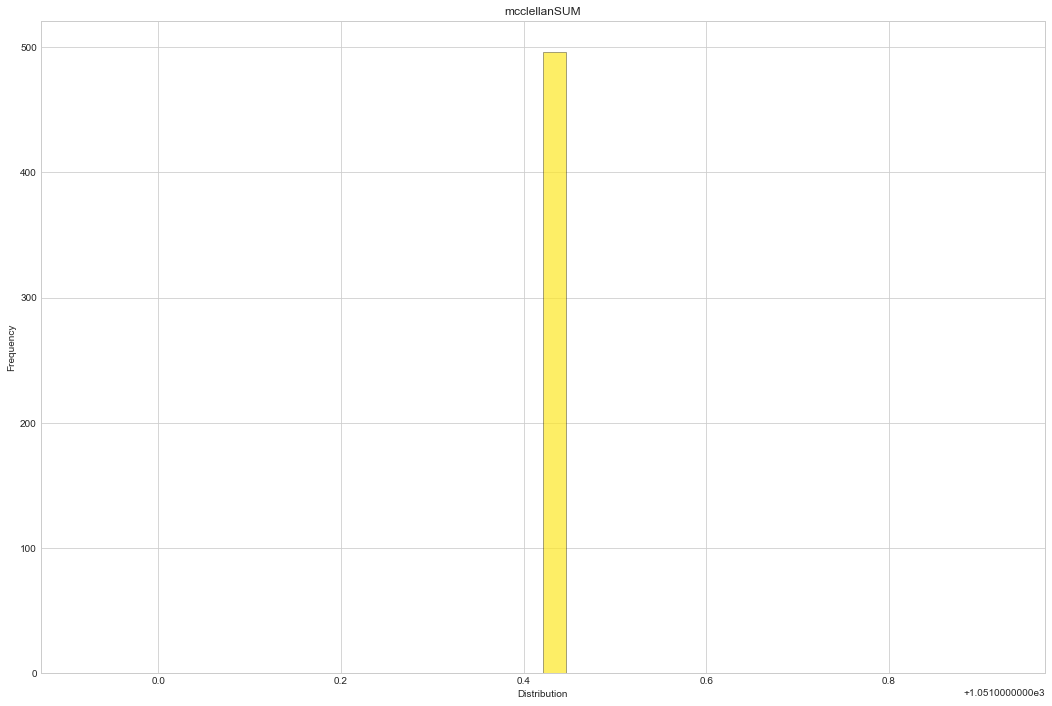

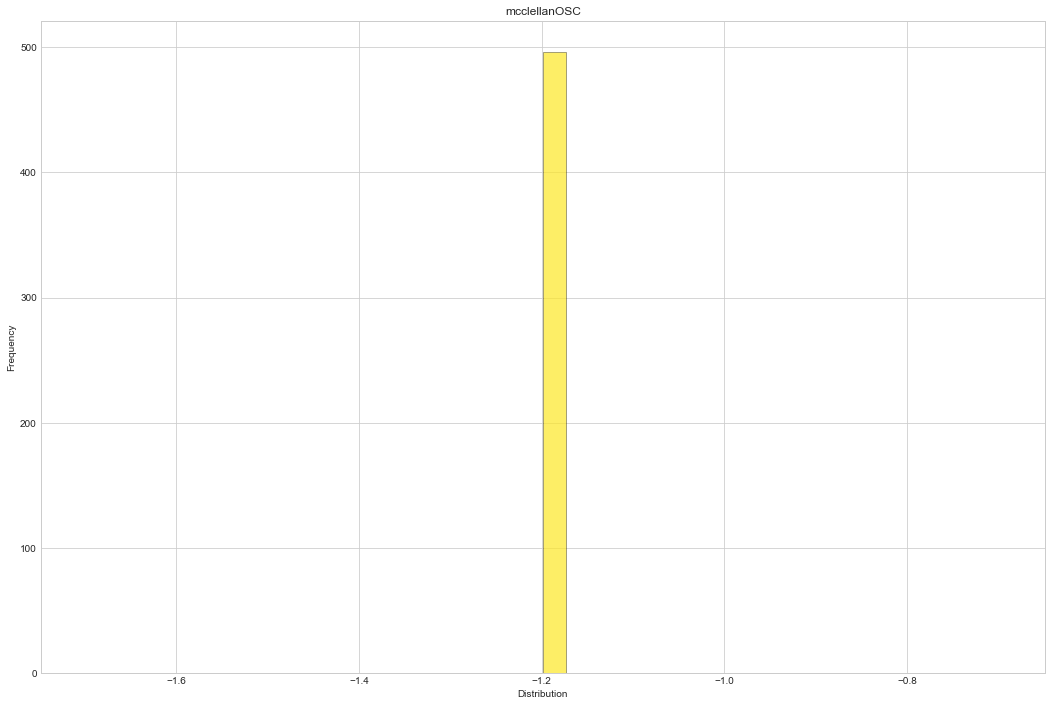

In [28]:
cols = df.columns
for col in cols:
    if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
        plt.figure(figsize=(18,12)) 
        plt.style.use('seaborn-whitegrid')
        n, bins, patches = plt.hist(df[f'{col}'], bins=40, facecolor='#000000', edgecolor='#000000', linewidth=0.5, alpha=0.7)
        n = n.astype('int')
        for i in range(len(patches)):
            patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))    

        plt.title(f'{col}', fontsize=12)
        plt.xlabel('Distribution', fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        plt.show()

## a 3 colored graph representing 3 differently valued days to compare the variance

Unnamed: 0


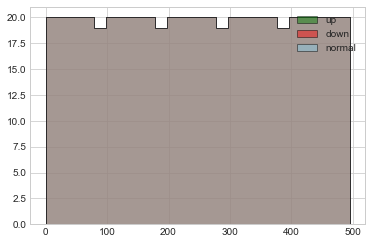

Open


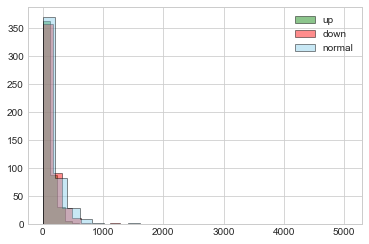

High


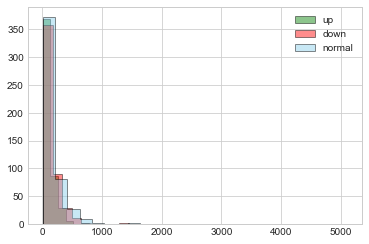

Low


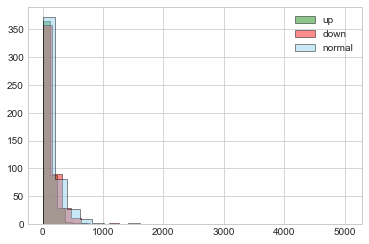

Close


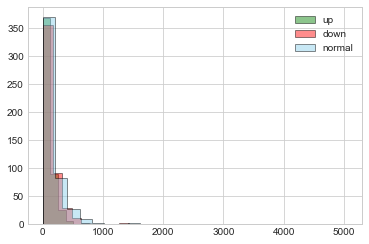

Volume


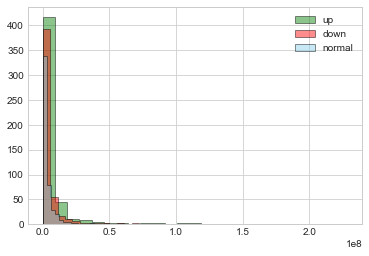

Dividends


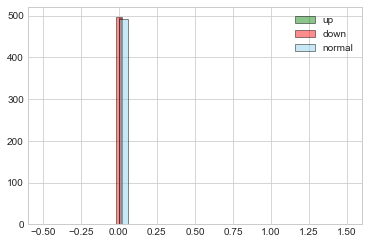

ma50


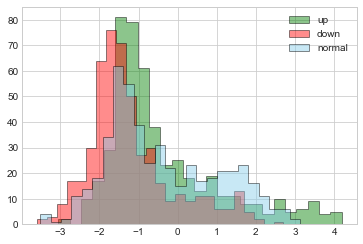

ma200


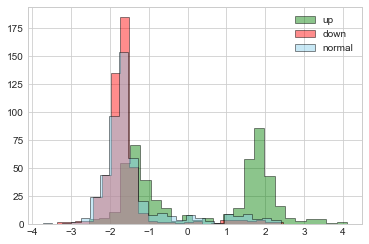

ADX


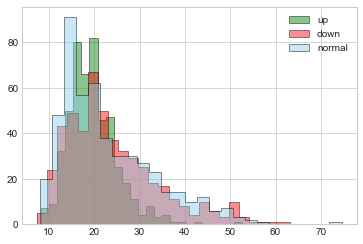

ADXR


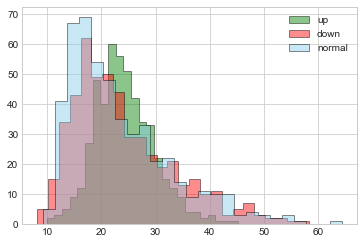

AROONOSC


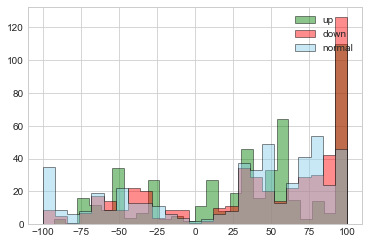

DX


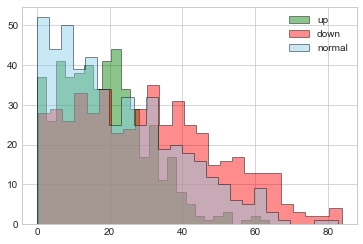

PPO


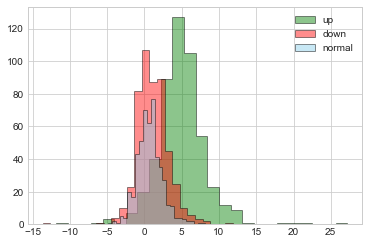

stochK


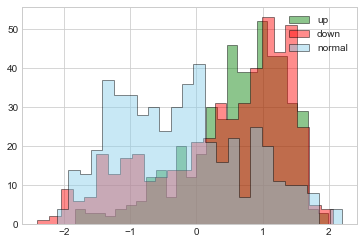

stochD


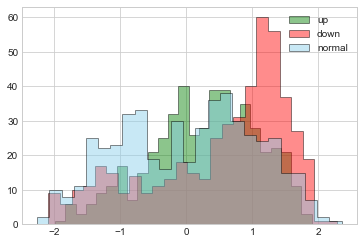

TRIX


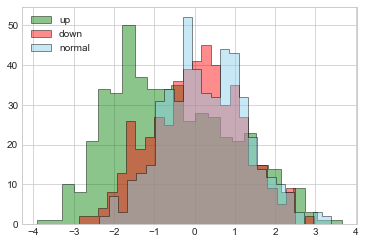

ULTOSC


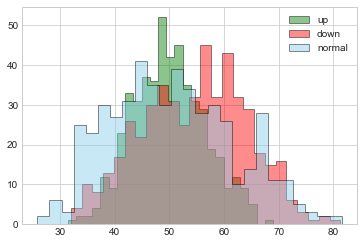

MACD


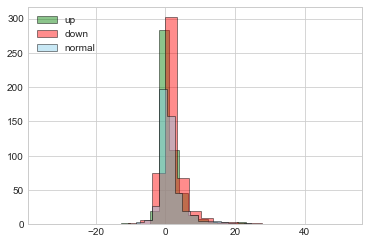

MACDSIG


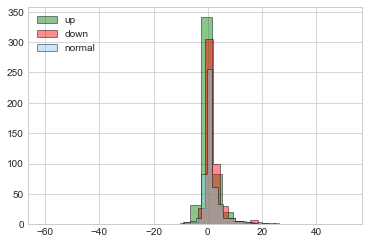

 MACDHIST


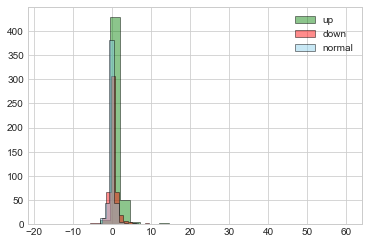

TRANGE


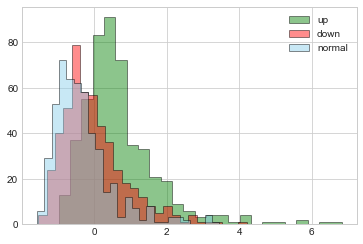

BBupperband


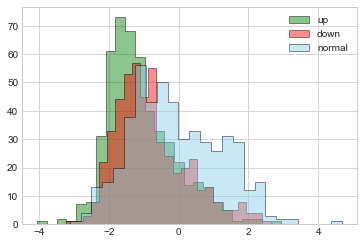

BBmiddleband


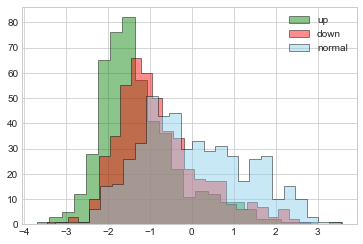

BBlowerband


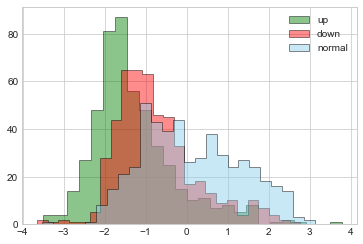

ao


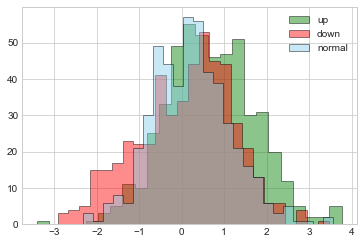

apo


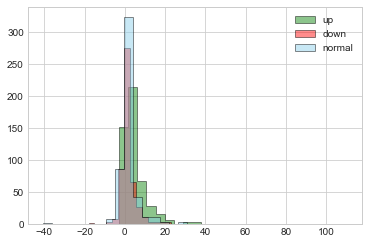

bias


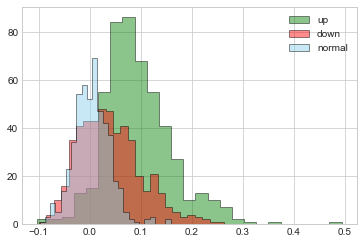

bop


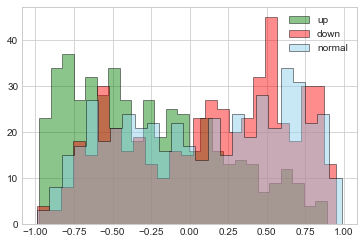

cci


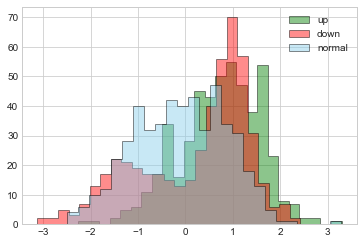

cfo


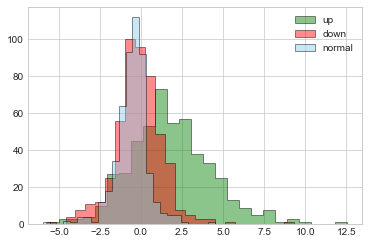

cmo


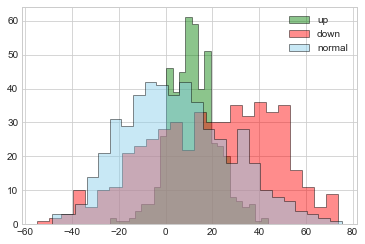

coppock


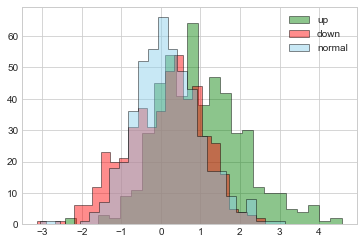

cti


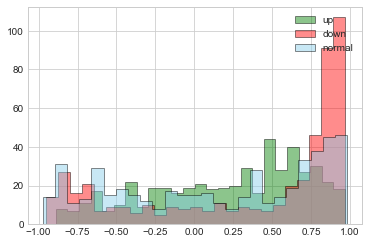

inertia


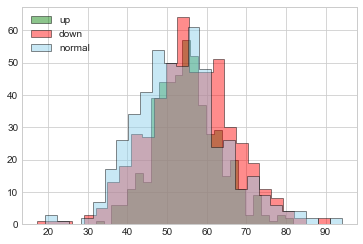

mom


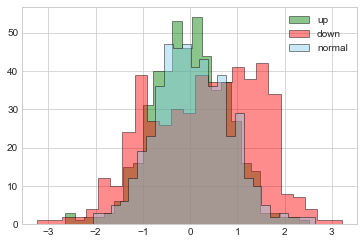

pgo


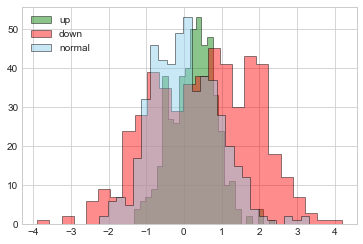

psl


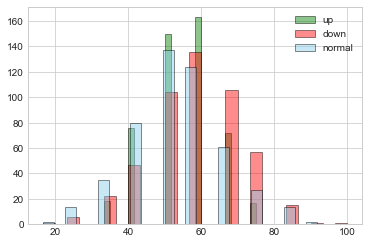

roc


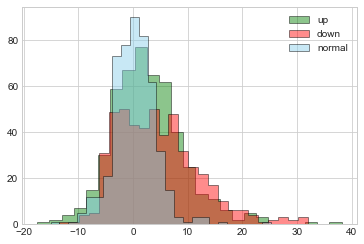

rsi


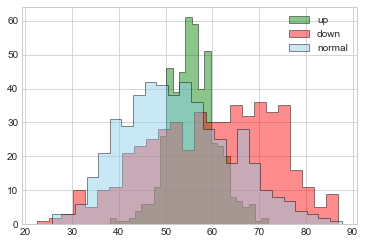

rsx


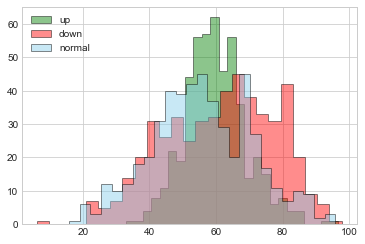

willr


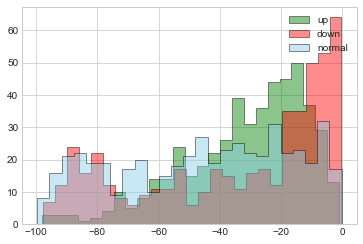

alma


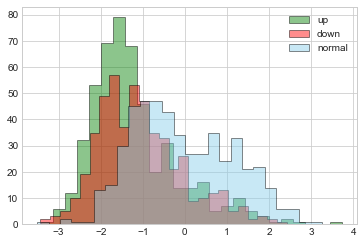

dema


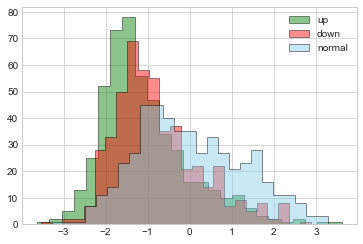

wma


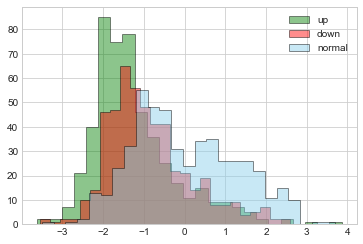

fwma


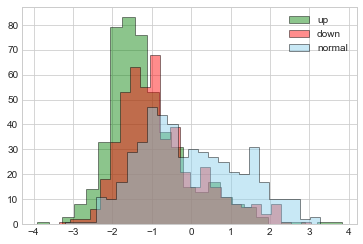

hma


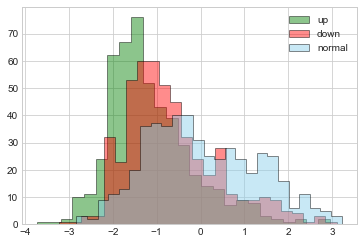

hwma


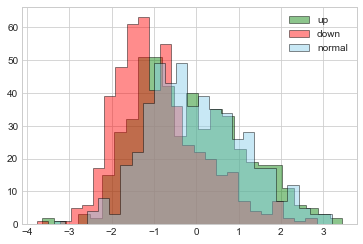

jma


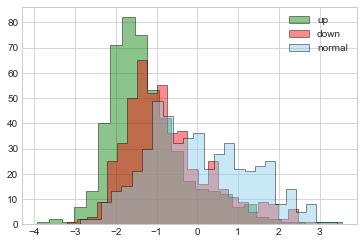

kama


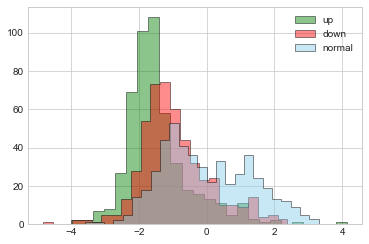

mcgd


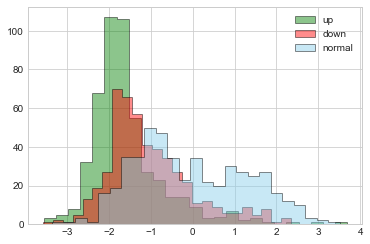

pwma


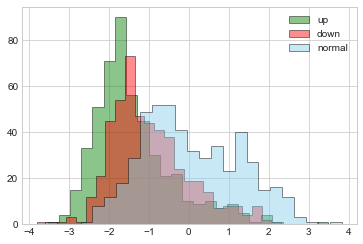

sinwma


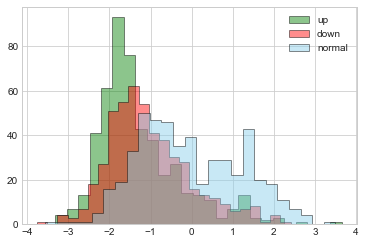

swma


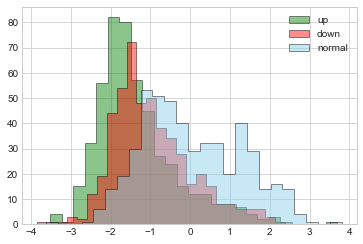

t3


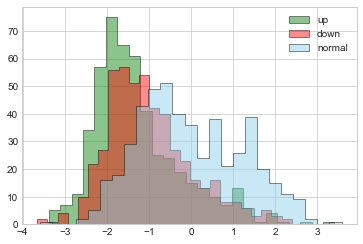

tema


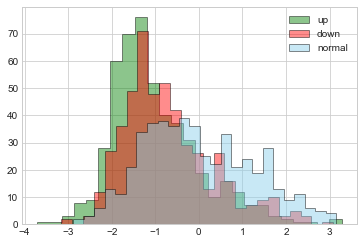

trima


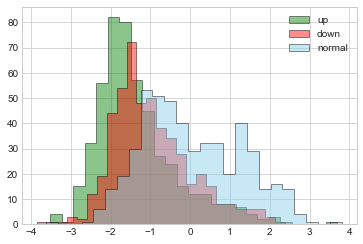

vidya


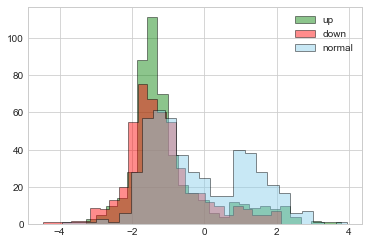

vwma


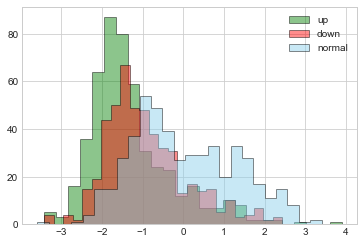

zlma


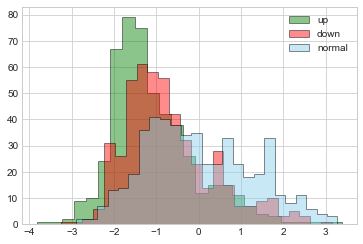

chop


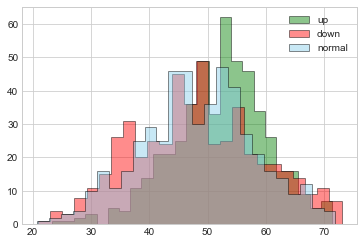

increasing


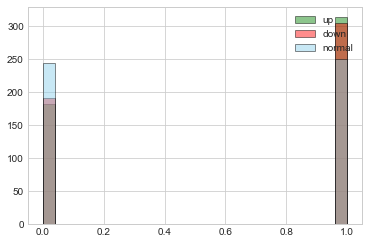

decreasing


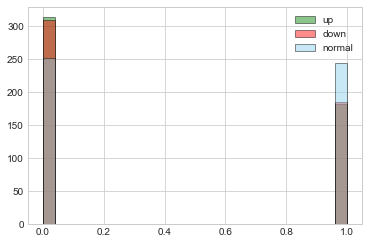

qstick


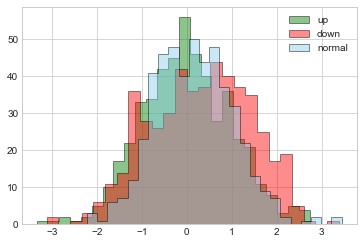

vhf


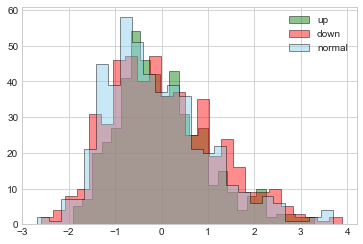

atr


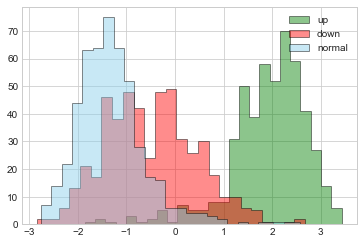

massi


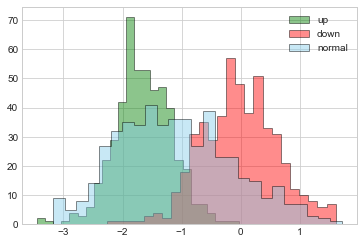

pdist


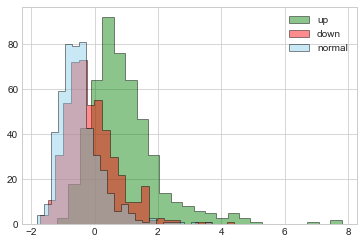

rvi


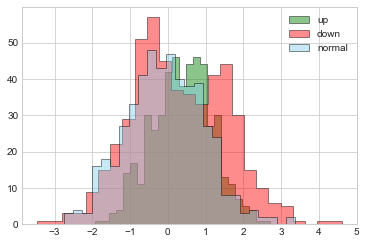

ui


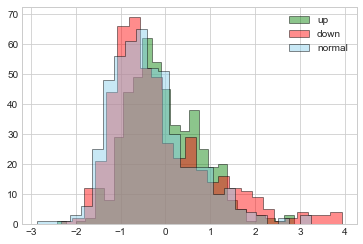

ad


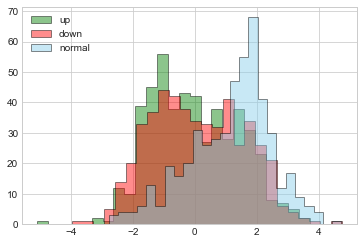

adosc


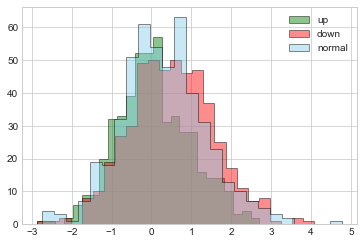

cmf


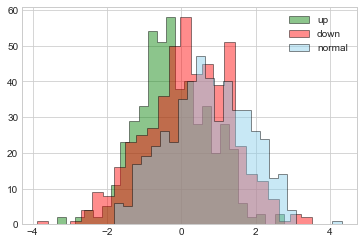

efi


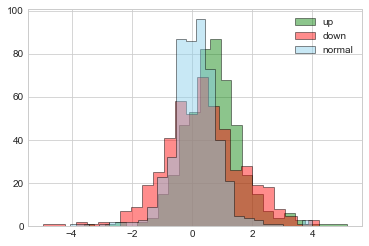

mfi


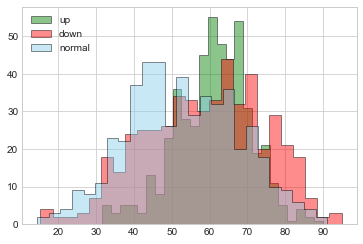

obv


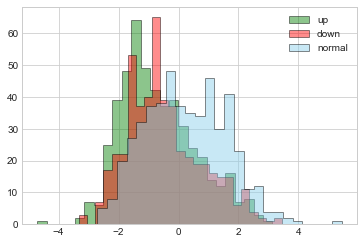

pvr


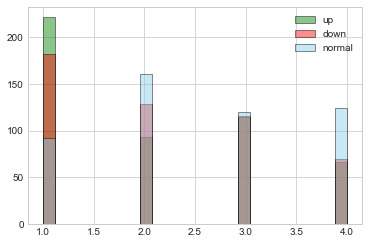

pvt


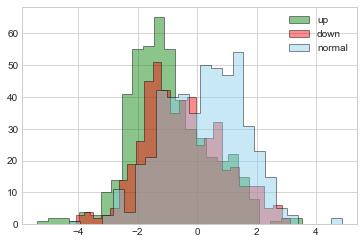

ebsw


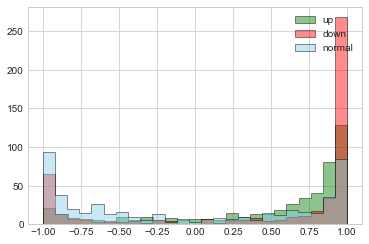

VIX


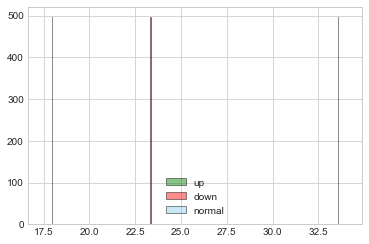

VVIX


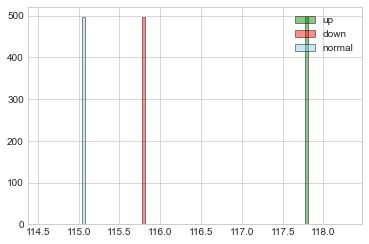

VXN


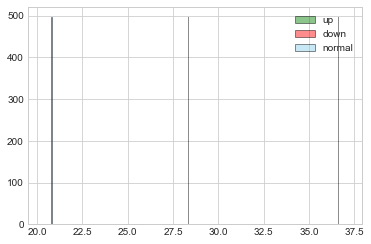

Market Cap


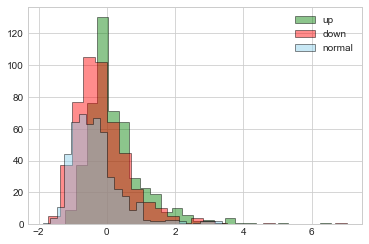

DPC


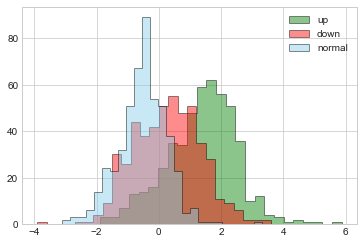

Cumulative Return


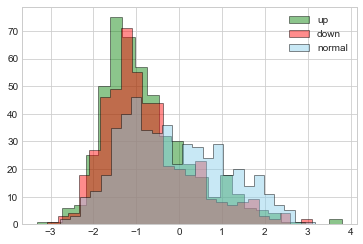

PriceUp


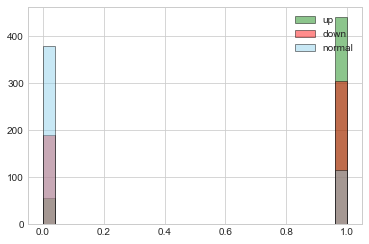

PriceDown


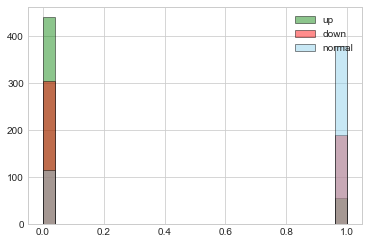

Close Change


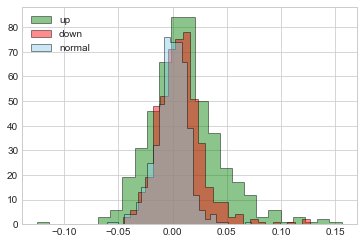

Target


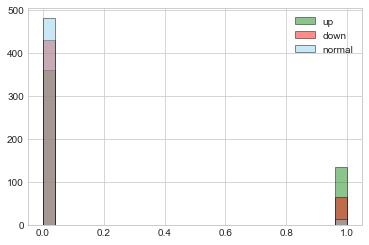

AD_difference


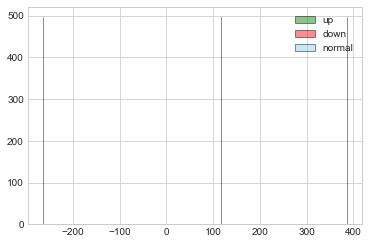

AD_RATIO


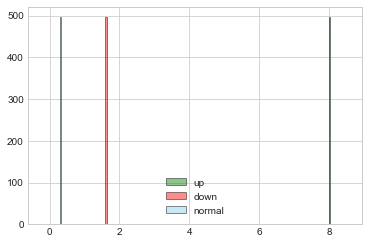

mcclellanSUM


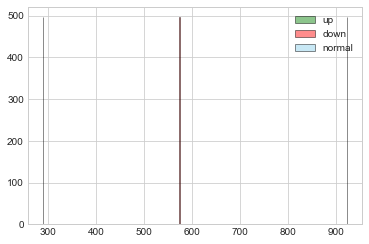

mcclellanOSC


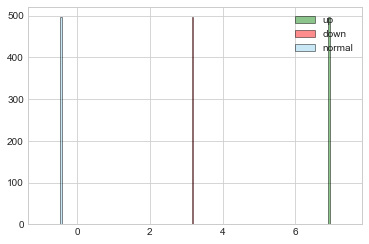

In [10]:
up_trend_df = pd.read_csv('./data/dates/2020-04-28.csv')
down_trend_df = pd.read_csv('./data/dates/2021-01-12.csv')
bearly_changed_df = pd.read_csv('./data/dates/2021-09-08.csv')
cols = up_trend_df.columns
cols = cols[:155]
for col in cols:
    if "CDL" not in col and "Date" not in col and "ticker" not in col:
        print(col)
        kwargs = dict(histtype='stepfilled', alpha=0.45, bins=25, lw = 1,edgecolor='k')
        plt.hist(up_trend_df[col], **kwargs, color = "green", label = "up")
        plt.hist(down_trend_df[col], **kwargs, color = "red", label = "down")
        plt.hist(bearly_changed_df[col], **kwargs, color = "skyblue", label = "normal")
        plt.legend()
        plt.show()

## compute the amound of outliers each column had in all the measured days

In [11]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

df = pd.read_csv('./data/dates/2021-02-04.csv')
cols = df.columns[:148]

dates_list,stocks_tickers = [],[]
d = {} 

for col in cols:
     if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
        d[col] = 0  
    
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        stocks_tickers.append(x)
        
with open('./data/dates.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        dates_list.append(x)
        
for date in dates_list:
    df = pd.read_csv(r'C:\Users\roeym\Desktop\data_backup\normaldist\dates_normdist_not_concatnated/'+ date + '.csv')
    for col in cols:
        if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
            d[col] += len(find_outliers_IQR(df[col]))

sorted_value_index = np.argsort(d.values())
dictionary_keys = list(d.keys())
sorted_dict = {dictionary_keys[i]: sorted(d.values())[i] for i in range(len(dictionary_keys))}

for key, value in sorted_dict.items():
    print(key, ':', value)



Open : 0
High : 0
Low : 0
Close : 915
Volume : 1604
Dividends : 1791
ma50 : 2323
ma200 : 2325
ADX : 2414
ADXR : 2414
AROONOSC : 2456
DX : 2492
PPO : 2571
stochK : 2715
stochD : 2802
TRIX : 3445
ULTOSC : 3463
MACD : 3946
MACDSIG : 3974
 MACDHIST : 4281
TRANGE : 4611
BBupperband : 4864
BBmiddleband : 5332
BBlowerband : 5710
ao : 5993
apo : 6112
bias : 6470
bop : 6646
cci : 6686
cfo : 7136
cmo : 7261
coppock : 7311
cti : 7374
inertia : 8148
mom : 8440
pgo : 8709
psl : 9145
roc : 9429
rsi : 9710
rsx : 9720
willr : 10000
alma : 10055
dema : 10099
wma : 10159
fwma : 10207
hma : 10249
hwma : 10288
jma : 10308
kama : 10322
mcgd : 10335
pwma : 10342
sinwma : 10383
swma : 10383
t3 : 10384
tema : 10414
trima : 10471
vidya : 11021
vwma : 11293
zlma : 11448
chop : 11558
increasing : 11617
decreasing : 11732
qstick : 11998
vhf : 12465
atr : 13078
massi : 13176
pdist : 14110
rvi : 14203
ui : 14411
ad : 16538
adosc : 17480
cmf : 17801
efi : 18597
mfi : 21446
obv : 21499
pvr : 24428
pvt : 24473
ebsw : 

## creates a bar graph of those values

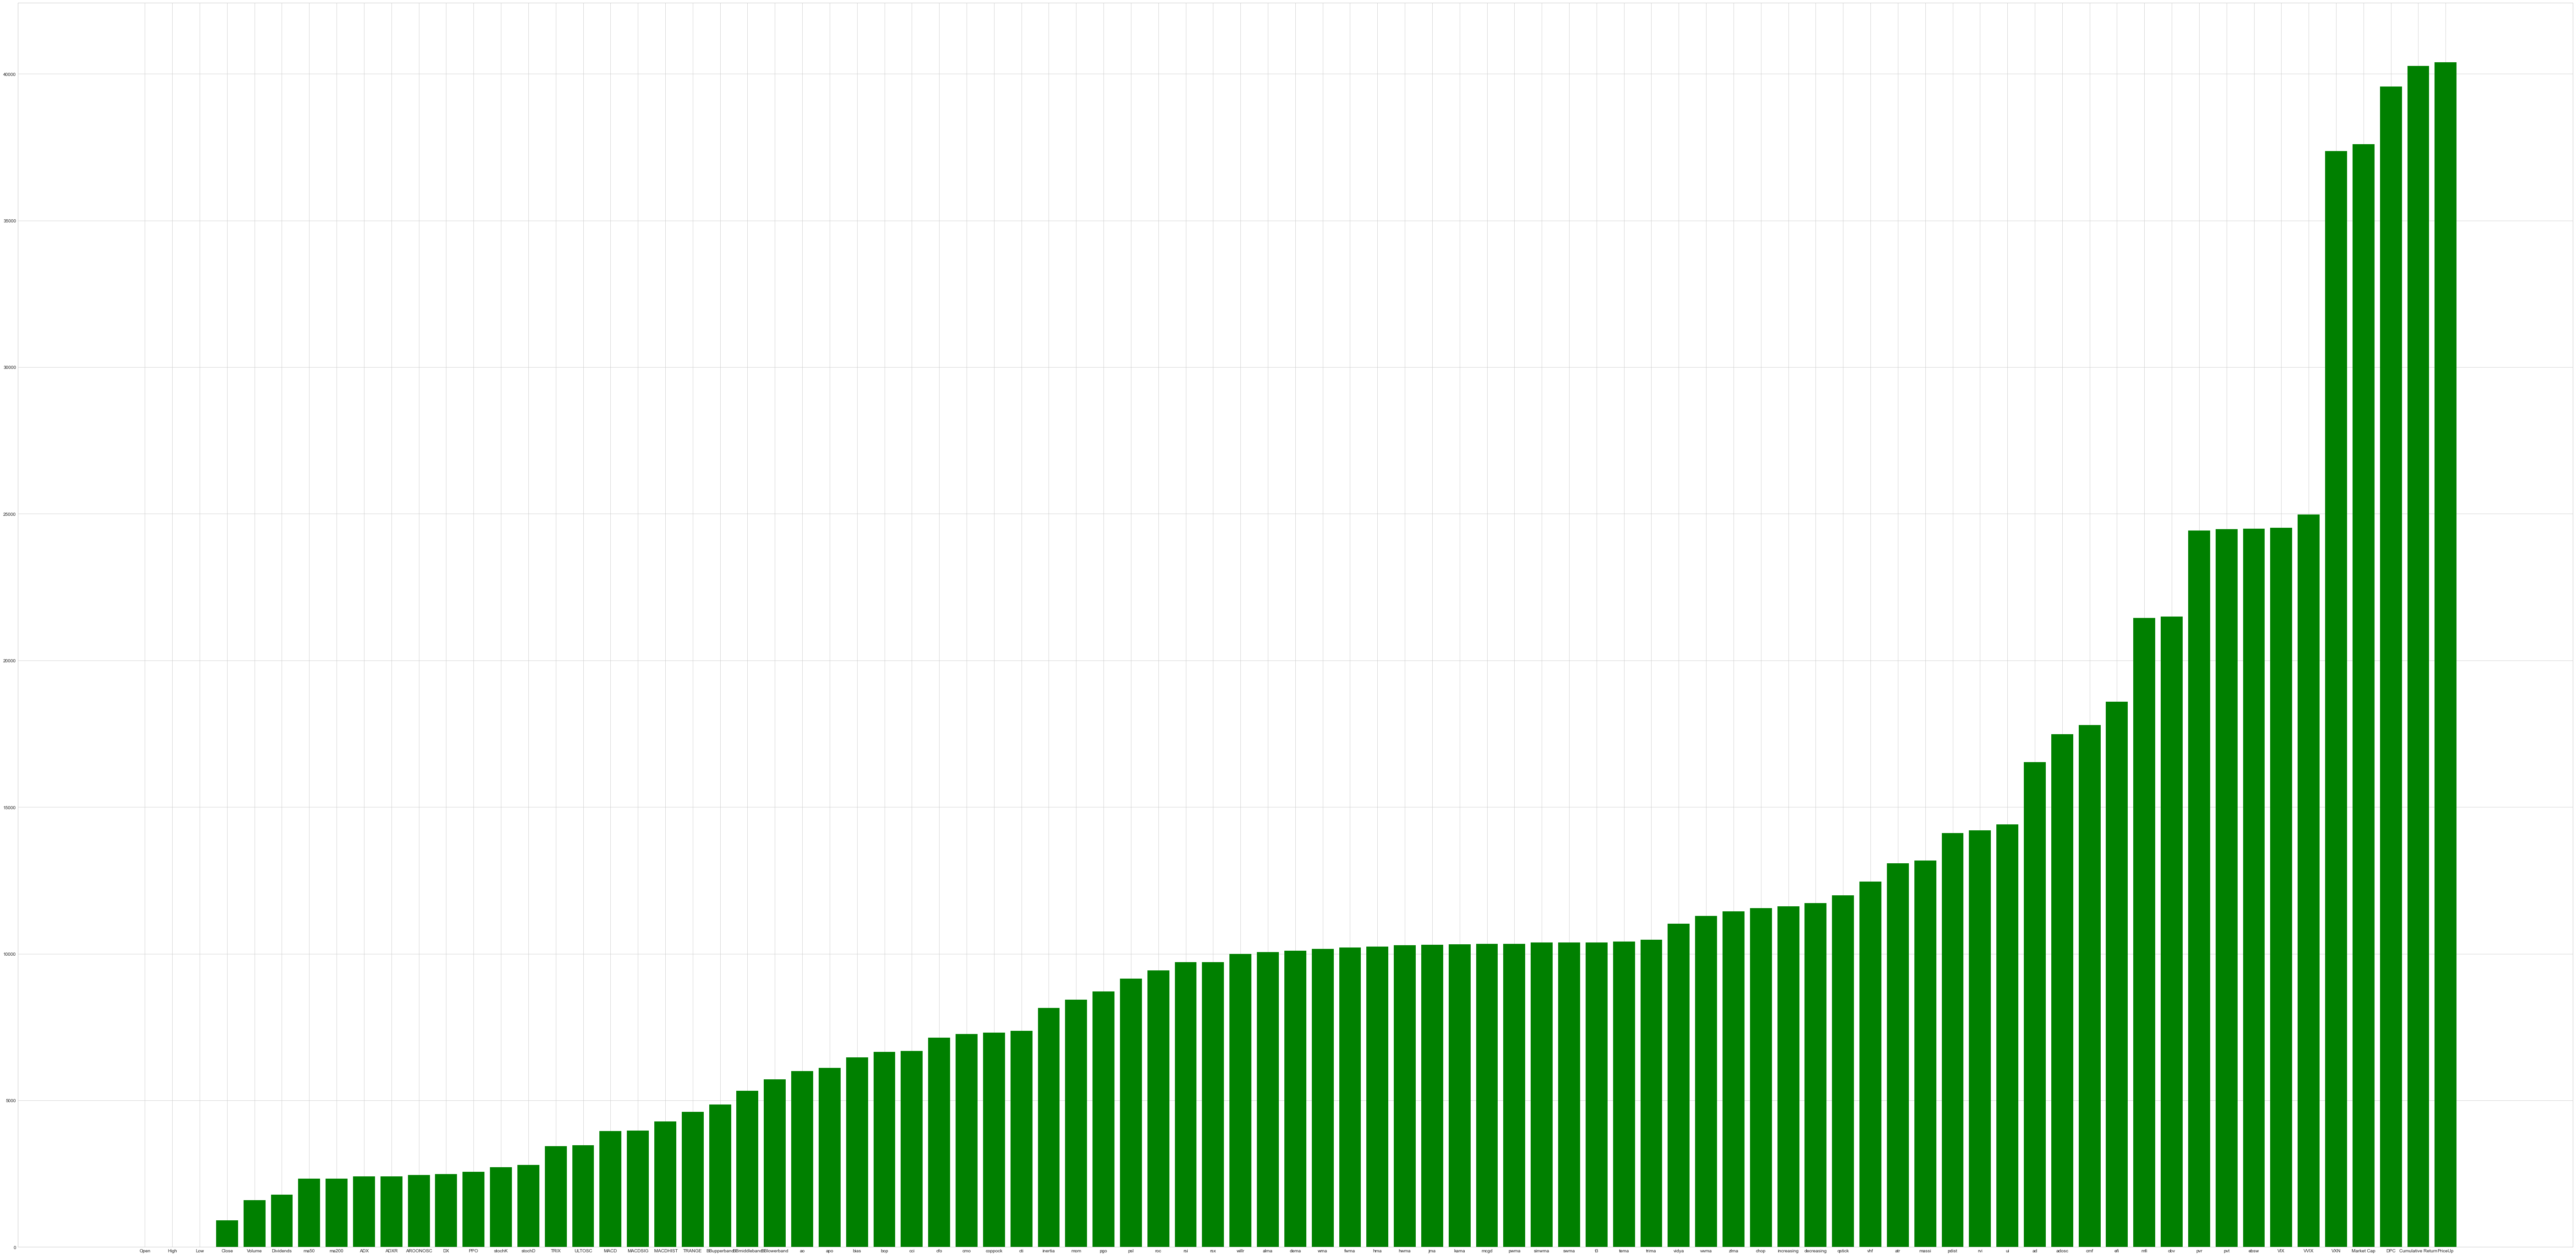

In [26]:
plt.bar(sorted_dict.keys(), sorted_dict.values(), color='g')
plt.rcParams["figure.figsize"] = (120,40)
plt.savefig('graph1.png')

## calculate the amount of errors for each ticker

In [13]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

df = pd.read_csv('./data/dates/2021-02-04.csv')
cols = df.columns[:148]

dates_list,stocks_tickers = [],[]
error_per_stock = {} 
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        stocks_tickers.append(x)
        
for ticker in stocks_tickers:
    error_per_stock[ticker] = 0  
    

with open('./data/dates.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        dates_list.append(x)
        
for date in dates_list:
    df = pd.read_csv(r'C:\Users\roeym\Desktop\data_backup\normaldist\dates_normdist_not_concatnated/'+ date + '.csv')
    for col in cols:
        if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
            outs = find_outliers_IQR(df[col]).axes
            ticks = df.iloc[outs[0]]['ticker'].tolist()
            for tick in ticks:
                error_per_stock[tick] = error_per_stock[tick] + 1 

            

for key, value in error_per_stock.items():
    print(key, ':', value)

AAPL : 1892
MSFT : 1715
AMZN : 2283
TSLA : 4260
META : 2745
UNH : 2269
V : 849
NVDA : 2687
JNJ : 927
WMT : 1532
XOM : 1653
JPM : 914
PG : 788
MA : 2113
HD : 1391
CVX : 1208
LLY : 2476
BAC : 999
KO : 1116
PFE : 2431
ABBV : 1174
PEP : 466
COST : 3577
TMO : 5420
MRK : 3278
DIS : 1925
AVGO : 3734
DHR : 1258
ACN : 791
ORCL : 1309
ADBE : 5727
ABT : 739
MCD : 669
CSCO : 1513
VZ : 4560
CRM : 2066
NKE : 830
TMUS : 1093
UPS : 1609
CMCSA : 1291
NEE : 754
WFC : 1305
QCOM : 1429
TXN : 469
AMD : 2358
BMY : 1847
PM : 1124
MS : 703
LIN : 712
UNP : 635
INTC : 5666
SCHW : 986
RTX : 519
CVS : 781
HON : 310
LOW : 1154
AMGN : 3313
INTU : 3612
T : 7238
SPGI : 2204
AMT : 2544
COP : 1176
MDT : 574
AXP : 473
IBM : 1024
GS : 1290
ELV : 2785
PYPL : 3292
LMT : 6018
BLK : 5492
DE : 1588
NFLX : 6712
ADP : 506
C : 1241
CAT : 800
SBUX : 687
BA : 8390
PLD : 462
NOW : 5583
EL : 984
AMAT : 1004
ADI : 568
MDLZ : 549
GE : 1223
CI : 1410
MMC : 335
DUK : 646
MMM : 866
BKNG : 6293
SYK : 607
SO : 532
TGT : 1822
ISRG : 1211
GI

### rereive the beta values of each stock in the S&P

In [14]:
import yfinance as yf
import numpy as np
stocks_betas = {}    
tickers = []
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        tickers.append(x)        
tickers.append('^GSPC') 
data = yf.download(tickers, period='5y', interval='1mo')['Adj Close'] 
data = data.dropna(how='all')

log_returns = np.log(data / data.shift())
cov = log_returns.cov()
var = log_returns['^GSPC'].var()
for tick in tickers:
    stocks_betas[tick] = cov.loc[tick, '^GSPC'] / var


[*********************100%***********************]  497 of 497 completed


In [15]:
from collections import defaultdict

dd = defaultdict(list)

for dt in (error_per_stock, stocks_betas): 
    for key, value in dt.items():
        dd[key].append(value)
        


# final resualt showing the amount of errors and the beta value side by side 

In [16]:
ds = {k: v for k, v in sorted(dd.items(), key=lambda item: item[1])}
for key, value in ds.items():
    print(key, ':', value)



^GSPC : [1.0000000000000004]
MET : [170, 1.0873575719390782]
EMR : [181, 1.4231731590620849]
AME : [185, 1.2125896730492915]
ETN : [194, 1.147188015910664]
AFL : [195, 0.9050259972478638]
PRU : [213, 1.4380551574064602]
DOV : [236, 1.3429849496512523]
TFC : [247, 1.1099605642149128]
APH : [249, 1.2415457834206314]
TEL : [255, 1.308951860605785]
CBRE : [256, 1.3978597073728802]
L : [265, 0.8797686853311227]
PFG : [278, 1.2958266601829707]
PAYX : [285, 0.9927334234389303]
FITB : [295, 1.350697437587921]
RJF : [300, 1.1079457416427467]
PNC : [309, 1.1693839902644936]
LNC : [309, 1.937184662176882]
HON : [310, 1.0956301313808368]
AIG : [316, 1.3495141381574365]
GPC : [321, 1.004537362736657]
CFG : [328, 1.4416005560295568]
TRMB : [328, 1.5730134177980433]
EMN : [334, 1.5160054541511876]
MMC : [335, 0.8898576662822838]
PNR : [342, 1.1029993468170944]
TXT : [344, 1.5820008503882947]
ITW : [345, 1.1370924819642734]
CE : [351, 1.2986666143890842]
WM : [358, 0.7260584405472265]
JCI : [359, 1.24